# Use Pytorch to Train A Neural Network

## 1 Install Pytorch on My Computer

* Install `Anaconda`
* Create a virtual environment in conda

```
# conda create -n (env-name) python=(version) [packages] 
conda create -n pytorch python=3.7 anaconda
```

* Config [Tsinghua channel](https://mirrors.tuna.tsinghua.edu.cn/help/anaconda/) to add up speed

```
# add channels
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/pytorch

# show the channels info
conda config --show channels
```

* Choose proper pytorch version by your computer on [pytorch page](https://pytorch.org/get-started/locally/#anaconda)
* run the command to install `pytorch`

```
# Use official pytorch channel
conda install pytorch==1.2.0 torchvision==0.4.0 cudatoolkit=10.0 -c pytorch

# Use Tsinghua channel
conda install pytorch==1.2.0 torchvision==0.4.0 cudatoolkit=10.0

# Also you can choose your the version you want to install
conda install pytorch==(version) torchvision cudatoolkit
```

## 2 Experience Pytorch Through Some Examples

In [1]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.8886, 0.4850, 0.7448],
        [0.6928, 0.1135, 0.2526],
        [0.0092, 0.3643, 0.2781],
        [0.3439, 0.5713, 0.8713],
        [0.1621, 0.3731, 0.8982]])


In [2]:
torch.cuda.is_available()

True

In [3]:
device = torch.device('cuda')

### 2.1 Only use numpy to build NN

In [4]:
# Code in file tensor/two_layer_net_numpy.py
import numpy as np

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
  
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)
  
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
 
    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 31071025.83148305
1 27958703.141364425
2 26856484.410240356
3 24342164.470379226
4 19402897.68895196
5 13440999.20613882
6 8356649.544131722
7 4983310.555644017
8 3040152.7592427935
9 1987007.6210685791
10 1408489.274508249
11 1072171.275705269
12 859366.560479293
13 712624.3668139032
14 603673.215126877
15 518476.97575622104
16 449481.8884099653
17 392298.17124885134
18 344260.8121419939
19 303539.9504893479
20 268700.49803660053
21 238690.78963480136
22 212721.68975711218
23 190149.4049218595
24 170451.80082335314
25 153188.8462058211
26 138020.08994191888
27 124644.58410105685
28 112801.80089792961
29 102285.51898697088
30 92927.96890365219
31 84575.65080896972
32 77104.49186265992
33 70409.57170332436
34 64403.23268047917
35 58998.551853301746
36 54127.92701836222
37 49725.30066319497
38 45737.86887671401
39 42121.22215537238
40 38834.56978097449
41 35841.54112443558
42 33113.65421811331
43 30627.954568445548
44 28357.12258993614
45 26279.33920508718
46 24373.913339081337
47 2262

### 2.2 PyTorch Tensors

In [5]:
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device)  # Input (64,1000)
y = torch.randn(N, D_out, device=device)  # Output (64,10)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

learning_rate = 1e-6

for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
   
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss; loss is a scalar, and is stored in a PyTorch Tensor
    # of shape (); we can get its value as a Python number with loss.item().
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
   
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()

    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 31028396.0
1 27925060.0
2 28133716.0
3 27210056.0
4 23130484.0
5 16627537.0
6 10326182.0
7 5890399.0
8 3338618.5
9 2002386.0
10 1312135.25
11 939525.625
12 721506.25
13 581224.6875
14 482782.9375
15 408835.9375
16 350561.78125
17 303241.28125
18 264055.375
19 231184.296875
20 203380.375
21 179647.46875
22 159242.046875
23 141625.03125
24 126359.4375
25 113063.7578125
26 101442.3515625
27 91259.984375
28 82309.78125
29 74402.21875
30 67400.1328125
31 61176.85546875
32 55633.125
33 50683.62890625
34 46256.98046875
35 42285.09765625
36 38713.875
37 35496.72265625
38 32593.849609375
39 29969.76171875
40 27592.12109375
41 25433.884765625
42 23472.78125
43 21689.099609375
44 20062.390625
45 18580.16015625
46 17226.841796875
47 15987.3681640625
48 14852.607421875
49 13811.4453125
50 12854.16015625
51 11972.701171875
52 11160.5458984375
53 10411.28515625
54 9719.10546875
55 9079.2763671875
56 8487.306640625
57 7938.908203125
58 7430.52001953125
59 6958.73828125
60 6520.568359375
61 6113.5668

### 2.3 Use Pytorch autograd to calculate gradient automatically

In [6]:
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device)  # Input (64,1000)
y = torch.randn(N, D_out, device=device)  # Output (64,10)


# setting requires_grad=True means that we 
# want to compute gradients for these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

learning_rate = 1e-6 

for t in range(500):
    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    y_pred = x.mm(w1).clamp(min=0).mm(w2) # (64,10)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()
    
    # Update weights using gradient descent. For this step we just want to mutate
    # the values of w1 and w2 in-place; we don't want to build up a computational
    # graph for the update steps, so we use the torch.no_grad() context manager
    # to prevent PyTorch from building a computational graph for the updates
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

0 27748316.0
1 20787290.0
2 17600630.0
3 15418854.0
4 13314872.0
5 10915338.0
6 8490980.0
7 6259143.5
8 4472624.5
9 3135396.5
10 2203410.25
11 1567565.25
12 1142343.0
13 854502.75
14 657778.75
15 519748.8125
16 420460.375
17 346831.59375
18 290752.125
19 246857.171875
20 211759.46875
21 183140.59375
22 159433.78125
23 139521.015625
24 122643.9765625
25 108212.2890625
26 95782.65625
27 85012.765625
28 75646.171875
29 67470.3671875
30 60304.98046875
31 54000.7578125
32 48442.28125
33 43529.4765625
34 39175.0078125
35 35308.078125
36 31866.31640625
37 28797.82421875
38 26056.99609375
39 23603.974609375
40 21406.724609375
41 19434.607421875
42 17662.013671875
43 16066.5380859375
44 14628.962890625
45 13332.54296875
46 12161.4765625
47 11106.4990234375
48 10154.90234375
49 9292.201171875
50 8509.435546875
51 7799.8388671875
52 7156.1259765625
53 6569.9873046875
54 6035.74853515625
55 5548.42626953125
56 5103.51513671875
57 4697.0703125
58 4325.4775390625
59 3985.4443359375
60 3674.149902343

### 2.4 Use Pytorch nn to define the model

In [7]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# After constructing the model we use the .to() method to move it to the
# desired device.
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        ).to(device)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function. Setting
# reduction='sum' means that we are computing the *sum* of squared errors rather
# than the mean; this is for consistency with the examples above where we
# manually compute the loss, but in practice it is more common to use mean
# squared error as a loss by setting reduction='elementwise_mean'.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
  # Forward pass: compute predicted y by passing x to the model. Module objects
  # override the __call__ operator so you can call them like functions. When
  # doing so you pass a Tensor of input data to the Module and it produces
  # a Tensor of output data.
  y_pred = model(x)

  # Compute and print loss. We pass Tensors containing the predicted and true
  # values of y, and the loss function returns a Tensor containing the loss.
  loss = loss_fn(y_pred, y)
  print(t, loss.item())
  
  # Zero the gradients before running the backward pass.
  model.zero_grad()

  # Backward pass: compute gradient of the loss with respect to all the learnable
  # parameters of the model. Internally, the parameters of each Module are stored
  # in Tensors with requires_grad=True, so this call will compute gradients for
  # all learnable parameters in the model.
  loss.backward()

  # Update the weights using gradient descent. Each parameter is a Tensor, so
  # we can access its data and gradients like we did before.
  with torch.no_grad():
    for param in model.parameters():
      param.data -= learning_rate * param.grad

0 698.3807983398438
1 649.5896606445312
2 607.4852294921875
3 570.2371826171875
4 536.5890502929688
5 505.9927062988281
6 478.0622253417969
7 452.35980224609375
8 428.542236328125
9 406.36151123046875
10 385.65692138671875
11 366.107666015625
12 347.4815368652344
13 329.74200439453125
14 312.9059753417969
15 296.8446350097656
16 281.56951904296875
17 266.99383544921875
18 253.1011505126953
19 239.78936767578125
20 227.07044982910156
21 214.92477416992188
22 203.2681121826172
23 192.1627960205078
24 181.59458923339844
25 171.52598571777344
26 161.9138641357422
27 152.74293518066406
28 143.99436950683594
29 135.6677703857422
30 127.75655364990234
31 120.255859375
32 113.14633178710938
33 106.40791320800781
34 100.02519989013672
35 93.96696472167969
36 88.25116729736328
37 82.86337280273438
38 77.78483581542969
39 73.00028228759766
40 68.4936752319336
41 64.24556732177734
42 60.24671936035156
43 56.48828125
44 52.961669921875
45 49.65404510498047
46 46.55272674560547
47 43.645904541015625

## 3 Some Utils Functions Definition

In [8]:
# import useful packages
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.io import loadmat

In [9]:
def generate_k_folders(dataset, k):
    """
    Generate K-folders
    
    Input: dataset and k
    Output: a list contains k dictionary, each dictionary contains training set, validation set and testing set
    """
    
    x = dataset["x_train"]
    y = dataset["y_train"]
    x_test = dataset["x_test"]
    y_test = dataset["y_test"]
    
    k_folders = []
    
    for i in range(k):
        if i < (k-1):     
            a = i*int(x.shape[0]/k)
            b = (i+1)*int(x.shape[0]/k)
            k_folders.append({
                "x_train": torch.cat((x[:a], x[b:]), dim=0),
                "y_train": torch.cat((y[:a], y[b:])),
                "x_val": x[a:b],
                "y_val": y[a:b],
                "x_test": x_test,
                "y_test": y_test
            })
        else:
            a = i*int(x.shape[0]/k)
            k_folders.append({
                "x_train": x[:a],
                "y_train": y[:a],
                "x_val": x[a:],
                "y_val": y[a:],
                "x_test": x_test,
                "y_test": y_test
            })
            
    return k_folders

In [10]:
def unzip_dataset(dataset):
    """
    upzip dataset
    """
    x_train = dataset["x_train"]
    y_train = dataset["y_train"]
    x_val = dataset["x_val"]
    y_val = dataset["y_val"]
    x_test = dataset["x_test"]
    y_test = dataset["y_test"]
    
    return x_train, y_train, x_val, y_val, x_test, y_test

In [11]:
def confusion_mat_evaluate(y_test, y_pred):
    """
    Evaluate the model performance by confusion matrix
    
    Input: y_predict and the truth label y_test
    Output: accuracy, precision, recall, f1
    """ 
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average="macro")
    recall = metrics.recall_score(y_test, y_pred, average="macro")
    f1 = metrics.f1_score(y_test, y_pred, average="macro")

    return accuracy, precision, recall, f1

In [12]:
def read_bi_data(dataset):
    """
    Read binary-class dataset
    
    Input: (numpy.array) dataset
    Output: a list consists of x_train, y_train, x_test and y_test
    """
    x_train = torch.from_numpy(dataset['train_X']).type(torch.FloatTensor).cuda()
    y_train = torch.from_numpy(dataset['train_Y']).type(torch.FloatTensor).cuda() 
    x_test = torch.from_numpy(dataset['test_X']).type(torch.FloatTensor).cuda()
    y_test = torch.from_numpy(dataset['test_Y']).type(torch.FloatTensor).cuda()
    
    dataset = {
        'x_train' : x_train,
        'y_train' : y_train,
        'x_test' : x_test,
        'y_test' : y_test
    }
    
    return dataset

In [13]:
def read_multi_data():
    """
    Read multi-class dataset
    
    Output: a list consists of x_train, y_train, x_test and y_test
    """
    x_train = torch.from_numpy(loadmat("datasets/multi-class/train_images.mat")["train_images"]).type(torch.FloatTensor).cuda()
    y_train = torch.from_numpy(loadmat("datasets/multi-class/train_labels.mat")["train_labels"]).type(torch.LongTensor).cuda()
    y_train = y_train.t().squeeze(dim=-1)
   

    x_test = torch.from_numpy(loadmat("datasets/multi-class/test_images.mat")["test_images"]).type(torch.FloatTensor).cuda()
    y_test = torch.from_numpy(loadmat("datasets/multi-class/test_labels.mat")["test_labels"]).type(torch.LongTensor).cuda()
    y_test = y_test.t().squeeze(dim=-1)
    
    dataset = {
        'x_train' : x_train,
        'y_train' : y_train,
        'x_test' : x_test,
        'y_test' : y_test
    }
    
    return dataset

## 4 Train Pytorch NN on Five Classifcation Data Sets

In [14]:
# Load data
breast_cancer_data = np.load("datasets/bi-class/breast-cancer.npz")
diabetes_data = np.load("datasets/bi-class/diabetes.npz")
digit_data = np.load("datasets/bi-class/digit.npz")
iris_data = np.load("datasets/bi-class/iris.npz")
wine_data = np.load("datasets/bi-class/wine.npz")

In [15]:
def train_bi_nn_model(dataset, H_list, device, learning_rate=1e-2, iteration=5000):
    
    x_train, y_train, x_val, y_val, x_test, y_test = unzip_dataset(dataset)

    N = x_train.shape[0]
    D_in = x_train.shape[1]
    D_out = 1
    
    # Binary Cross Entropy Loss
    loss_fn = torch.nn.BCELoss() 
    
    # The result table
    # Each row preserves the related result of corresponding H
    # 8 means we have 8 items to save => [H, best_accuracy_val, accuracy_test, auc, precision, recall, f1, training_time]
    res_table = np.zeros((len(H_list),8))
    res_table_ind = 0
    
    for H in H_list:
        
        model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, D_out),
            torch.nn.Sigmoid()
        ).to(device)
        
        loss_history = []
        accuracy_val = []
        correct = 0.0
        best_accuracy_val = 0.0
        best_iteration = 0.0
        best_model = None
        
        # SGD optimizer
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        
        t0 = time.time()
        for t in range(iteration):
            y_train_pred = model(x_train).squeeze(dim=-1) # squeeze 2D of shape(x,1) to 1D of shape(x,)
            loss = loss_fn(y_train_pred, y_train)
            loss_history.append(loss.item())
            
            # Transfer the prediction result from probability to [0,1] label
            y_val_pred = model(x_val).squeeze(dim=-1)
            y_val_pred[y_val_pred >= 0.5] = 1.0
            y_val_pred[y_val_pred < 0.5] = 0.0
            
            # Calculate accuracy on the validation set
            correct = (y_val_pred == y_val).sum().item()
            accuracy = correct / y_val.shape[0]
            accuracy_val.append(accuracy)
            
            # Save the best model and best accuracy
            if accuracy > best_accuracy_val:
                best_accuracy_val = accuracy
                best_iteration = t
                best_model = model
            
            if t % 1000 == 0:   
                print("iteration: %s/%s" % (t, iteration))
    
            optimizer.zero_grad()
        
            # Backward pass
            loss.backward()
            
            # Update parameters
            optimizer.step()
        
        # Compute training time
        t1 = time.time()
        print("training time = %s(s)" % (t1 - t0))
        
        # Use the best model to predict on testing dataset
        y_test_pred = best_model(x_test).squeeze(dim=-1)

        # Detach data from the graph and transfer to numpy array
        yt = y_test.cpu().detach().numpy()
        yp = y_test_pred.cpu().detach().numpy()
        
        # Compute AUC (Area Under ROC Curve)
        auc = metrics.roc_auc_score(yt, yp)
        
        # Compute accuracy, precision, recall and f1
        yp[yp >= 0.5] = 1.0 # probalility >= 0.5 atached to positive label
        yp[yp < 0.5] = 0.0 # probability < 0.5 atached to negative label
        accuracy_test, precision, recall, f1 = confusion_mat_evaluate(yt, yp)
        
        # Save all the results in res_table
        res_table[res_table_ind] += np.array([H, best_accuracy_val, accuracy_test, auc, precision, recall, f1, t1-t0])
        res_table_ind += 1
        
        # Output the result
        print("The best model: iteration = %s" % (best_iteration))
        print("On validation dataset: accuracy = %s" % (best_accuracy_val))
        print("On testing dataset: accuracy = %s, auc = %s, precision = %s, recall = %s, f1 = %s" \
              % (accuracy_test, auc, precision, recall, f1))

        # Plot the loss curve and varlidation accuracy curve
        fig = plt.figure(figsize=(15,4))
        ax1 = plt.subplot(1,2,1)
        ax2 = plt.subplot(1,2,2)
        plt.sca(ax1)
        plt.title("H = %s" % H)
        plt.xlabel("iteration")
        plt.ylabel("loss")
        plt.plot(range(iteration), loss_history)
        plt.sca(ax2)
        plt.title("H = %s" % H)
        plt.xlabel("iteration")
        plt.ylabel("accuracy_val")
        plt.plot(range(iteration), accuracy_val)
        plt.show()

    # Return the result tables
    return res_table

In [16]:
def framework_run(data, device, k, H_list, lr, iteration):
    # Generate K-folders
    k_folders = generate_k_folders(read_bi_data(breast_cancer_data), k)

    # The result table
    # Each row preserves the related result of corresponding H
    # 8 means we have 8 items to save => [H, best_accuracy_val, accuracy_test, auc, precision, recall, f1, training_time]
    res_table = np.zeros((len(H_list), 8))
    
    # Traversal all folders dataset
    for index in range(k):
        print("K-Folder index = %s" % index)
        # Sum up the result table
        res_table += train_bi_nn_model(k_folders[index], H_list, device, lr, iteration)

    # Return the average table
    return np.round(res_table / k, decimals=3)

### Testing part

If this part running successfully, it means that all functions works well.

In [17]:
device = torch.device('cuda')

K-Folder index = 0
iteration: 0/500
training time = 1.795196533203125(s)
The best model: iteration = 32
On validation dataset: accuracy = 0.7981651376146789
On testing dataset: accuracy = 0.8014705882352942, auc = 0.9988162878787878, precision = 0.8826086956521739, recall = 0.71875, f1 = 0.7378453630327694


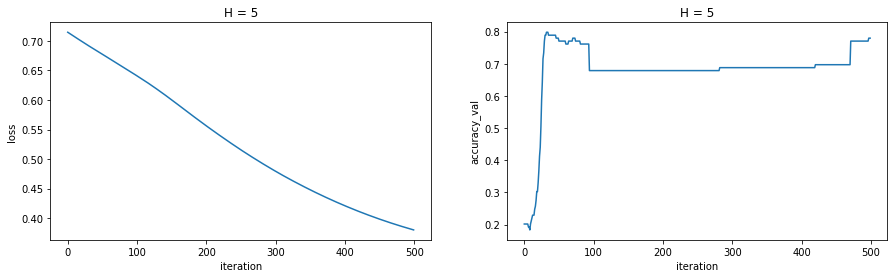

iteration: 0/500
training time = 1.8091609477996826(s)
The best model: iteration = 456
On validation dataset: accuracy = 0.8348623853211009
On testing dataset: accuracy = 0.8897058823529411, auc = 0.9919507575757576, precision = 0.9271844660194175, recall = 0.84375, f1 = 0.8681403917006011


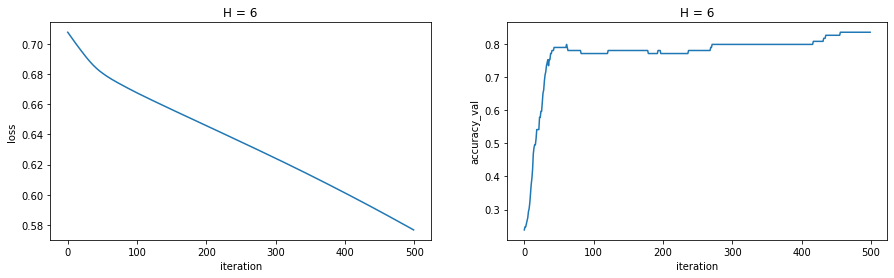

K-Folder index = 1
iteration: 0/500
training time = 1.8400790691375732(s)
The best model: iteration = 439
On validation dataset: accuracy = 0.6788990825688074
On testing dataset: accuracy = 0.75, auc = 0.9675662878787878, precision = 0.860655737704918, recall = 0.6458333333333334, f1 = 0.6448540706605222


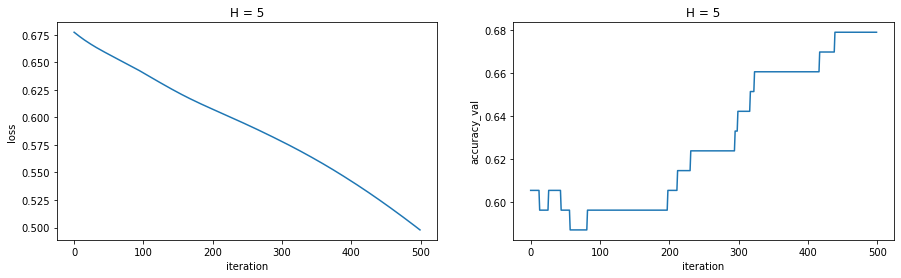

iteration: 0/500
training time = 2.151245355606079(s)
The best model: iteration = 481
On validation dataset: accuracy = 0.7706422018348624
On testing dataset: accuracy = 0.7794117647058824, auc = 0.9959753787878788, precision = 0.8728813559322034, recall = 0.6875, f1 = 0.6999117387466902


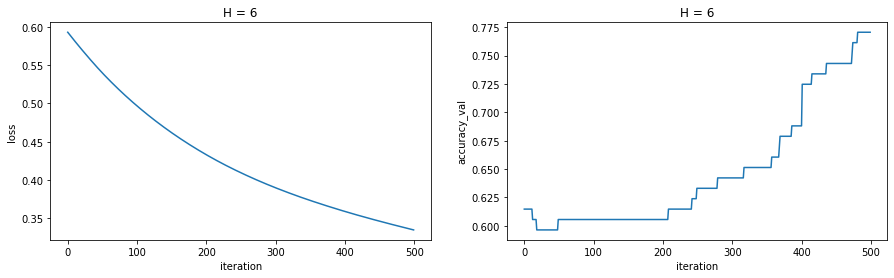

K-Folder index = 2
iteration: 0/500
training time = 1.806168794631958(s)
The best model: iteration = 486
On validation dataset: accuracy = 0.9357798165137615
On testing dataset: accuracy = 0.9044117647058824, auc = 0.9971590909090908, precision = 0.9356435643564356, recall = 0.8645833333333333, f1 = 0.8872952125964175


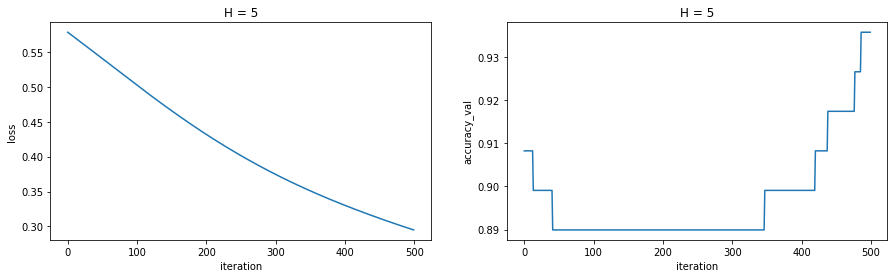

iteration: 0/500
training time = 1.7692675590515137(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.5871559633027523
On testing dataset: accuracy = 0.6470588235294118, auc = 0.986032196969697, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


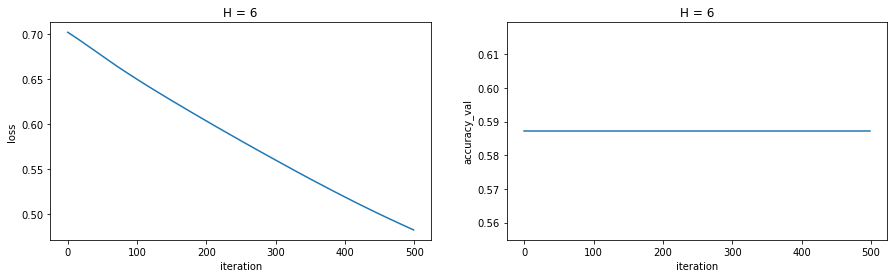

K-Folder index = 3
iteration: 0/500
training time = 1.800184726715088(s)
The best model: iteration = 118
On validation dataset: accuracy = 0.9357798165137615
On testing dataset: accuracy = 0.8088235294117647, auc = 0.9985795454545454, precision = 0.8859649122807017, recall = 0.7291666666666666, f1 = 0.7499292786421499


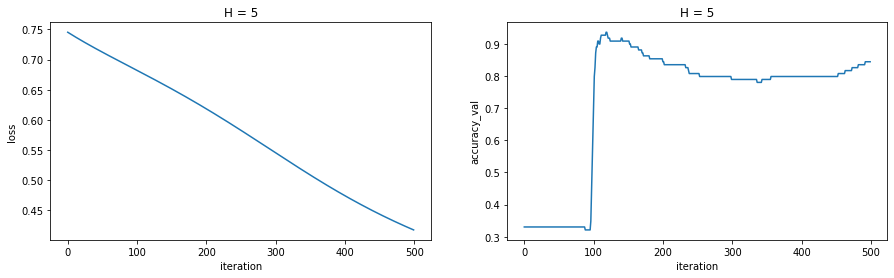

iteration: 0/500
training time = 1.7942016124725342(s)
The best model: iteration = 472
On validation dataset: accuracy = 0.8348623853211009
On testing dataset: accuracy = 0.8161764705882353, auc = 0.9964488636363636, precision = 0.8893805309734513, recall = 0.7395833333333334, f1 = 0.7617546072454628


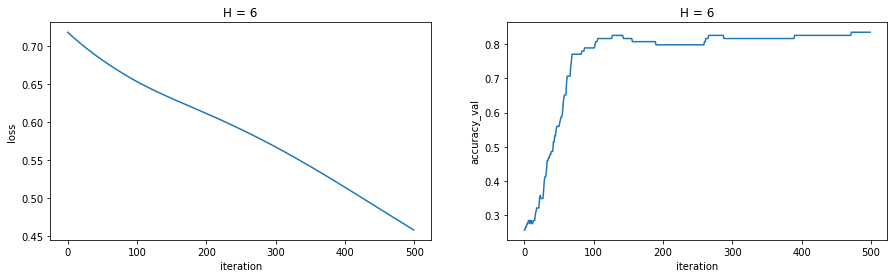

K-Folder index = 4
iteration: 0/500
training time = 1.8510477542877197(s)
The best model: iteration = 358
On validation dataset: accuracy = 0.954954954954955
On testing dataset: accuracy = 0.9191176470588235, auc = 0.9962121212121213, precision = 0.9444444444444444, recall = 0.8854166666666667, f1 = 0.9058823529411765


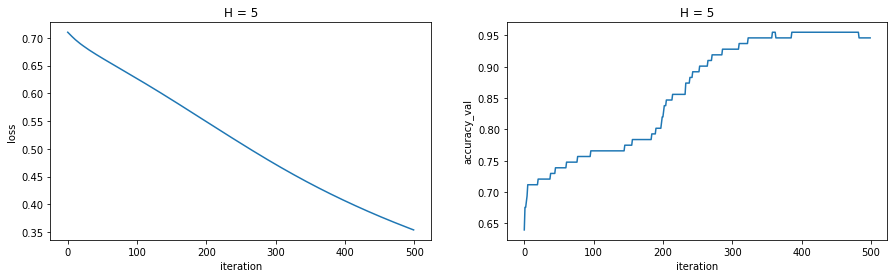

iteration: 0/500
training time = 1.8101582527160645(s)
The best model: iteration = 264
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9338235294117647, auc = 0.998342803030303, precision = 0.9536082474226804, recall = 0.90625, f1 = 0.9239515377446412


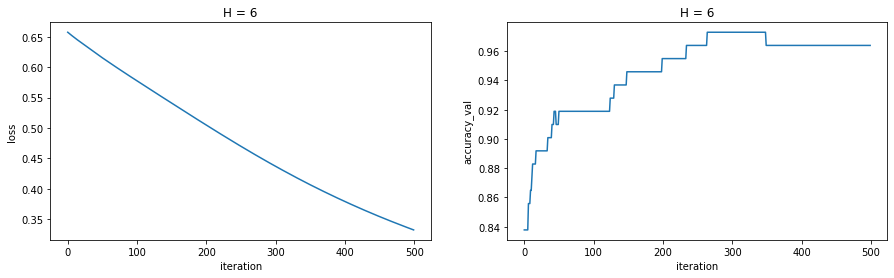

array([[5.   , 0.861, 0.837, 0.992, 0.902, 0.769, 0.785, 1.819],
       [6.   , 0.8  , 0.813, 0.994, 0.793, 0.735, 0.729, 1.867]])

In [18]:
framework_run(breast_cancer_data, device, k=5, H_list=[5,6], lr=5e-3, iteration=500)

### Training on five binary classification data sets

K-Folder index = 0
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.891215801239014(s)
The best model: iteration = 1424
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9964488636363636, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


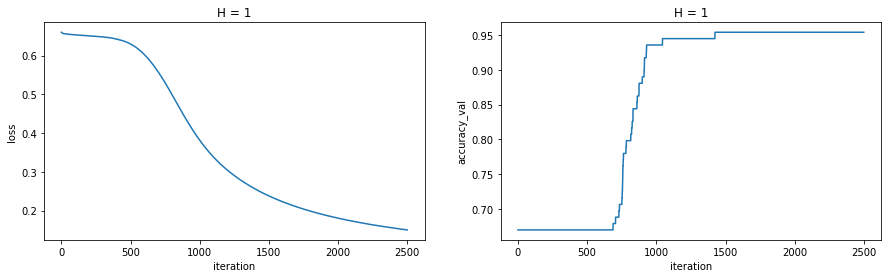

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.919143199920654(s)
The best model: iteration = 543
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818181, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


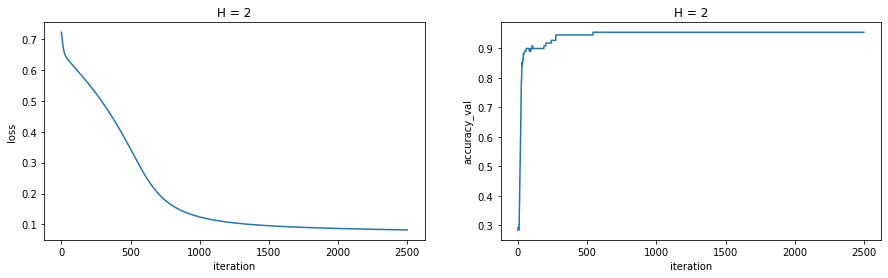

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.875258207321167(s)
The best model: iteration = 1472
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


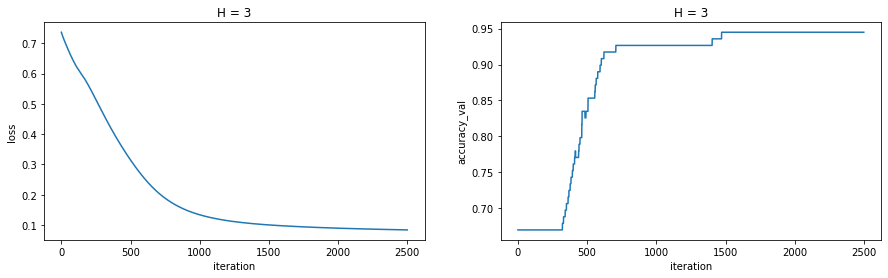

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.007905006408691(s)
The best model: iteration = 1636
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9981060606060607, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


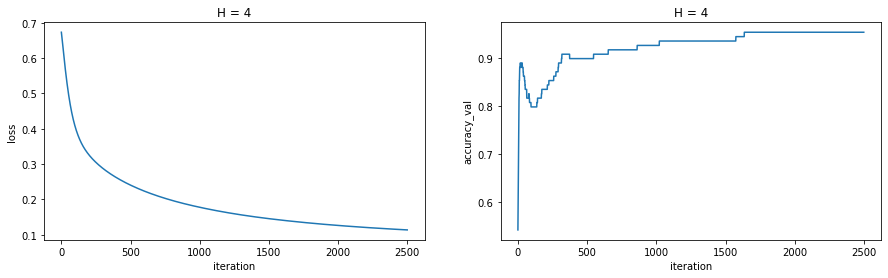

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.11960506439209(s)
The best model: iteration = 1257
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818181, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


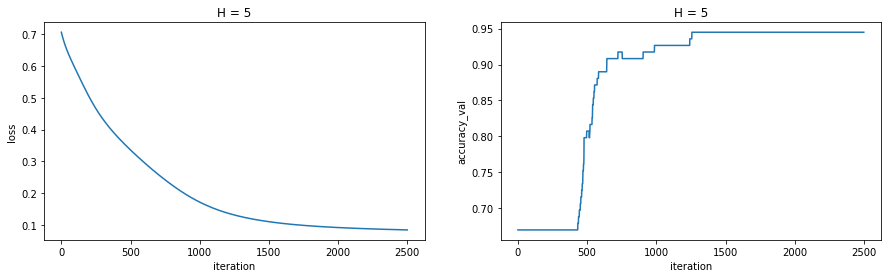

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.210360050201416(s)
The best model: iteration = 1616
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9976325757575758, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


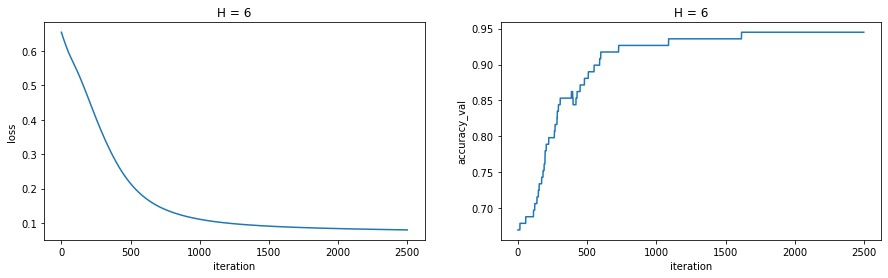

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.525170803070068(s)
The best model: iteration = 38
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9978693181818181, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


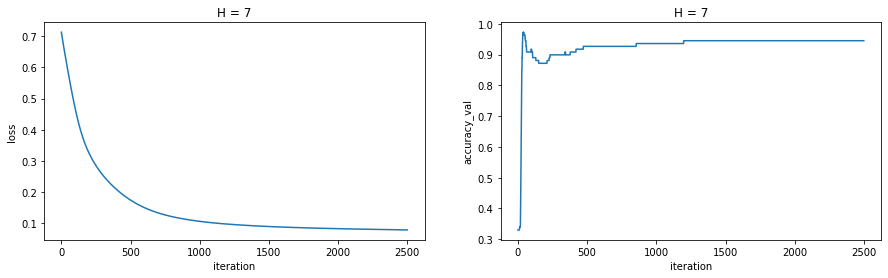

K-Folder index = 1
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.435410737991333(s)
The best model: iteration = 240
On validation dataset: accuracy = 0.5779816513761468
On testing dataset: accuracy = 0.6470588235294118, auc = 0.46875, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


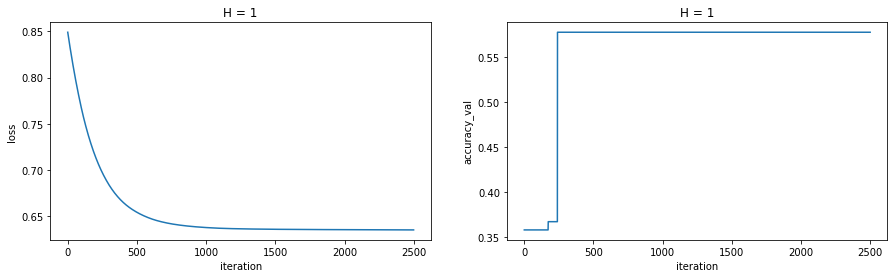

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.085022926330566(s)
The best model: iteration = 560
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9976325757575758, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


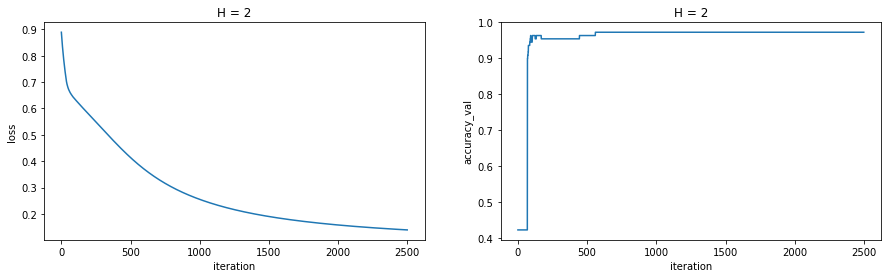

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.689796447753906(s)
The best model: iteration = 38
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


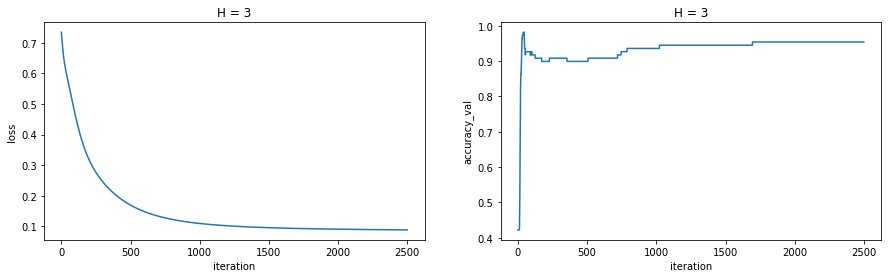

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.11028242111206(s)
The best model: iteration = 1164
On validation dataset: accuracy = 0.9357798165137615
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9981060606060606, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


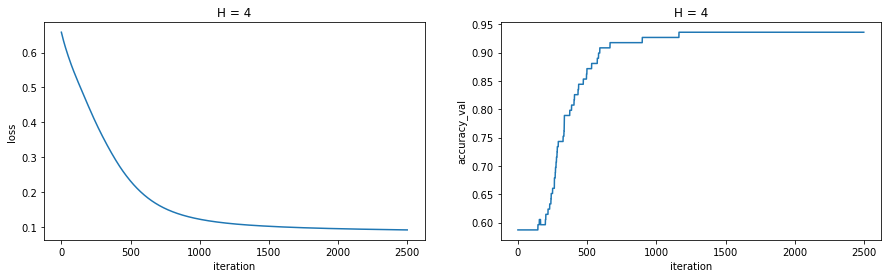

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.561075210571289(s)
The best model: iteration = 1435
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818181, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


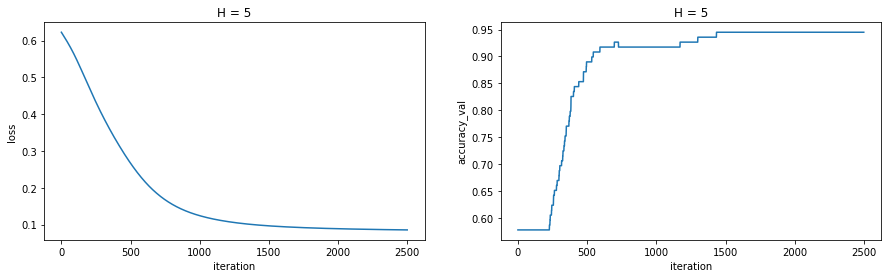

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 13.38120698928833(s)
The best model: iteration = 2161
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9973958333333334, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


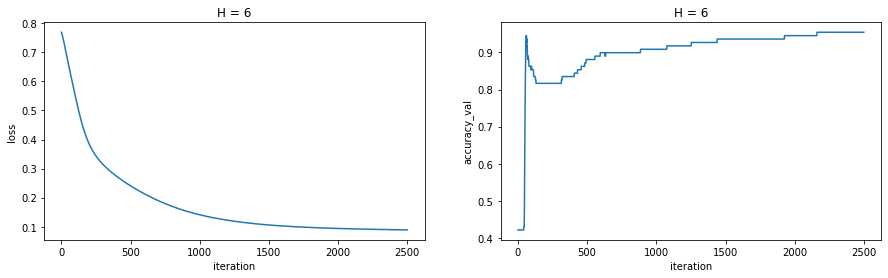

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.746253967285156(s)
The best model: iteration = 1849
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9976325757575758, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


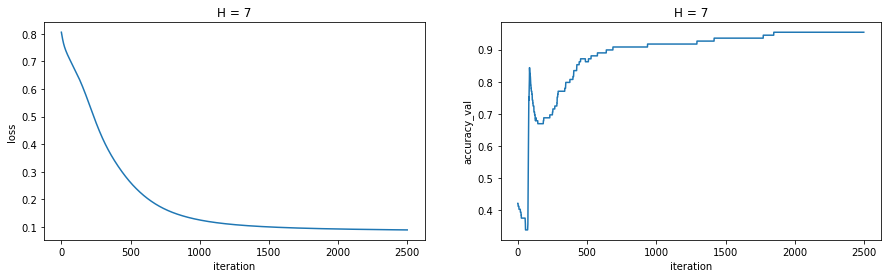

K-Folder index = 2
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.662155151367188(s)
The best model: iteration = 1514
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9973958333333334, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


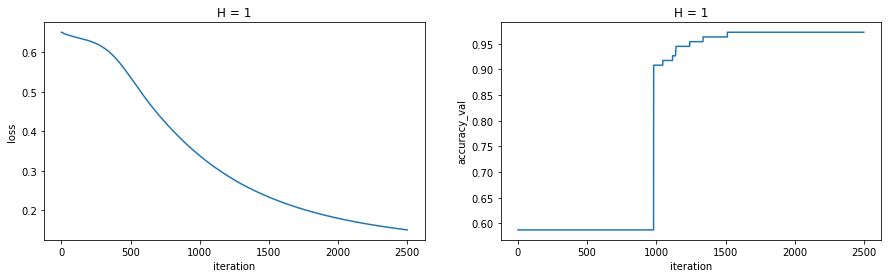

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.182438373565674(s)
The best model: iteration = 291
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9976325757575758, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


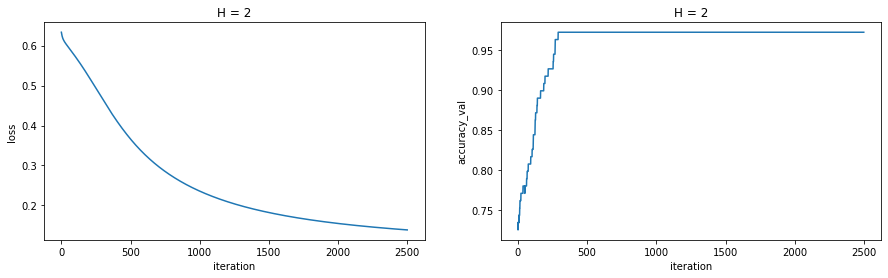

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.080709457397461(s)
The best model: iteration = 31
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9978693181818182, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


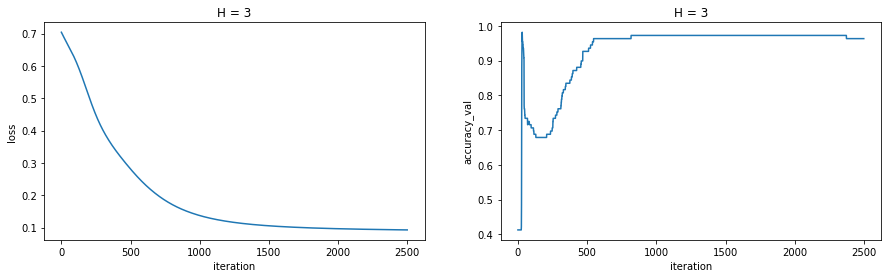

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.069738149642944(s)
The best model: iteration = 69
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


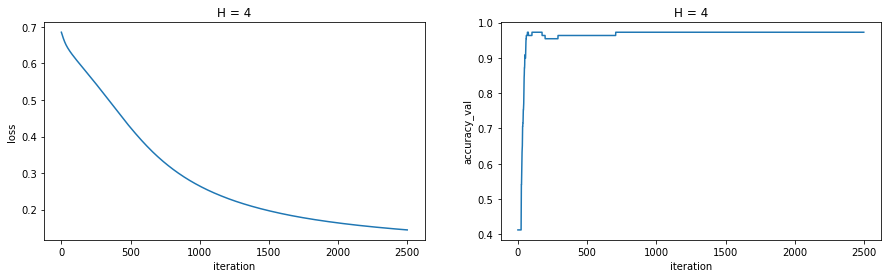

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.78048825263977(s)
The best model: iteration = 712
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9973958333333334, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


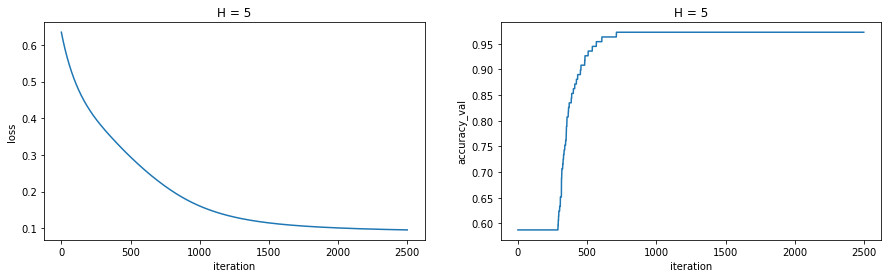

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.721152782440186(s)
The best model: iteration = 1592
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9978693181818181, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


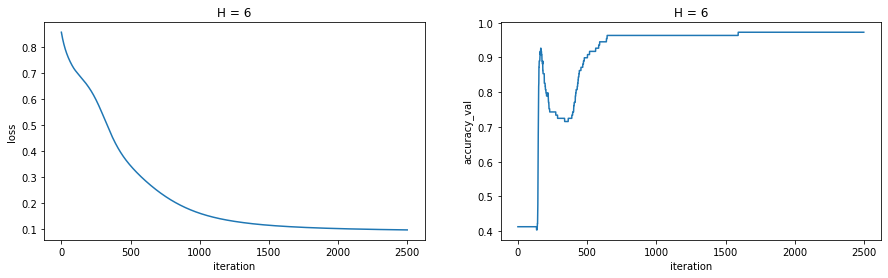

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.300448417663574(s)
The best model: iteration = 44
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9978693181818181, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


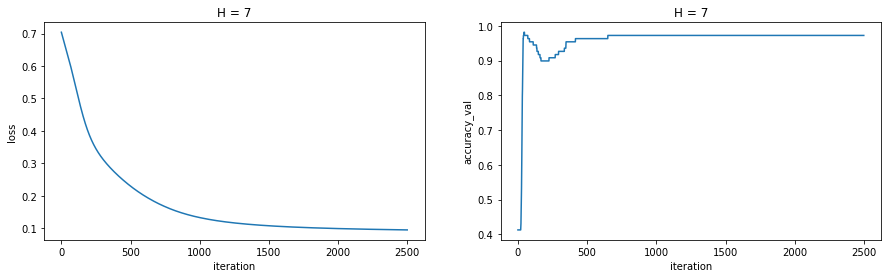

K-Folder index = 3
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.86760425567627(s)
The best model: iteration = 1459
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9976325757575758, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


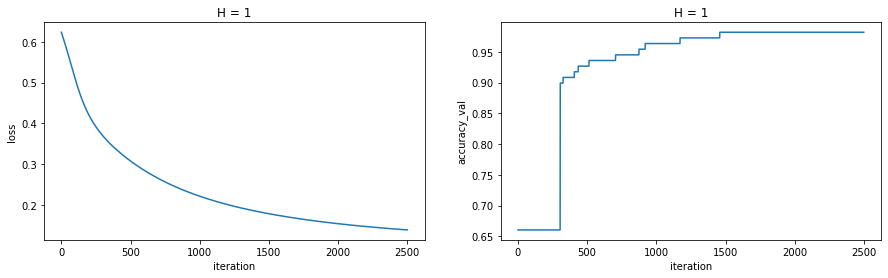

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.519536972045898(s)
The best model: iteration = 1223
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9971590909090908, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


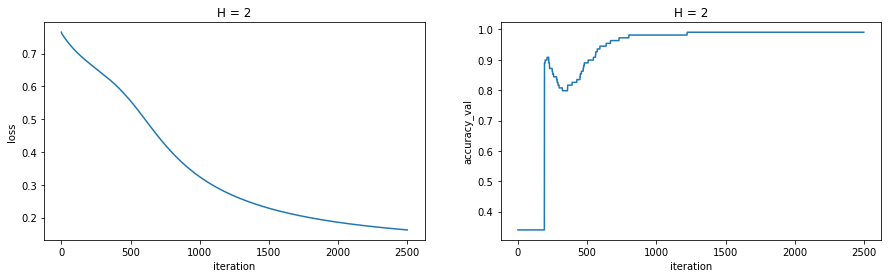

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.416811466217041(s)
The best model: iteration = 820
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9969223484848485, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


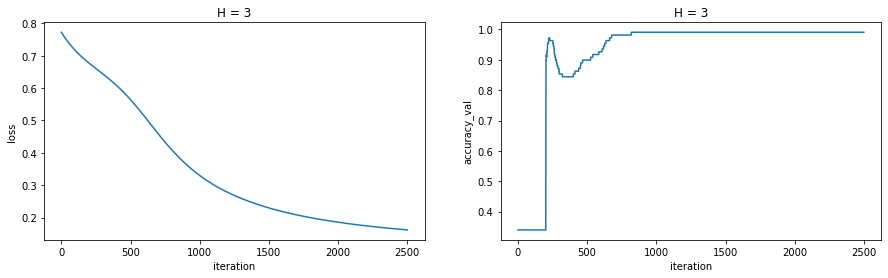

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.913806676864624(s)
The best model: iteration = 1561
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9983428030303031, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


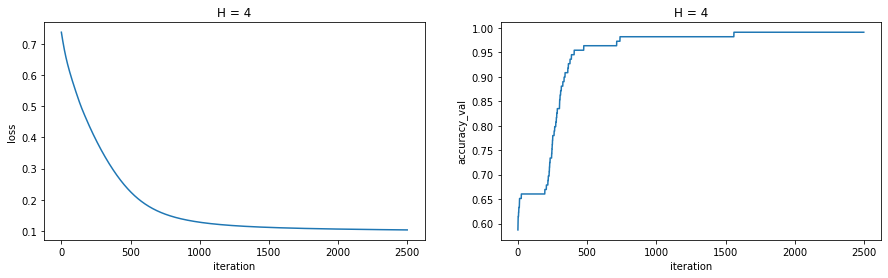

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.668786764144897(s)
The best model: iteration = 540
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9966856060606061, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


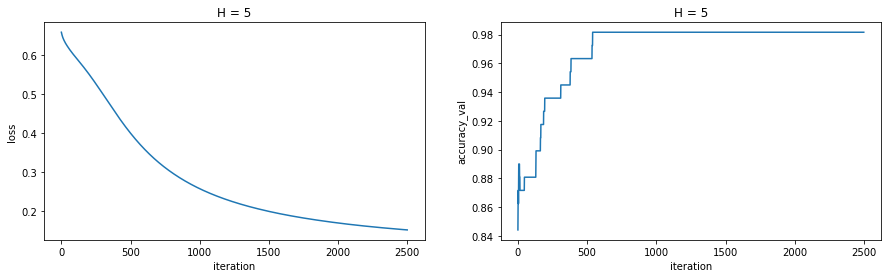

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.320394515991211(s)
The best model: iteration = 811
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


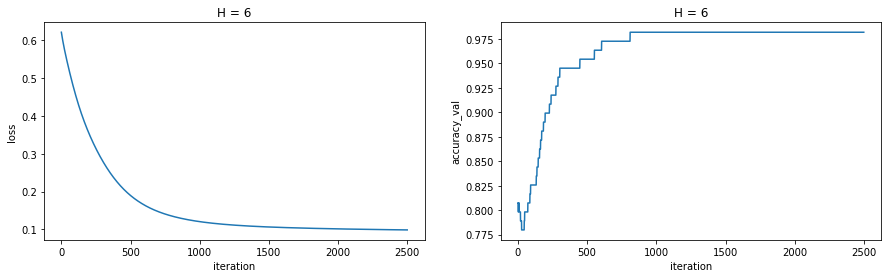

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.710026502609253(s)
The best model: iteration = 98
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818181, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


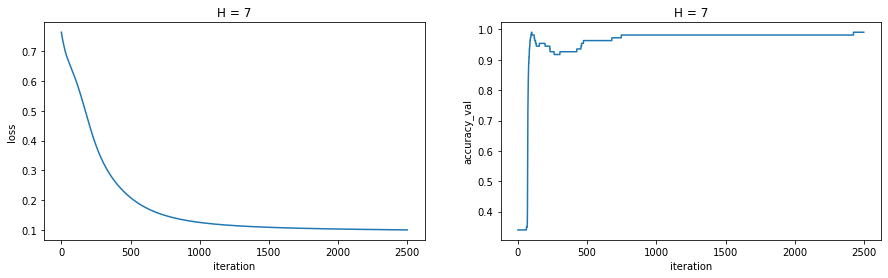

K-Folder index = 4
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.051787376403809(s)
The best model: iteration = 1876
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818182, precision = 0.9731182795698925, recall = 0.9479166666666667, f1 = 0.9587153178313399


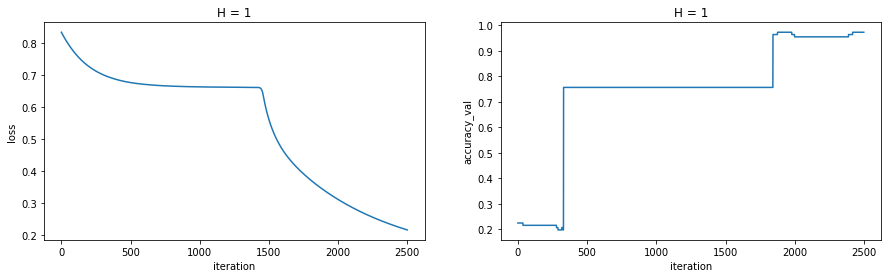

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.510393619537354(s)
The best model: iteration = 661
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9969223484848485, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


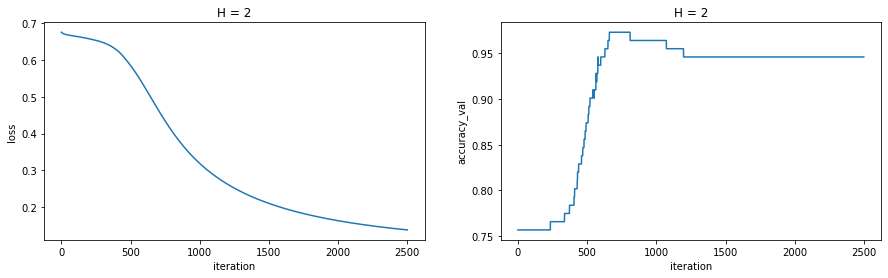

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.93509817123413(s)
The best model: iteration = 1182
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9973958333333333, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


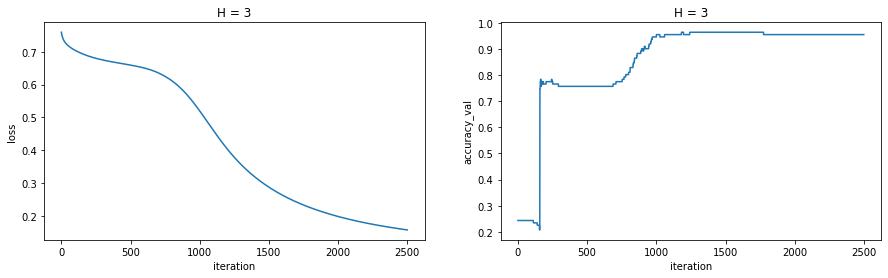

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.535142660140991(s)
The best model: iteration = 818
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9978693181818181, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


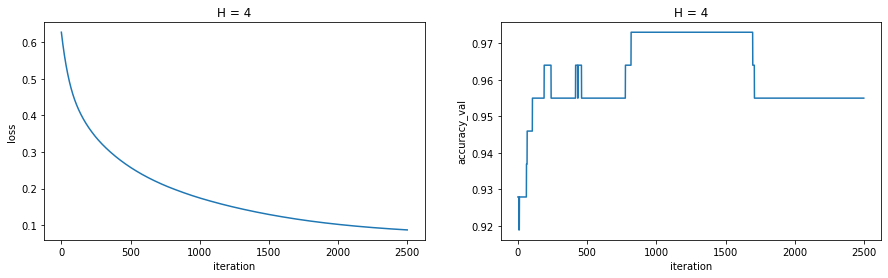

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.49724555015564(s)
The best model: iteration = 525
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9973958333333334, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


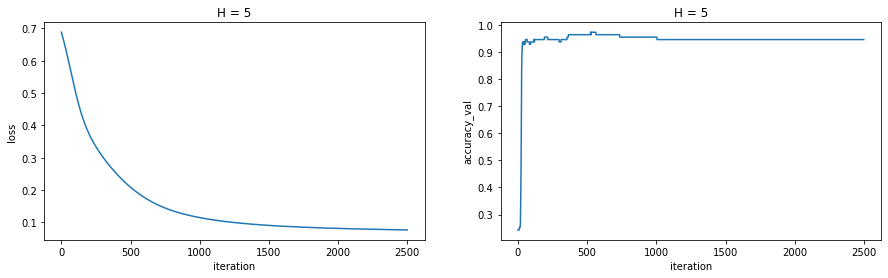

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.423116445541382(s)
The best model: iteration = 504
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9969223484848485, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


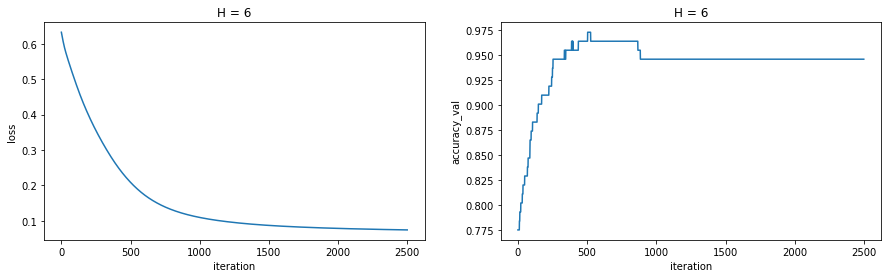

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.723990201950073(s)
The best model: iteration = 531
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9978693181818181, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


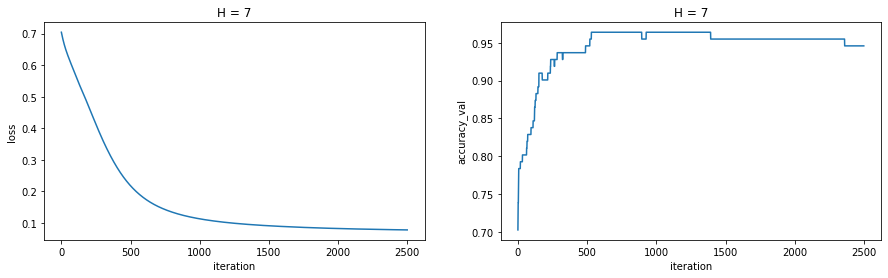

array([[ 1.   ,  0.892,  0.901,  0.892,  0.838,  0.866,  0.848,  9.782],
       [ 2.   ,  0.973,  0.963,  0.997,  0.962,  0.957,  0.96 ,  9.643],
       [ 3.   ,  0.973,  0.969,  0.997,  0.967,  0.966,  0.966,  9.4  ],
       [ 4.   ,  0.965,  0.966,  0.998,  0.964,  0.962,  0.963, 10.327],
       [ 5.   ,  0.963,  0.968,  0.997,  0.965,  0.964,  0.965, 11.125],
       [ 6.   ,  0.965,  0.968,  0.997,  0.965,  0.964,  0.965, 11.011],
       [ 7.   ,  0.973,  0.968,  0.998,  0.965,  0.964,  0.965, 10.401]])

In [19]:
# breast_data features = 10 => H* = 3, lr = 1e-2
framework_run(breast_cancer_data, device, k=5, H_list=[1,2,3,4,5,6,7], lr=1e-2, iteration=2500)

|H_breastNN|Val_Accuracy|Test_Accuracy|AUC|Precision|Recall| F1 |Training Time|
|---------|---|------------|-------------|---------|------|----|-------------|
| 1   |  0.892|  0.901|  0.892|  0.838|  0.866|  0.848|  9.782(s)|
| 2   |  0.973|  0.963|  0.997|  0.962|  0.957|  0.96 |  9.643(s)|
| 3   |  0.973|  0.969|  0.997|  0.967|  0.966|  0.966|  9.4(s)  |
| 4   |  0.965|  0.966|  0.998|  0.964|  0.962|  0.963| 10.327(s)|
| 5   |  0.963|  0.968|  0.997|  0.965|  0.964|  0.965| 11.125(s)|
| 6   |  0.965|  0.968|  0.997|  0.965|  0.964|  0.965| 11.011(s)|
| 7   |  0.973|  0.968|  0.998|  0.965|  0.964|  0.965| 10.401(s)|

K-Folder index = 0
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.994939088821411(s)
The best model: iteration = 2407
On validation dataset: accuracy = 0.9174311926605505
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9872159090909092, precision = 0.9631578947368421, recall = 0.9270833333333333, f1 = 0.9415484742432615


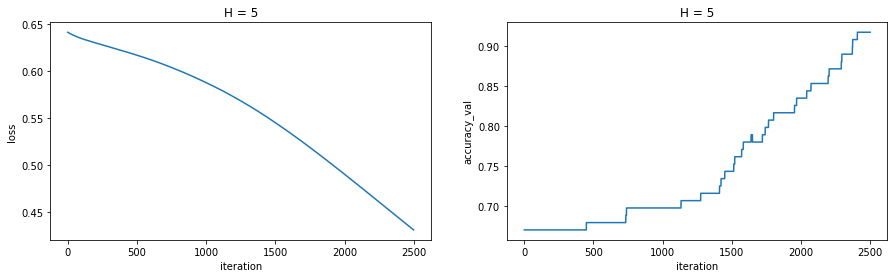

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.066975116729736(s)
The best model: iteration = 320
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9985795454545454, precision = 0.9631578947368421, recall = 0.9270833333333333, f1 = 0.9415484742432615


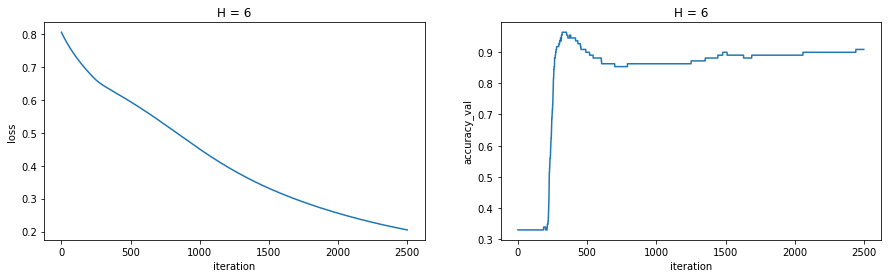

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.223328828811646(s)
The best model: iteration = 2277
On validation dataset: accuracy = 0.926605504587156
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9978693181818181, precision = 0.9782608695652174, recall = 0.9583333333333333, f1 = 0.9671497584541062


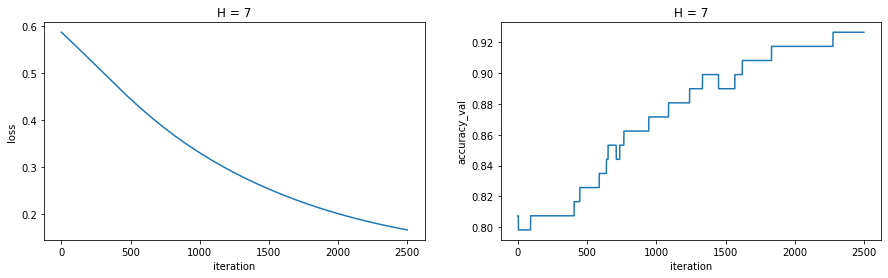

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 13.761189460754395(s)
The best model: iteration = 23
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9411764705882353, auc = 0.9978693181818182, precision = 0.9583333333333333, recall = 0.9166666666666667, f1 = 0.9328063241106719


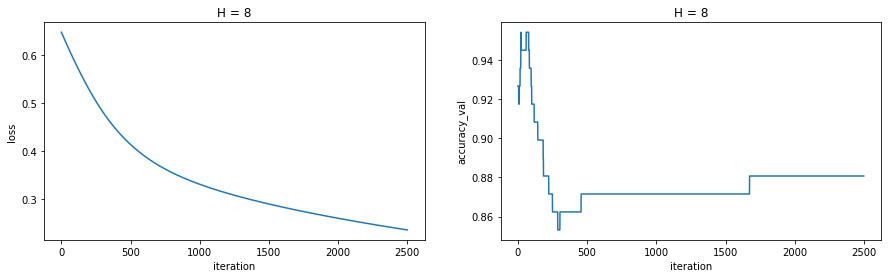

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 14.18605375289917(s)
The best model: iteration = 2297
On validation dataset: accuracy = 0.9174311926605505
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9981060606060607, precision = 0.9782608695652174, recall = 0.9583333333333333, f1 = 0.9671497584541062


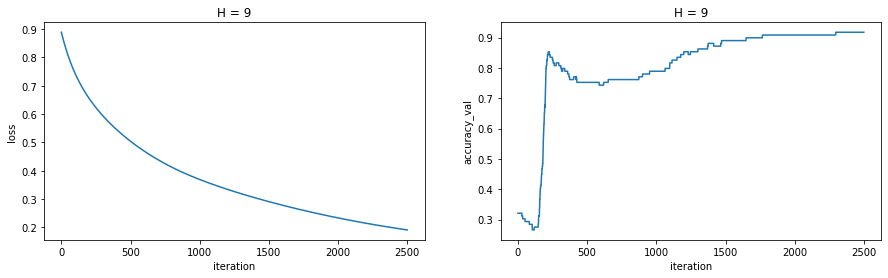

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.011221170425415(s)
The best model: iteration = 2359
On validation dataset: accuracy = 0.908256880733945
On testing dataset: accuracy = 0.9338235294117647, auc = 0.9966856060606061, precision = 0.9536082474226804, recall = 0.90625, f1 = 0.9239515377446412


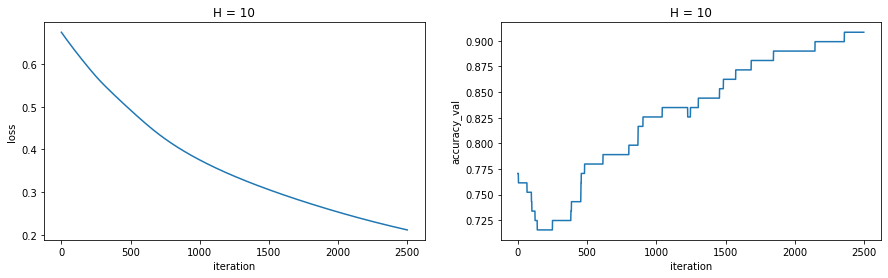

K-Folder index = 1
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.01022481918335(s)
The best model: iteration = 2432
On validation dataset: accuracy = 0.9174311926605505
On testing dataset: accuracy = 0.9191176470588235, auc = 0.9969223484848485, precision = 0.9444444444444444, recall = 0.8854166666666667, f1 = 0.9058823529411765


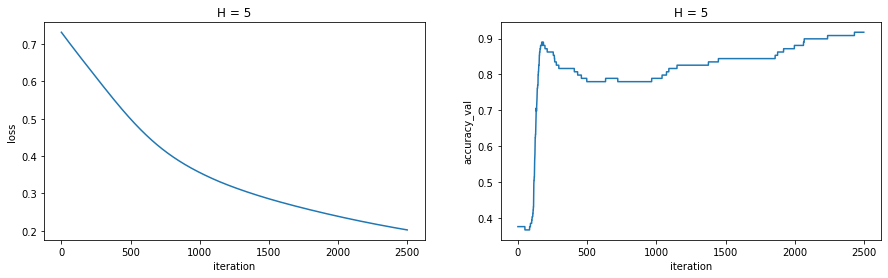

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.912485599517822(s)
The best model: iteration = 2261
On validation dataset: accuracy = 0.8899082568807339
On testing dataset: accuracy = 0.875, auc = 0.9981060606060607, precision = 0.9190476190476191, recall = 0.8229166666666667, f1 = 0.8483636125139371


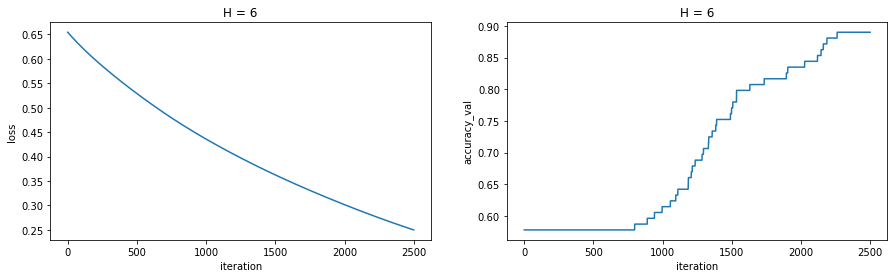

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.04779839515686(s)
The best model: iteration = 2364
On validation dataset: accuracy = 0.8990825688073395
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9976325757575758, precision = 0.9731182795698925, recall = 0.9479166666666667, f1 = 0.9587153178313399


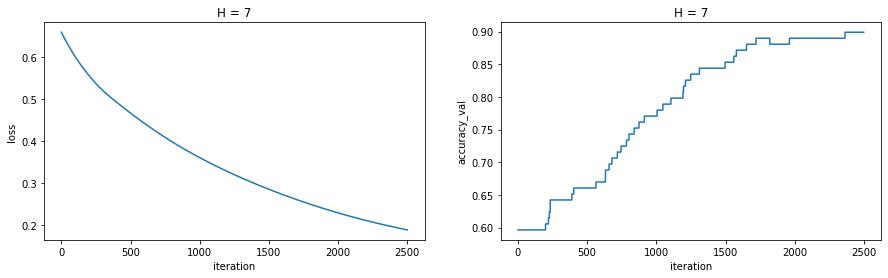

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 12.74490737915039(s)
The best model: iteration = 2263
On validation dataset: accuracy = 0.8990825688073395
On testing dataset: accuracy = 0.9264705882352942, auc = 0.9962121212121212, precision = 0.9489795918367347, recall = 0.8958333333333333, f1 = 0.9149787446861715


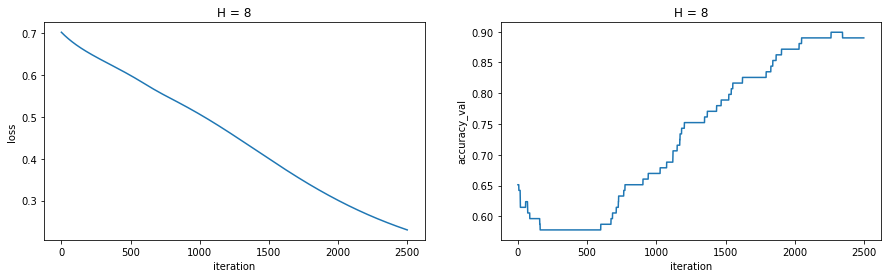

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.033484935760498(s)
The best model: iteration = 2485
On validation dataset: accuracy = 0.8348623853211009
On testing dataset: accuracy = 0.8602941176470589, auc = 0.9959753787878788, precision = 0.9112149532710281, recall = 0.8020833333333333, f1 = 0.8279054279054279


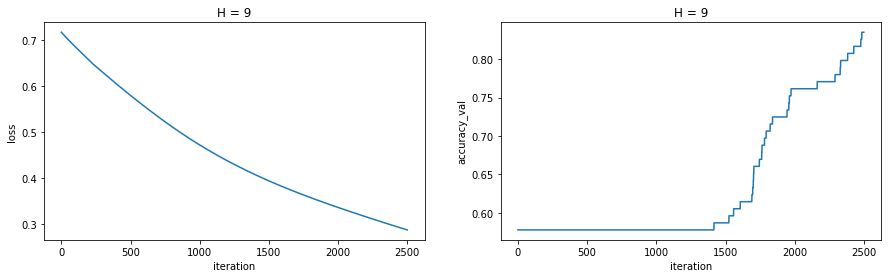

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.103972434997559(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9558823529411765, auc = 0.9973958333333334, precision = 0.9680851063829787, recall = 0.9375, f1 = 0.9501831501831501


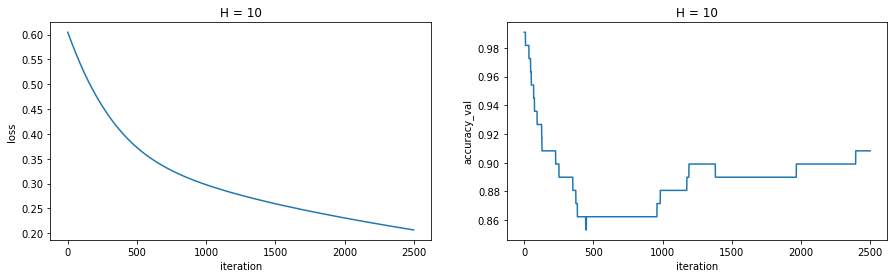

K-Folder index = 2
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.558431386947632(s)
The best model: iteration = 668
On validation dataset: accuracy = 0.8532110091743119
On testing dataset: accuracy = 0.6470588235294118, auc = 0.9541903409090909, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


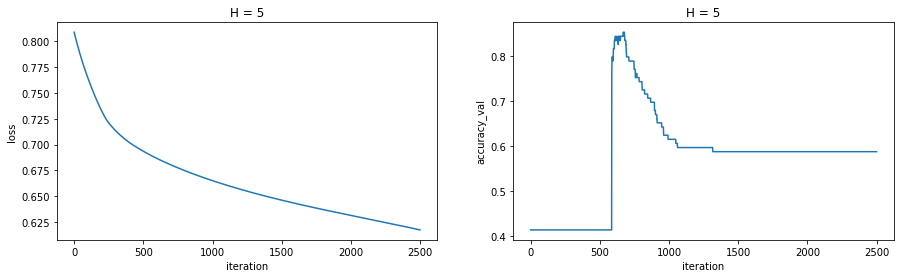

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.234297513961792(s)
The best model: iteration = 2247
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9981060606060606, precision = 0.9631578947368421, recall = 0.9270833333333333, f1 = 0.9415484742432615


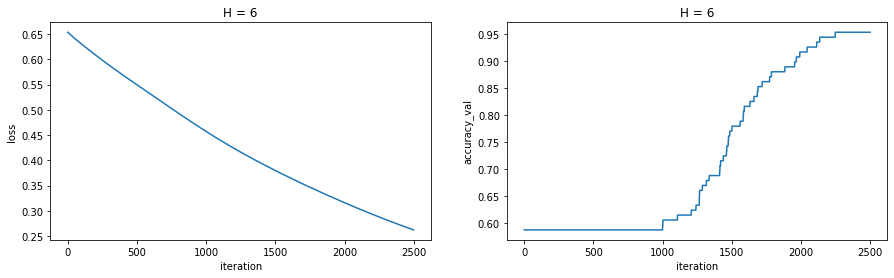

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.296133518218994(s)
The best model: iteration = 2443
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9191176470588235, auc = 0.9973958333333334, precision = 0.9444444444444444, recall = 0.8854166666666667, f1 = 0.9058823529411765


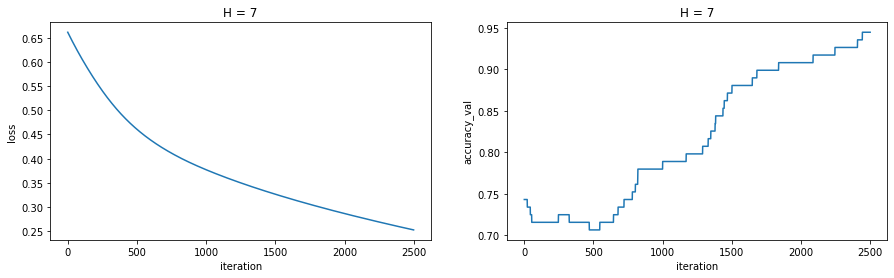

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.880894184112549(s)
The best model: iteration = 1746
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9411764705882353, auc = 0.998342803030303, precision = 0.9583333333333333, recall = 0.9166666666666667, f1 = 0.9328063241106719


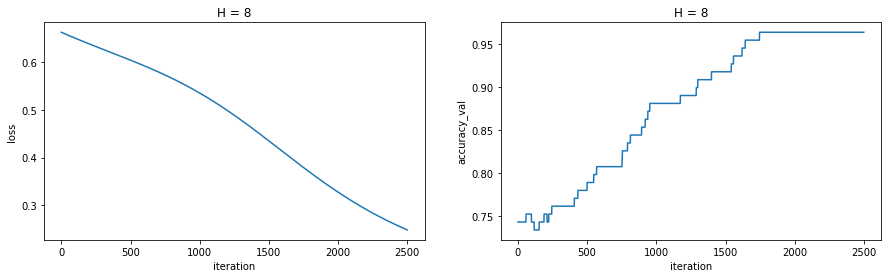

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.596979141235352(s)
The best model: iteration = 2482
On validation dataset: accuracy = 0.9357798165137615
On testing dataset: accuracy = 0.8823529411764706, auc = 0.9971590909090909, precision = 0.9230769230769231, recall = 0.8333333333333333, f1 = 0.8583333333333334


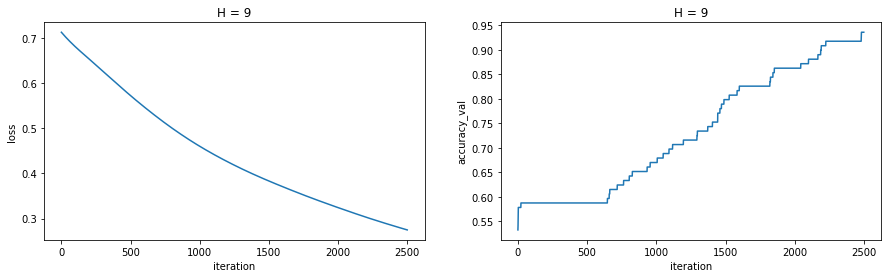

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.052112579345703(s)
The best model: iteration = 2469
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.8970588235294118, auc = 0.9969223484848485, precision = 0.9313725490196079, recall = 0.8541666666666667, f1 = 0.8777920410783056


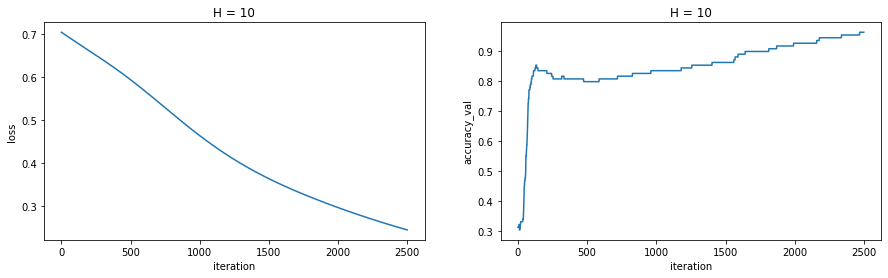

K-Folder index = 3
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.473659992218018(s)
The best model: iteration = 2367
On validation dataset: accuracy = 0.926605504587156
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9988162878787878, precision = 0.9631578947368421, recall = 0.9270833333333333, f1 = 0.9415484742432615


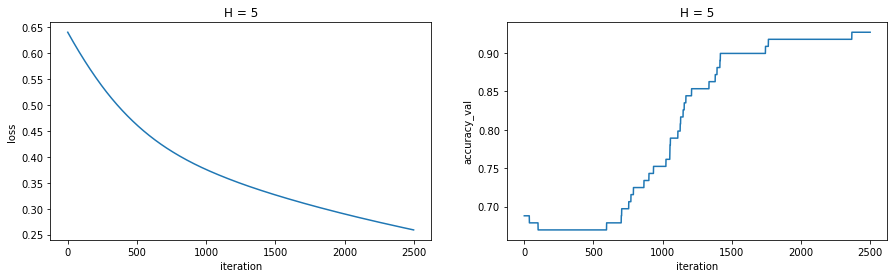

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.06175947189331(s)
The best model: iteration = 2316
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9962121212121212, precision = 0.9561140285071268, recall = 0.9318181818181819, f1 = 0.9422014449638758


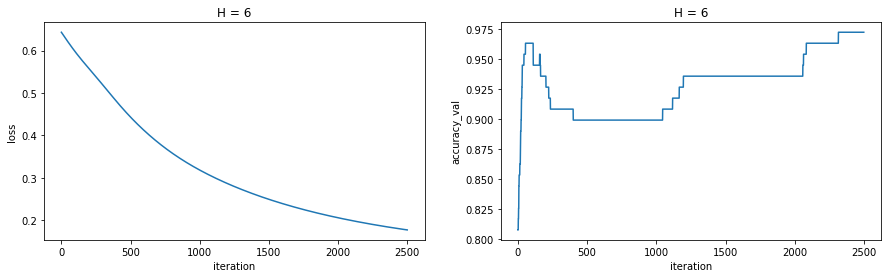

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.038821935653687(s)
The best model: iteration = 2446
On validation dataset: accuracy = 0.8990825688073395
On testing dataset: accuracy = 0.875, auc = 0.9964488636363636, precision = 0.9190476190476191, recall = 0.8229166666666667, f1 = 0.8483636125139371


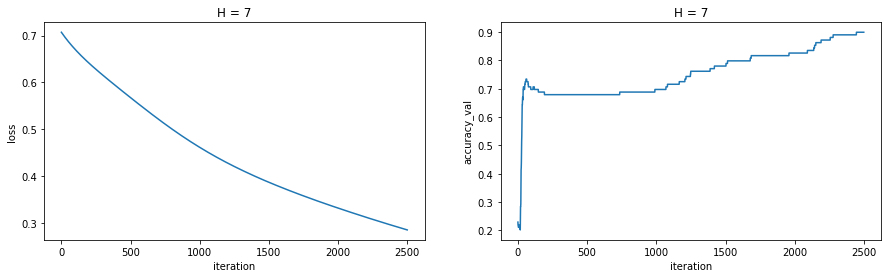

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.97299861907959(s)
The best model: iteration = 837
On validation dataset: accuracy = 0.926605504587156
On testing dataset: accuracy = 0.9191176470588235, auc = 0.9976325757575758, precision = 0.9444444444444444, recall = 0.8854166666666667, f1 = 0.9058823529411765


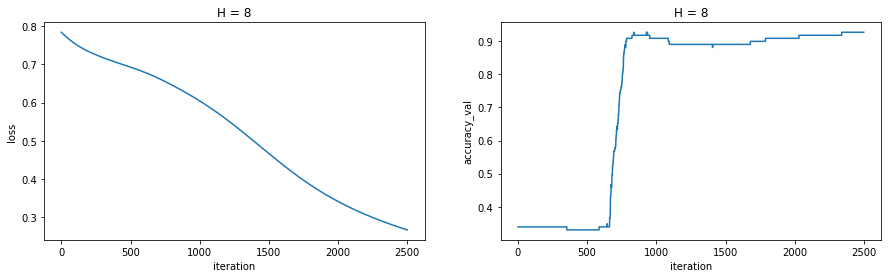

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.05542802810669(s)
The best model: iteration = 2141
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9338235294117647, auc = 0.9973958333333334, precision = 0.9536082474226804, recall = 0.90625, f1 = 0.9239515377446412


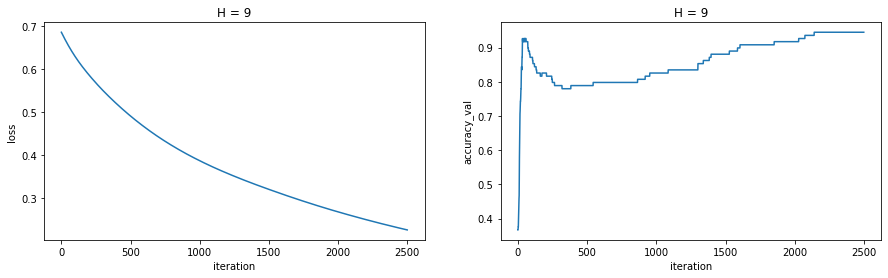

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.882888793945312(s)
The best model: iteration = 2354
On validation dataset: accuracy = 0.9357798165137615
On testing dataset: accuracy = 0.9411764705882353, auc = 0.9973958333333334, precision = 0.9583333333333333, recall = 0.9166666666666667, f1 = 0.9328063241106719


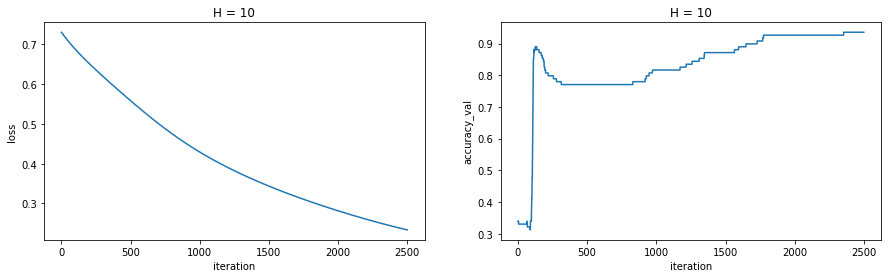

K-Folder index = 4
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.808762311935425(s)
The best model: iteration = 2448
On validation dataset: accuracy = 0.954954954954955
On testing dataset: accuracy = 0.8308823529411765, auc = 0.9969223484848485, precision = 0.8963963963963963, recall = 0.7604166666666667, f1 = 0.7846768087010394


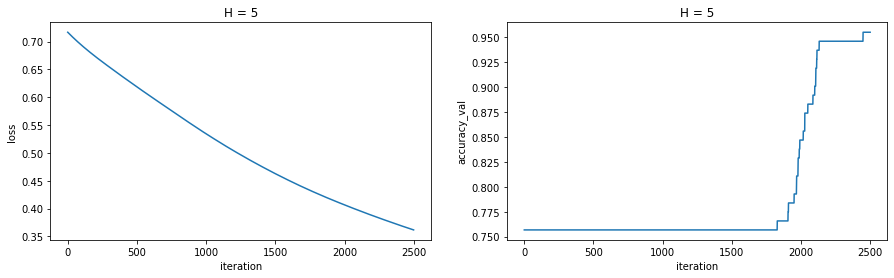

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.361958026885986(s)
The best model: iteration = 1523
On validation dataset: accuracy = 0.954954954954955
On testing dataset: accuracy = 0.9338235294117647, auc = 0.9983428030303031, precision = 0.9536082474226804, recall = 0.90625, f1 = 0.9239515377446412


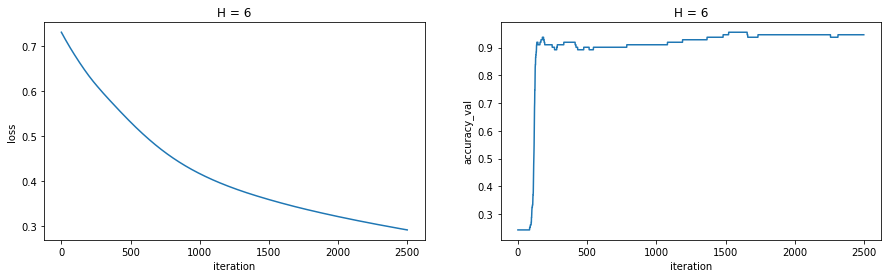

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.946069717407227(s)
The best model: iteration = 1938
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9966856060606061, precision = 0.9631578947368421, recall = 0.9270833333333333, f1 = 0.9415484742432615


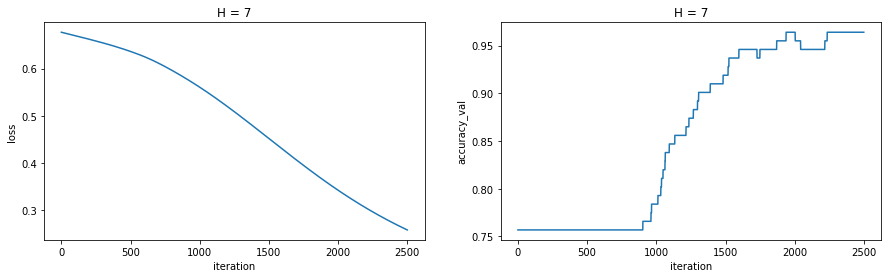

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.928117513656616(s)
The best model: iteration = 1886
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.9191176470588235, auc = 0.9981060606060607, precision = 0.9444444444444444, recall = 0.8854166666666667, f1 = 0.9058823529411765


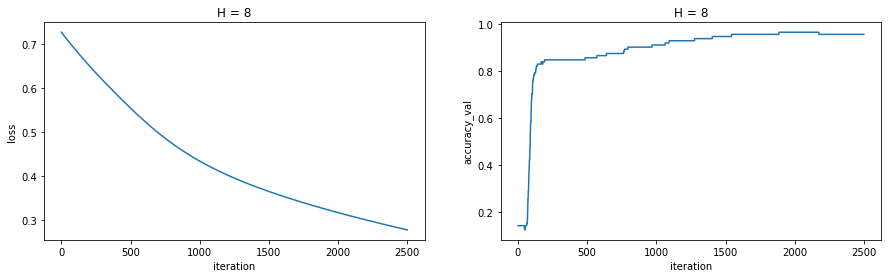

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.068742990493774(s)
The best model: iteration = 799
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9983428030303031, precision = 0.9731182795698925, recall = 0.9479166666666667, f1 = 0.9587153178313399


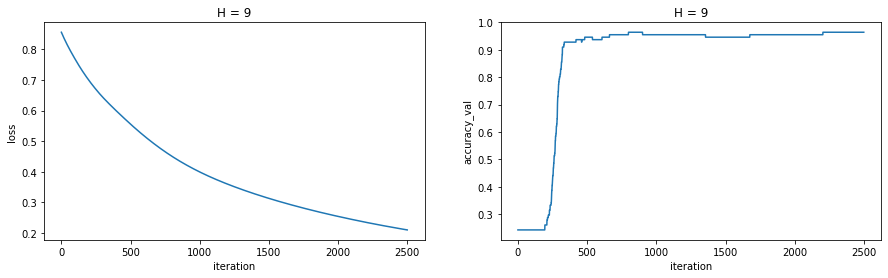

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 12.023835182189941(s)
The best model: iteration = 1920
On validation dataset: accuracy = 0.9819819819819819
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9981060606060606, precision = 0.9782608695652174, recall = 0.9583333333333333, f1 = 0.9671497584541062


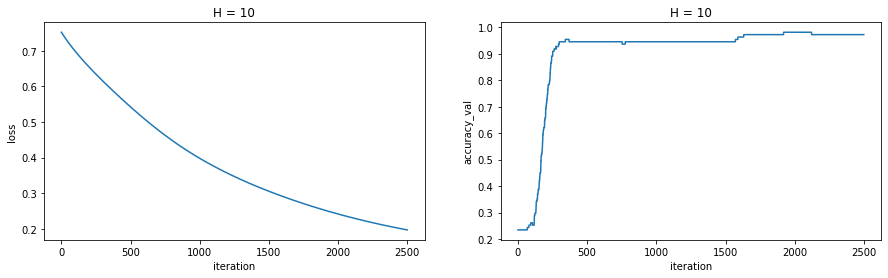

array([[ 5.   ,  0.914,  0.859,  0.987,  0.818,  0.8  ,  0.793,  9.569],
       [ 6.   ,  0.947,  0.931,  0.998,  0.951,  0.903,  0.92 ,  9.327],
       [ 7.   ,  0.927,  0.935,  0.997,  0.956,  0.908,  0.924,  9.11 ],
       [ 8.   ,  0.941,  0.929,  0.998,  0.951,  0.9  ,  0.918, 11.058],
       [ 9.   ,  0.919,  0.922,  0.997,  0.948,  0.89 ,  0.907, 11.388],
       [10.   ,  0.956,  0.94 ,  0.997,  0.958,  0.915,  0.93 , 10.615]])

In [20]:
# digit_data features = 64 => H* = 10, lr = 2e-3
framework_run(digit_data, device, k=5, H_list=[5,6,7,8,9,10], lr=2e-3, iteration=2500)

|H_digitNN|Val_Accuracy|Test_Accuracy|AUC|Precision|Recall| F1 |Training Time|
|---------|---|------------|-------------|---------|------|----|-------------|
| 5   |  0.914|  0.859|  0.987|  0.818|  0.8  |  0.793|  9.569(s)|
| 6   |  0.947|  0.931|  0.998|  0.951|  0.903|  0.92 |  9.327(s)|
| 7   |  0.927|  0.935|  0.997|  0.956|  0.908|  0.924|  9.11 (s)|
| 8   |  0.941|  0.929|  0.998|  0.951|  0.9  |  0.918| 11.058(s)|
| 9   |  0.919|  0.922|  0.997|  0.948|  0.89 |  0.907| 11.388(s)|
|10   |  0.956|  0.94 |  0.997|  0.958|  0.915|  0.93 | 10.615(s)|

K-Folder index = 0
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.457028150558472(s)
The best model: iteration = 279
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9962121212121212, precision = 0.9456131962706191, recall = 0.9412878787878788, f1 = 0.9433838834374071


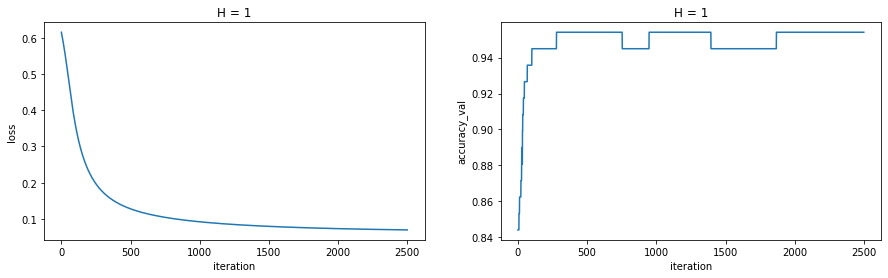

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.711023569107056(s)
The best model: iteration = 324
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9962121212121211, precision = 0.9456131962706191, recall = 0.9412878787878788, f1 = 0.9433838834374071


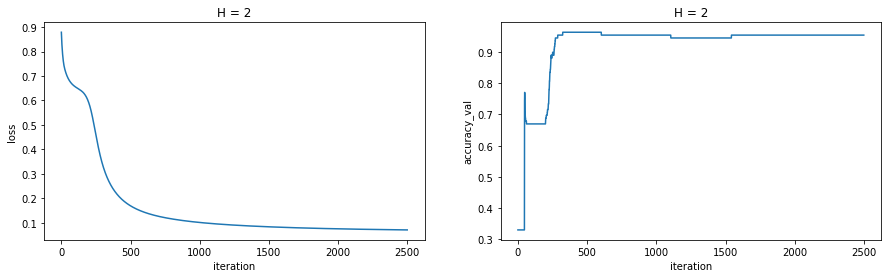

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.445731163024902(s)
The best model: iteration = 790
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9964488636363635, precision = 0.9578935022284776, recall = 0.9621212121212122, f1 = 0.9599410898379971


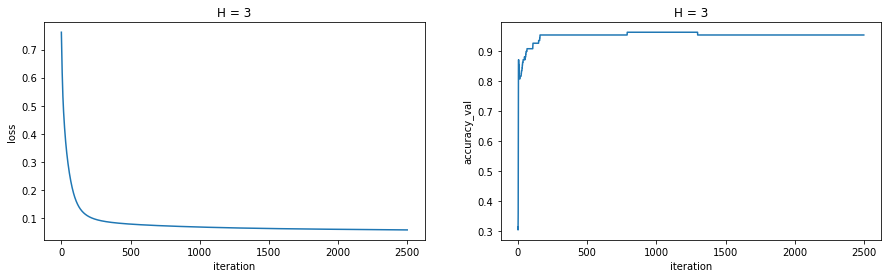

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.05478048324585(s)
The best model: iteration = 725
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9976325757575757, precision = 0.9641860465116279, recall = 0.9725378787878788, f1 = 0.9680975838611307


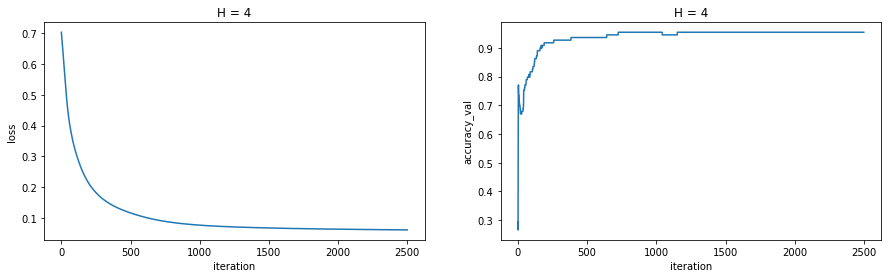

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.035829544067383(s)
The best model: iteration = 1109
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9962121212121213, precision = 0.9456131962706191, recall = 0.9412878787878788, f1 = 0.9433838834374071


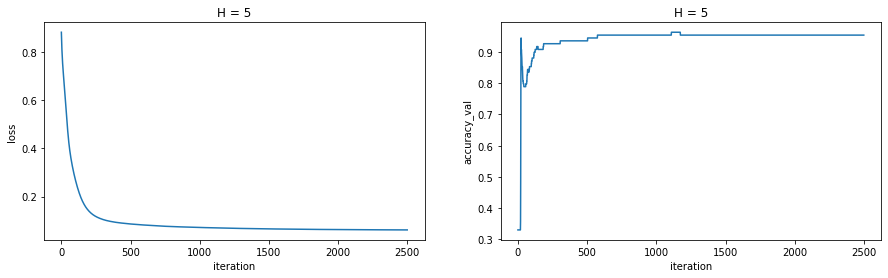

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.312377691268921(s)
The best model: iteration = 837
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9558823529411765, auc = 0.9966856060606062, precision = 0.9517045454545454, recall = 0.9517045454545454, f1 = 0.9517045454545454


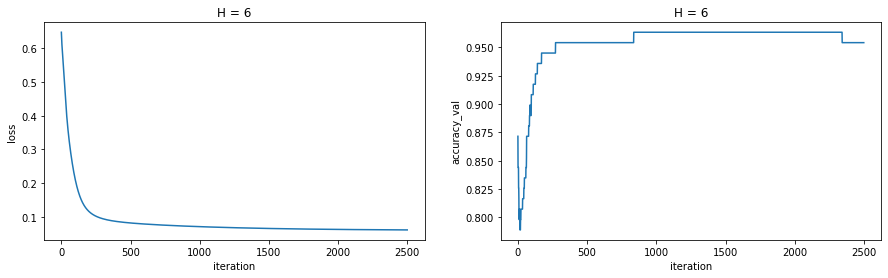

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.276832342147827(s)
The best model: iteration = 458
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9964488636363636, precision = 0.9578935022284776, recall = 0.9621212121212122, f1 = 0.9599410898379971


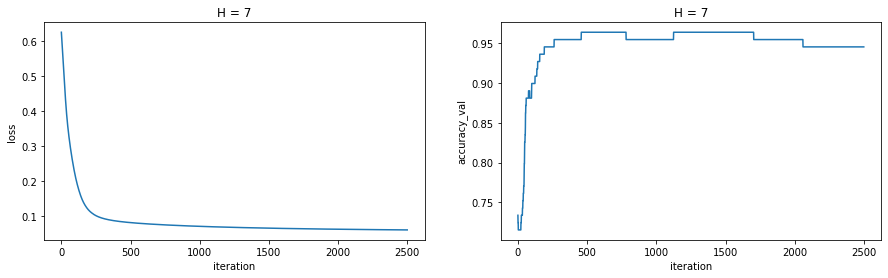

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.139876127243042(s)
The best model: iteration = 437
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9969223484848485, precision = 0.9578935022284776, recall = 0.9621212121212122, f1 = 0.9599410898379971


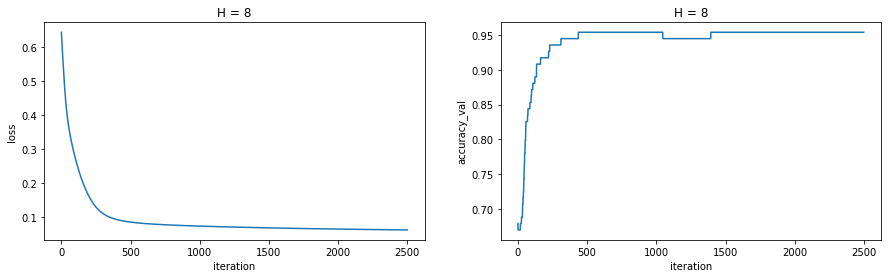

K-Folder index = 1
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.454710960388184(s)
The best model: iteration = 946
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9558823529411765, auc = 0.9966856060606061, precision = 0.9560386473429952, recall = 0.946969696969697, f1 = 0.9512311737987091


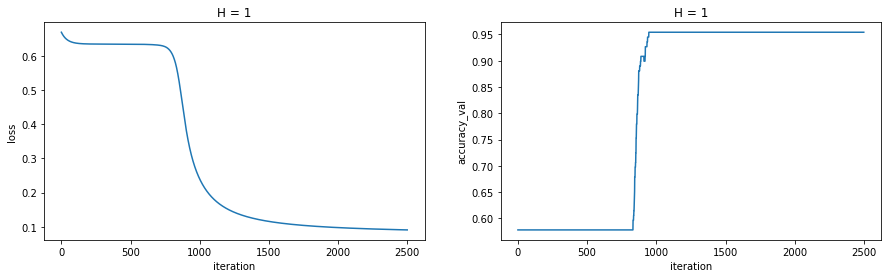

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.032835960388184(s)
The best model: iteration = 776
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9976325757575758, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


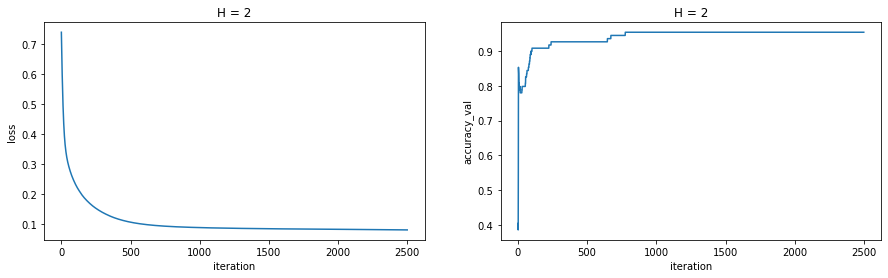

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.153515338897705(s)
The best model: iteration = 583
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9971590909090909, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


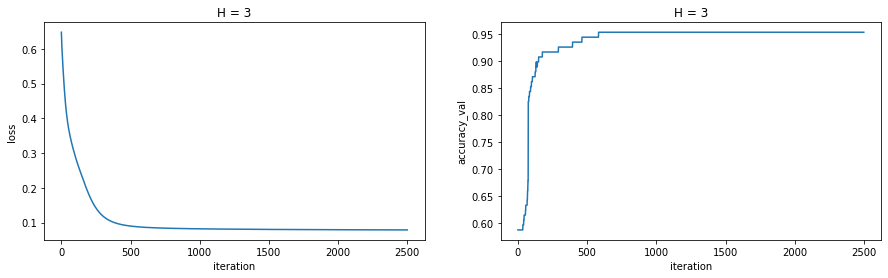

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.956043243408203(s)
The best model: iteration = 174
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9558823529411765, auc = 0.9966856060606061, precision = 0.9560386473429952, recall = 0.946969696969697, f1 = 0.9512311737987091


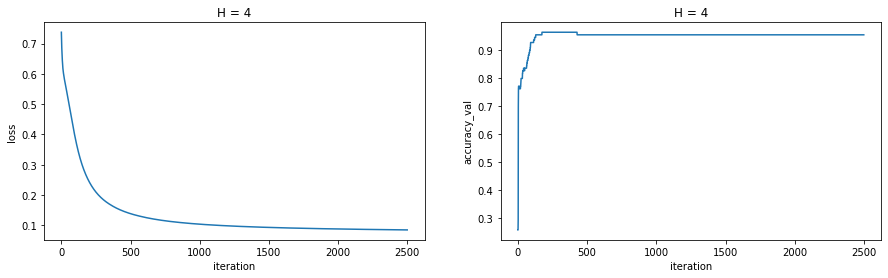

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.95205307006836(s)
The best model: iteration = 574
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9969223484848485, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


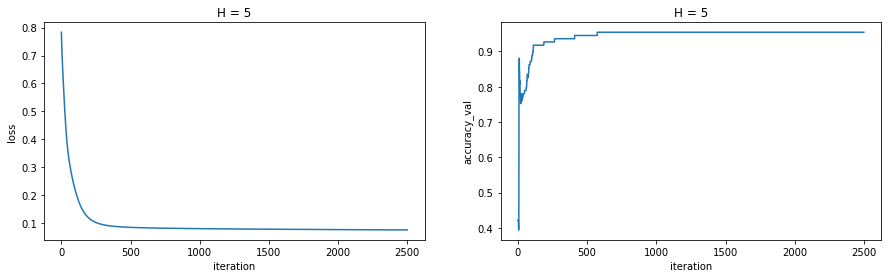

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.640537023544312(s)
The best model: iteration = 552
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9969223484848485, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


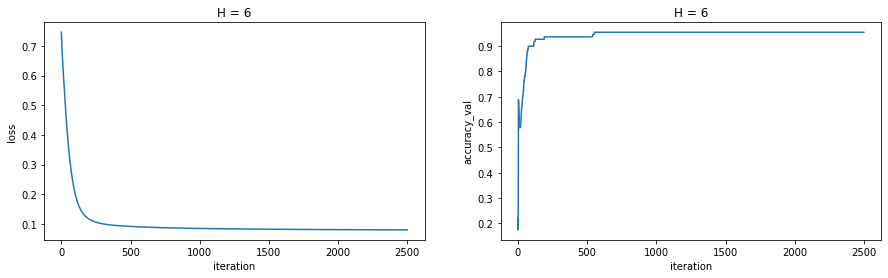

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.121252059936523(s)
The best model: iteration = 407
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9966856060606061, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


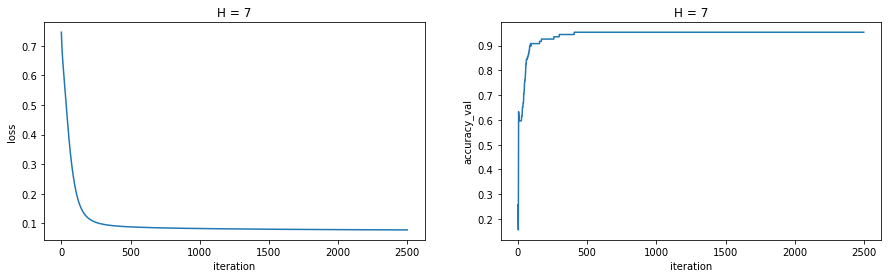

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.002243757247925(s)
The best model: iteration = 13
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9966856060606061, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


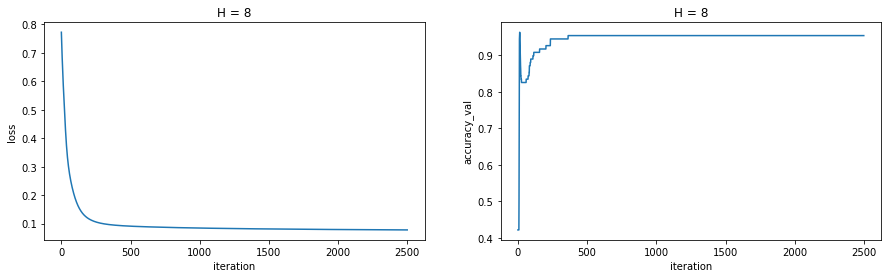

K-Folder index = 2
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.44274091720581(s)
The best model: iteration = 300
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9779411764705882, auc = 0.9926609848484849, precision = 0.9738447102979122, recall = 0.978219696969697, f1 = 0.9759646539027982


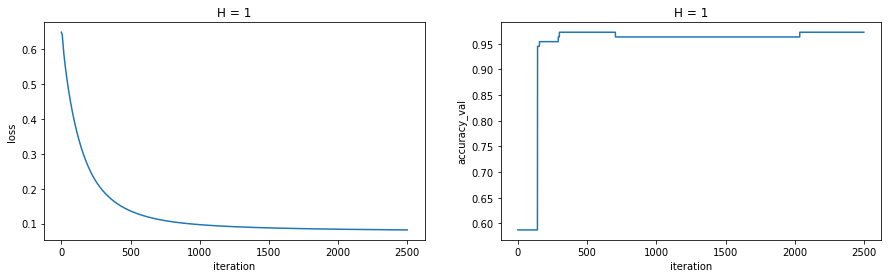

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.275189399719238(s)
The best model: iteration = 22
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9971590909090908, precision = 0.9578935022284776, recall = 0.9621212121212122, f1 = 0.9599410898379971


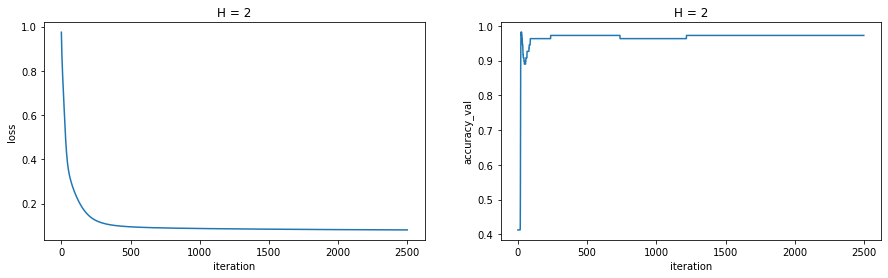

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.93110966682434(s)
The best model: iteration = 111
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9971590909090909, precision = 0.9578935022284776, recall = 0.9621212121212122, f1 = 0.9599410898379971


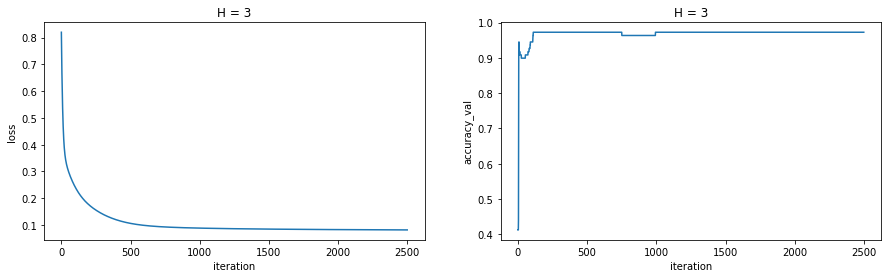

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.932106733322144(s)
The best model: iteration = 210
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


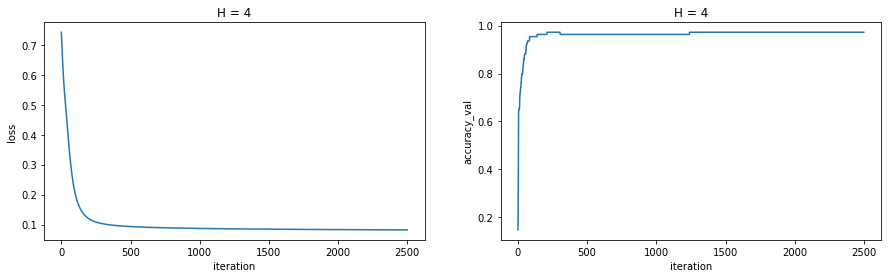

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.096318483352661(s)
The best model: iteration = 879
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9779411764705882, auc = 0.9971590909090908, precision = 0.9738447102979122, recall = 0.978219696969697, f1 = 0.9759646539027982


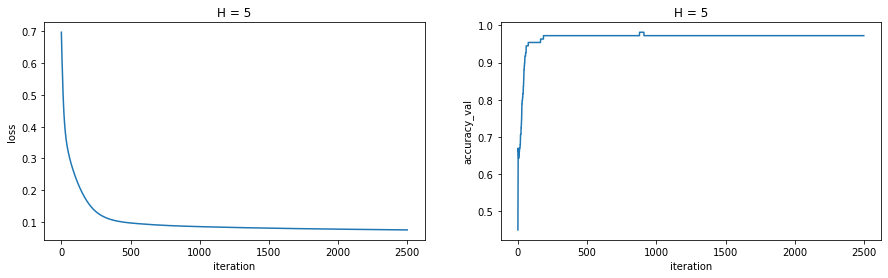

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.91580057144165(s)
The best model: iteration = 825
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9969223484848485, precision = 0.9578935022284776, recall = 0.9621212121212122, f1 = 0.9599410898379971


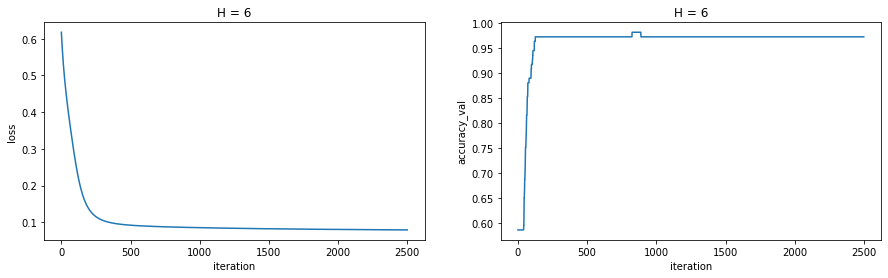

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.05510139465332(s)
The best model: iteration = 232
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9964488636363635, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


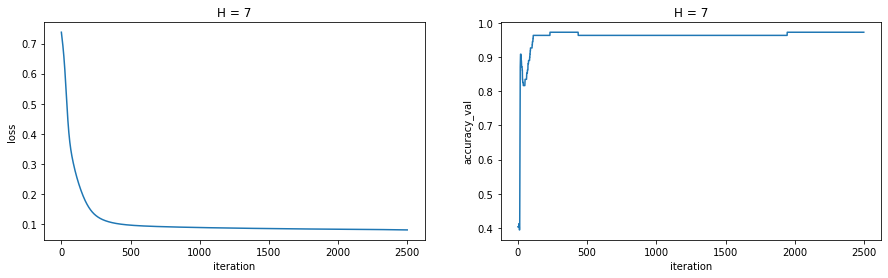

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.339019536972046(s)
The best model: iteration = 695
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9632352941176471, auc = 0.996685606060606, precision = 0.9578935022284776, recall = 0.9621212121212122, f1 = 0.9599410898379971


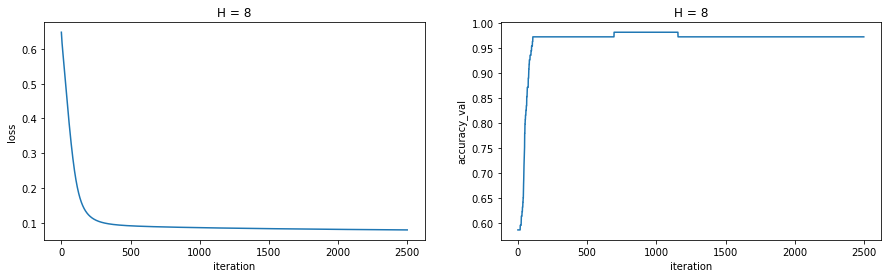

K-Folder index = 3
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.931110620498657(s)
The best model: iteration = 11
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9973958333333334, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


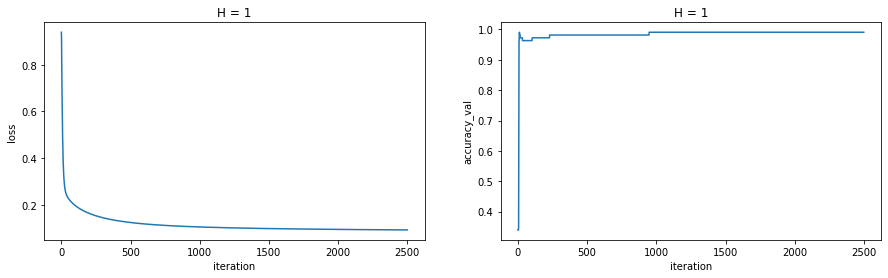

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.940085172653198(s)
The best model: iteration = 462
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9969223484848485, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


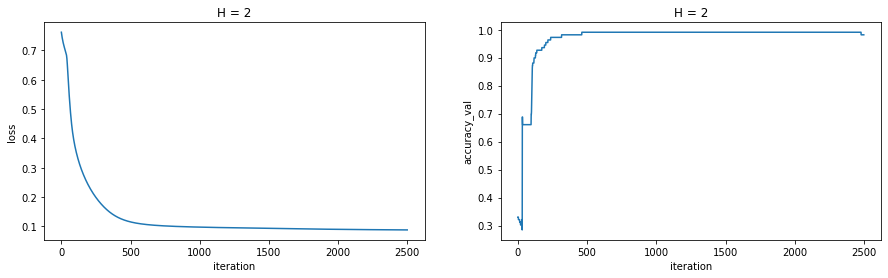

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.931110620498657(s)
The best model: iteration = 671
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


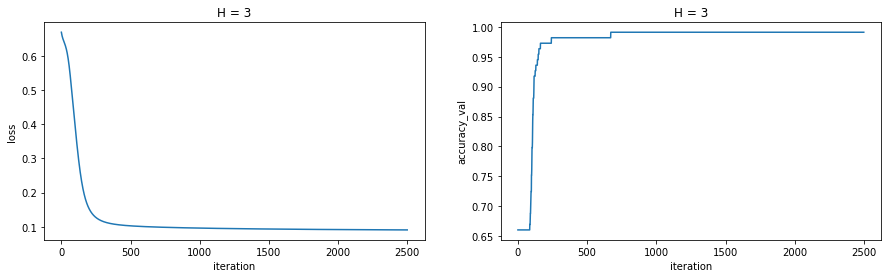

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.92809247970581(s)
The best model: iteration = 1031
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9966856060606061, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


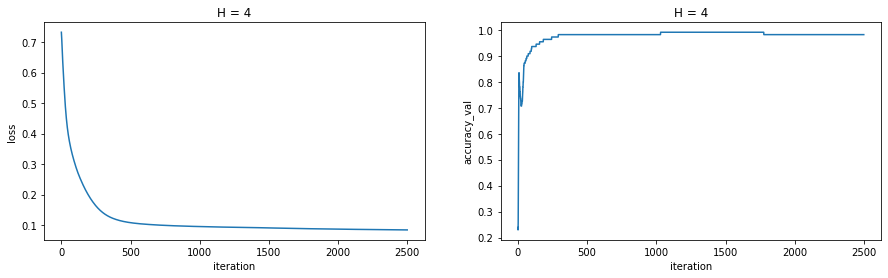

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.648516178131104(s)
The best model: iteration = 486
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9969223484848484, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


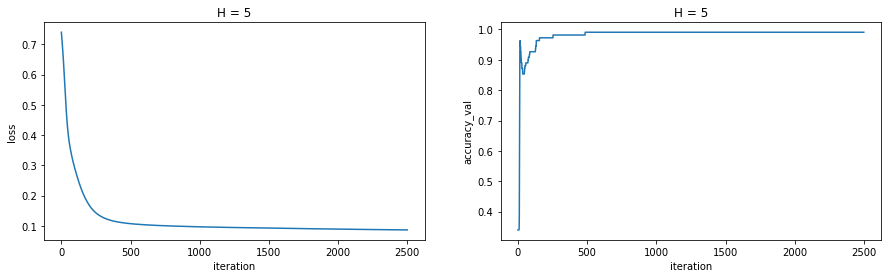

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.81275200843811(s)
The best model: iteration = 500
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


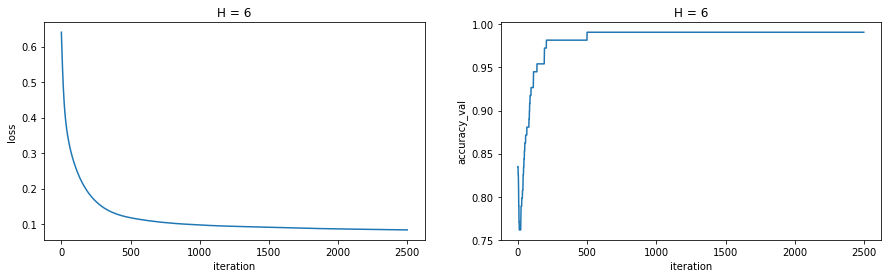

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.224324941635132(s)
The best model: iteration = 1422
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


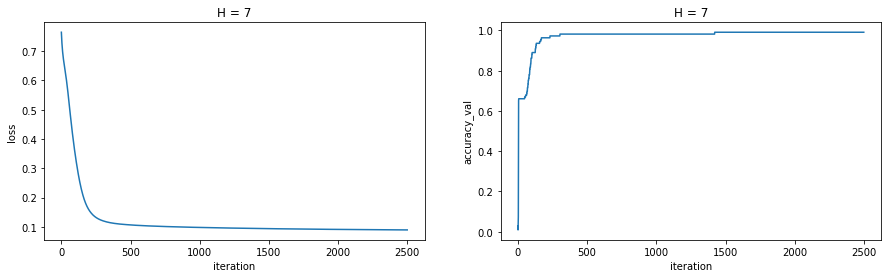

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.935099363327026(s)
The best model: iteration = 886
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9779411764705882, auc = 0.9969223484848484, precision = 0.9738447102979122, recall = 0.978219696969697, f1 = 0.9759646539027982


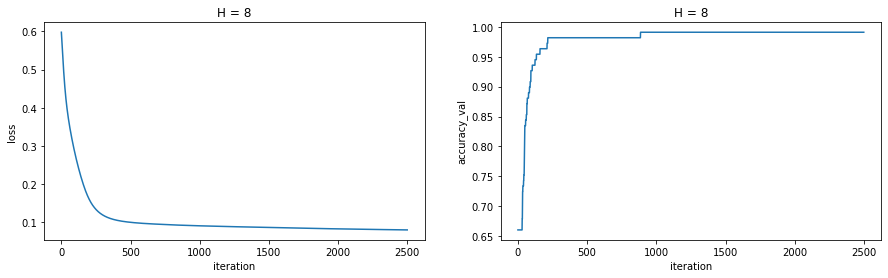

K-Folder index = 4
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.772533893585205(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.7567567567567568
On testing dataset: accuracy = 0.6470588235294118, auc = 0.5, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


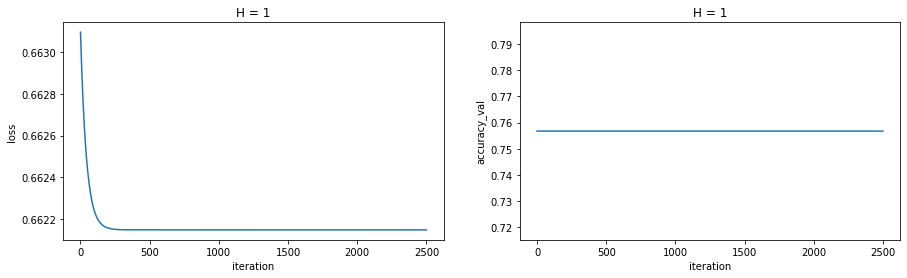

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.956042289733887(s)
The best model: iteration = 71
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9779411764705882, auc = 0.9973958333333334, precision = 0.9738447102979122, recall = 0.978219696969697, f1 = 0.9759646539027982


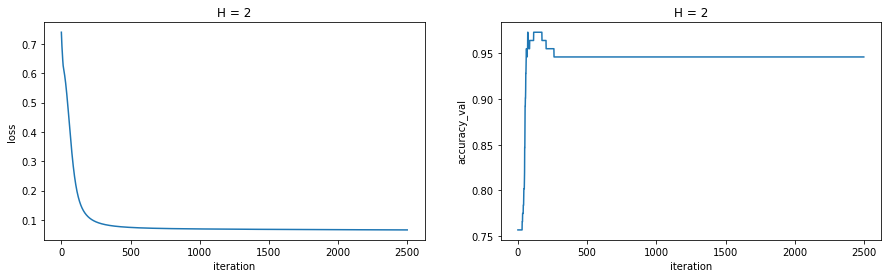

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.459348201751709(s)
The best model: iteration = 135
On validation dataset: accuracy = 0.954954954954955
On testing dataset: accuracy = 0.9779411764705882, auc = 0.9973958333333334, precision = 0.9738447102979122, recall = 0.978219696969697, f1 = 0.9759646539027982


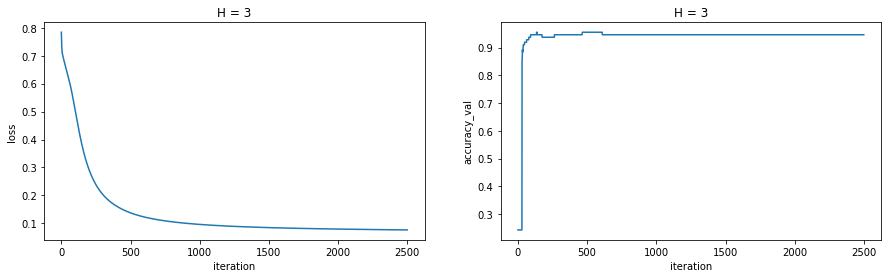

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.614607334136963(s)
The best model: iteration = 116
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9779411764705882, auc = 0.9973958333333334, precision = 0.9738447102979122, recall = 0.978219696969697, f1 = 0.9759646539027982


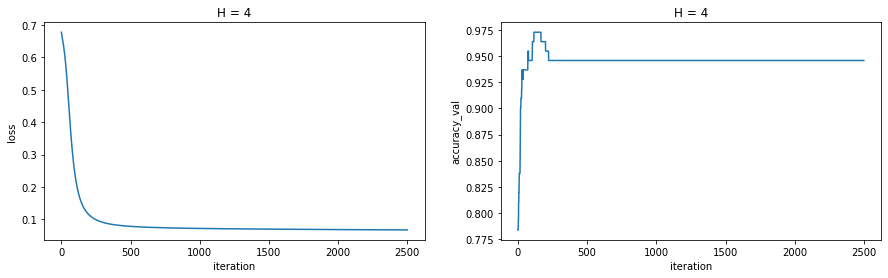

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.812751054763794(s)
The best model: iteration = 22
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9779411764705882, auc = 0.9973958333333334, precision = 0.9738447102979122, recall = 0.978219696969697, f1 = 0.9759646539027982


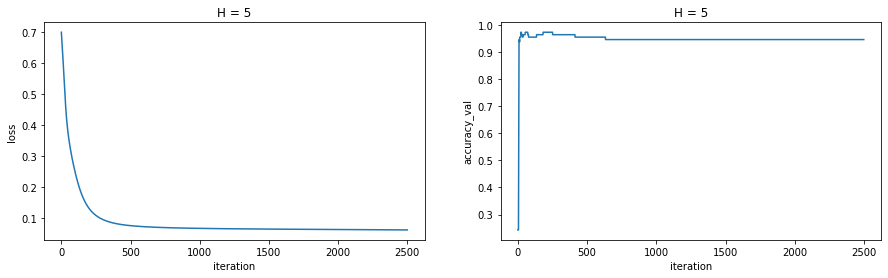

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.258235216140747(s)
The best model: iteration = 40
On validation dataset: accuracy = 0.990990990990991
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9973958333333334, precision = 0.9641860465116279, recall = 0.9725378787878788, f1 = 0.9680975838611307


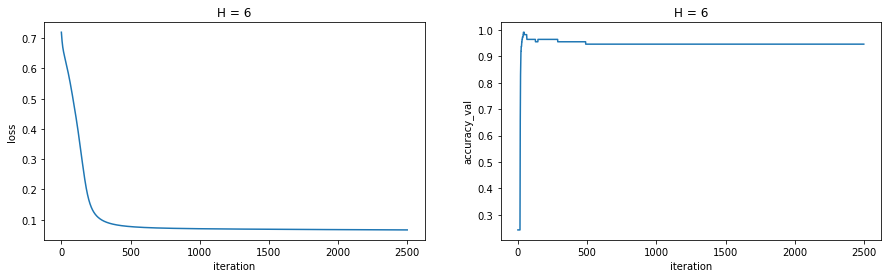

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.955044984817505(s)
The best model: iteration = 139
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9973958333333334, precision = 0.9641860465116279, recall = 0.9725378787878788, f1 = 0.9680975838611307


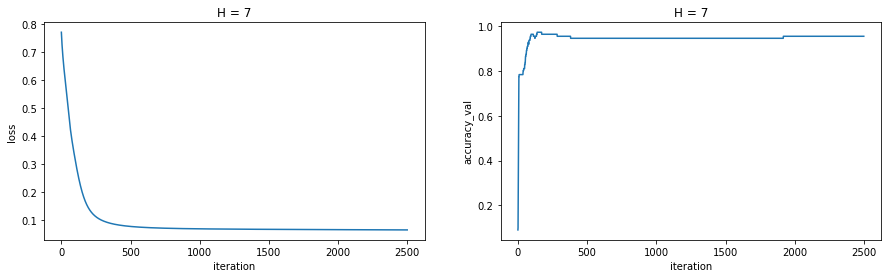

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.028848648071289(s)
The best model: iteration = 169
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9973958333333334, precision = 0.9641860465116279, recall = 0.9725378787878788, f1 = 0.9680975838611307


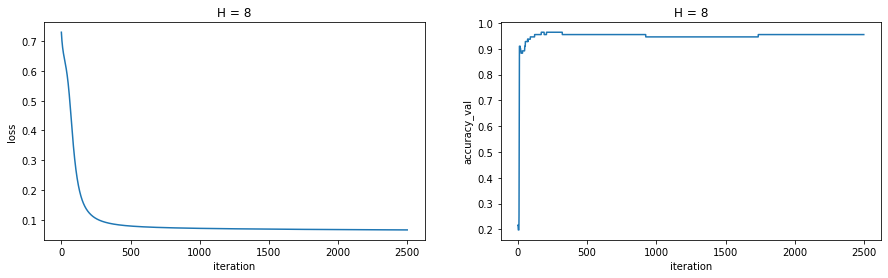

array([[ 1.   ,  0.926,  0.9  ,  0.897,  0.833,  0.867,  0.846,  9.412],
       [ 2.   ,  0.973,  0.965,  0.997,  0.961,  0.961,  0.961,  9.183],
       [ 3.   ,  0.967,  0.968,  0.997,  0.964,  0.966,  0.965,  9.584],
       [ 4.   ,  0.971,  0.969,  0.997,  0.966,  0.967,  0.966,  9.897],
       [ 5.   ,  0.973,  0.968,  0.997,  0.965,  0.965,  0.965,  9.909],
       [ 6.   ,  0.976,  0.965,  0.997,  0.961,  0.962,  0.961, 10.188],
       [ 7.   ,  0.971,  0.966,  0.997,  0.963,  0.963,  0.963, 10.127],
       [ 8.   ,  0.971,  0.968,  0.997,  0.963,  0.966,  0.965,  9.489]])

In [21]:
# diabetes_data features = 8 => H* = 4, lr = 5e-2
framework_run(diabetes_data, device, k=5, H_list=[1,2,3,4,5,6,7,8], lr=5e-2, iteration=2500)

|H_diabetesNN|Val_Accuracy|Test_Accuracy|AUC|Precision|Recall| F1 |Training Time|
|---------|---|------------|-------------|---------|------|----|-------------|
| 1   |  0.926|  0.9  |  0.897|  0.833|  0.867|  0.846|  9.412(s)|
| 2   |  0.973|  0.965|  0.997|  0.961|  0.961|  0.961|  9.183(s)|
| 3   |  0.967|  0.968|  0.997|  0.964|  0.966|  0.965|  9.584(s)|
| 4   |  0.971|  0.969|  0.997|  0.966|  0.967|  0.966|  9.897(s)|
| 5   |  0.973|  0.968|  0.997|  0.965|  0.965|  0.965|  9.909(s)|
| 6   |  0.976|  0.965|  0.997|  0.961|  0.962|  0.961| 10.188(s)|
| 7   |  0.971|  0.966|  0.997|  0.963|  0.963|  0.963| 10.127(s)|
| 8   |  0.971|  0.968|  0.997|  0.963|  0.966|  0.965|  9.489(s)|

K-Folder index = 0
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.899195432662964(s)
The best model: iteration = 1191
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9971590909090909, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


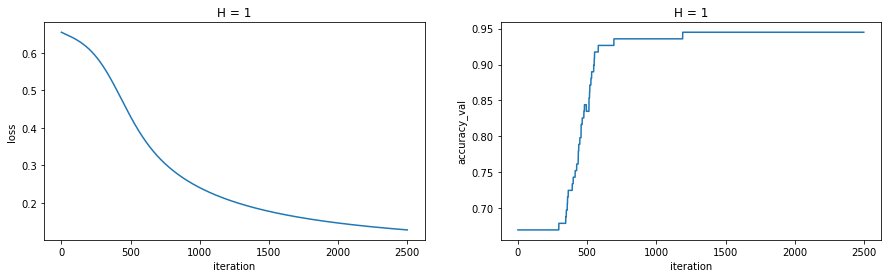

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.996933460235596(s)
The best model: iteration = 888
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9976325757575758, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


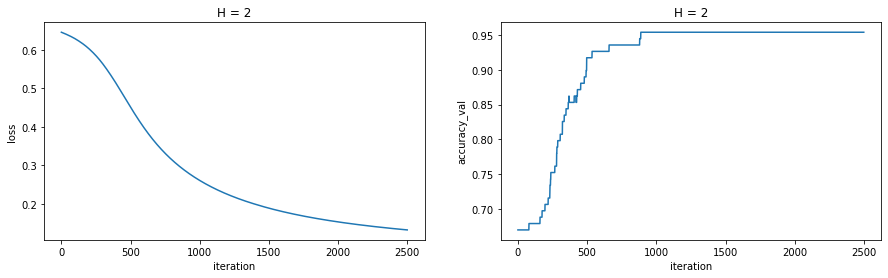

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.06874132156372(s)
The best model: iteration = 1779
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9973958333333334, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


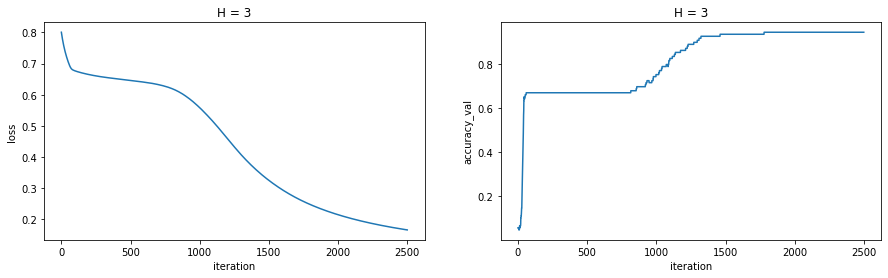

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.154512643814087(s)
The best model: iteration = 1651
On validation dataset: accuracy = 0.9357798165137615
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818182, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


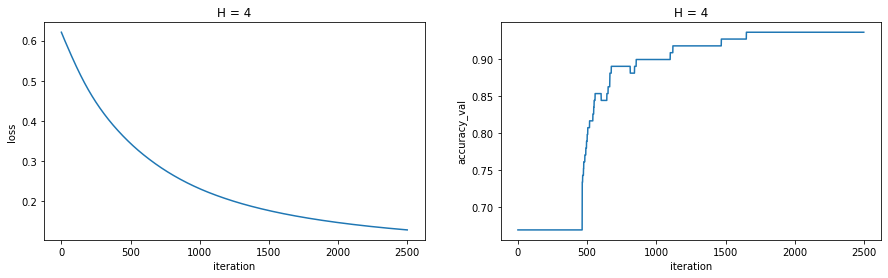

K-Folder index = 1
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.922134160995483(s)
The best model: iteration = 595
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9971590909090909, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


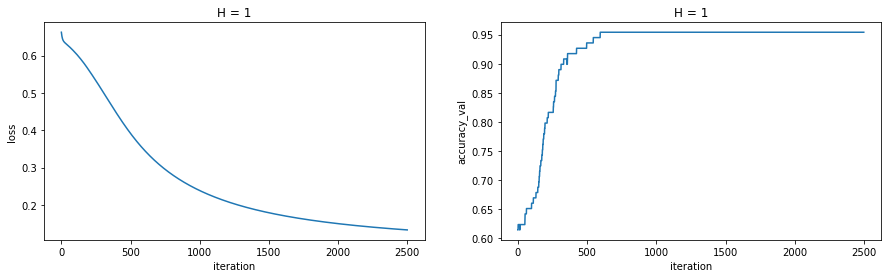

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.042810916900635(s)
The best model: iteration = 1038
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9959753787878788, precision = 0.9503052503052503, recall = 0.9365530303030303, f1 = 0.9428125187721512


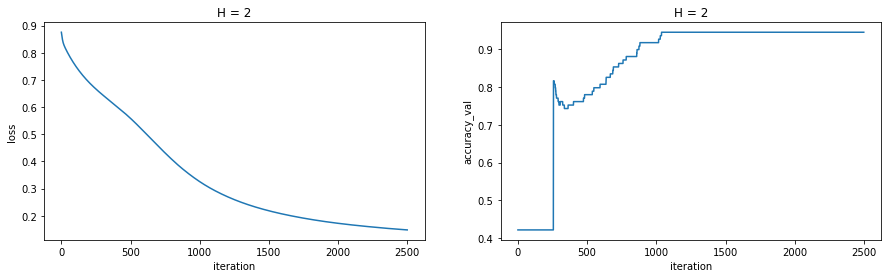

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.998929262161255(s)
The best model: iteration = 1293
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818181, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


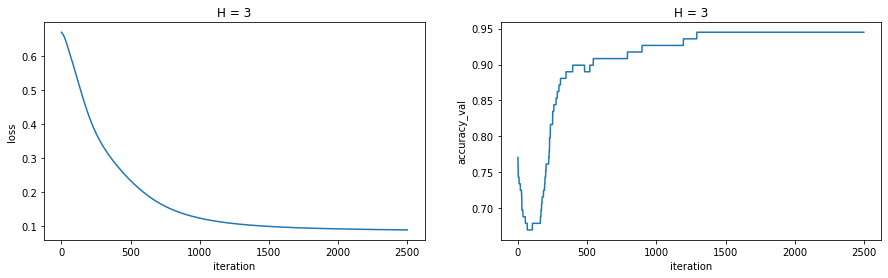

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.320068836212158(s)
The best model: iteration = 1665
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818181, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


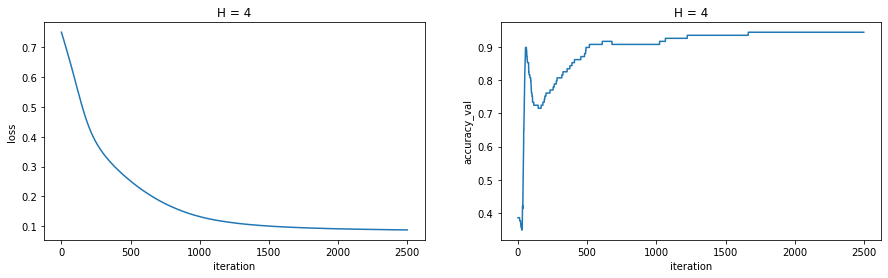

K-Folder index = 2
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.414817333221436(s)
The best model: iteration = 362
On validation dataset: accuracy = 0.5871559633027523
On testing dataset: accuracy = 0.6470588235294118, auc = 0.46875, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


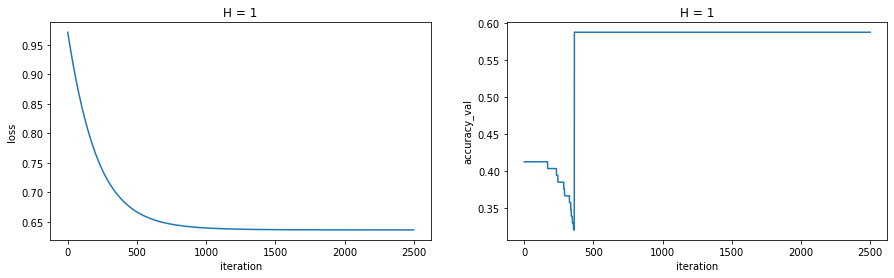

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.918144464492798(s)
The best model: iteration = 948
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9981060606060606, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


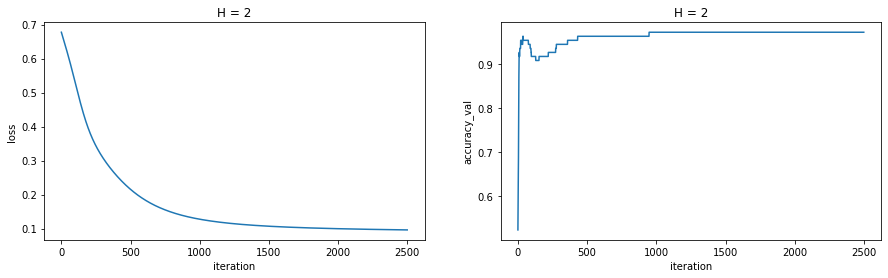

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.921135663986206(s)
The best model: iteration = 1078
On validation dataset: accuracy = 0.9724770642201835
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9971590909090909, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


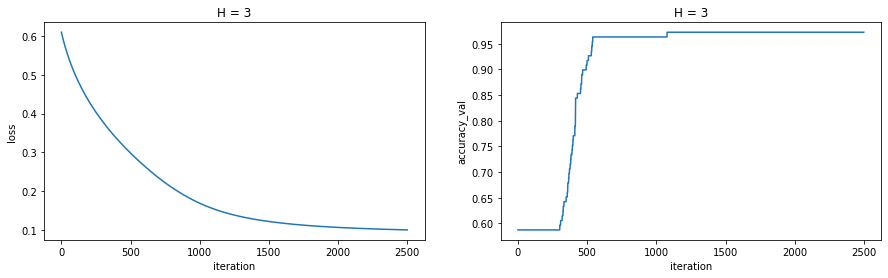

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.03981900215149(s)
The best model: iteration = 1549
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9558823529411765, auc = 0.9976325757575757, precision = 0.9560386473429952, recall = 0.946969696969697, f1 = 0.9512311737987091


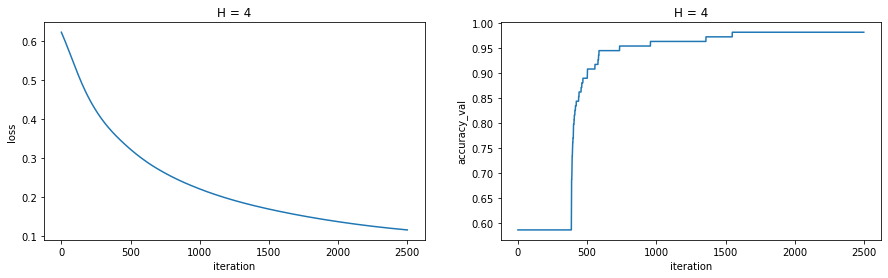

K-Folder index = 3
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.01189398765564(s)
The best model: iteration = 1540
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9969223484848485, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


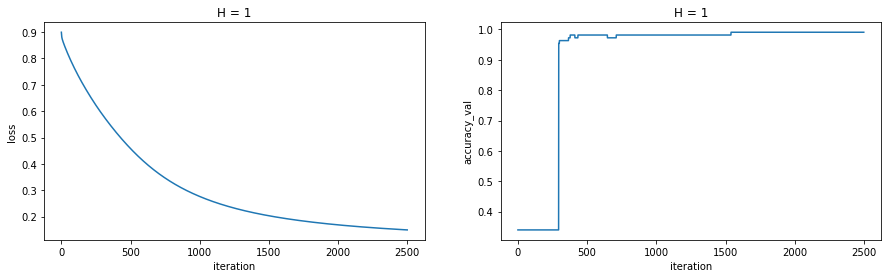

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.912160396575928(s)
The best model: iteration = 1784
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9978693181818182, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


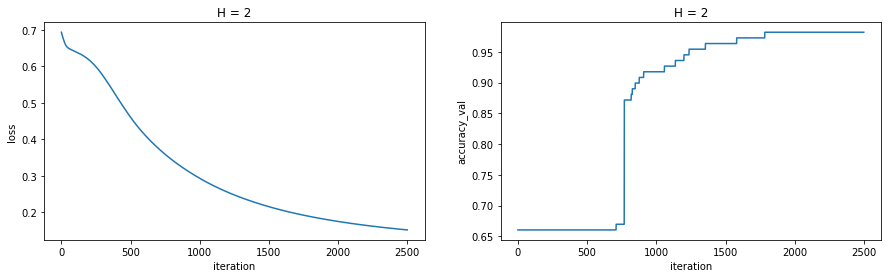

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.992944955825806(s)
The best model: iteration = 1209
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9969223484848485, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


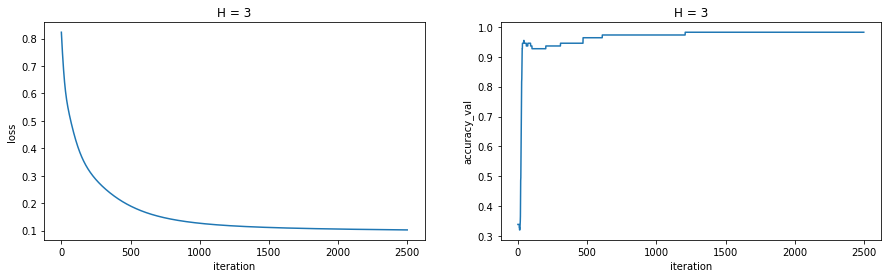

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.463685512542725(s)
The best model: iteration = 2182
On validation dataset: accuracy = 0.9908256880733946
On testing dataset: accuracy = 0.9632352941176471, auc = 0.9973958333333334, precision = 0.9618694716710495, recall = 0.9573863636363636, f1 = 0.959559916741005


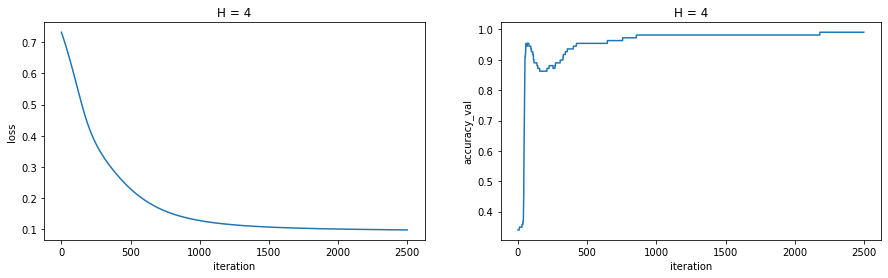

K-Folder index = 4
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.07637095451355(s)
The best model: iteration = 294
On validation dataset: accuracy = 0.954954954954955
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9964488636363636, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


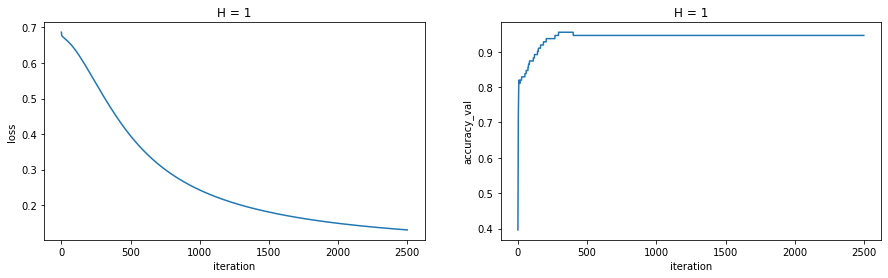

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.08801531791687(s)
The best model: iteration = 546
On validation dataset: accuracy = 0.954954954954955
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9957386363636364, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


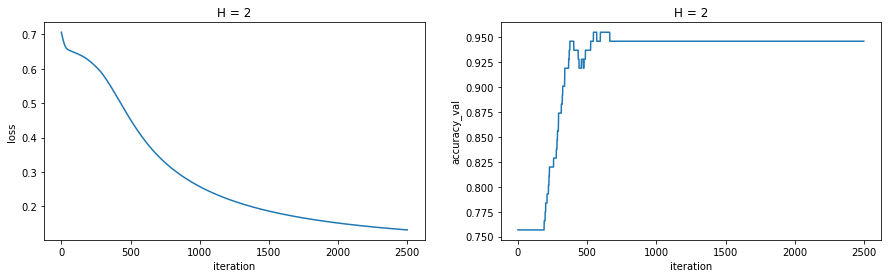

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.555440425872803(s)
The best model: iteration = 533
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9973958333333334, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


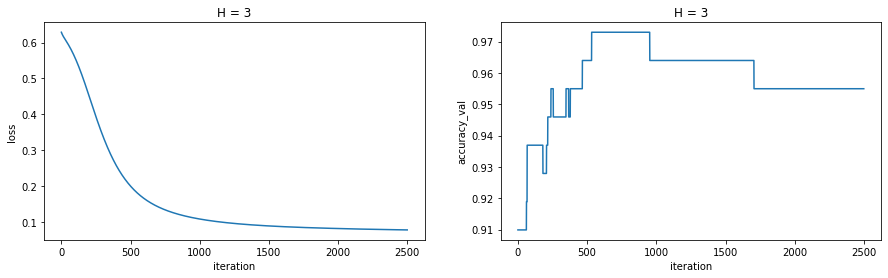

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.01289176940918(s)
The best model: iteration = 927
On validation dataset: accuracy = 0.972972972972973
On testing dataset: accuracy = 0.9705882352941176, auc = 0.9978693181818181, precision = 0.9678030303030303, recall = 0.9678030303030303, f1 = 0.9678030303030303


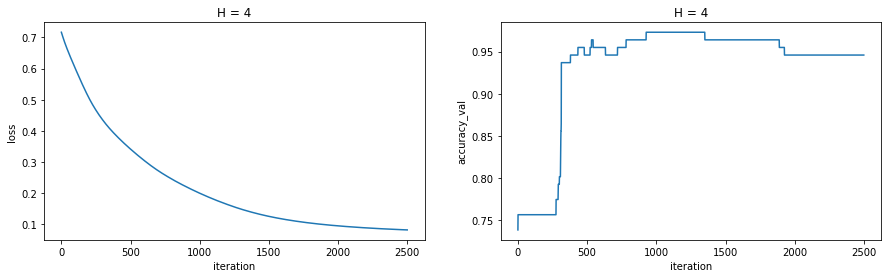

array([[1.   , 0.886, 0.903, 0.891, 0.837, 0.87 , 0.85 , 9.465],
       [2.   , 0.962, 0.965, 0.997, 0.963, 0.959, 0.961, 9.192],
       [3.   , 0.963, 0.966, 0.997, 0.964, 0.962, 0.963, 9.107],
       [4.   , 0.965, 0.963, 0.998, 0.962, 0.957, 0.96 , 9.198]])

In [22]:
# iris_data features = 4 => H* = 3, lr = 1e-2
framework_run(iris_data, device, k=5, H_list=[1,2,3,4], lr=1e-2, iteration=2500)

|H_irisNN|Val_Accuracy|Test_Accuracy|AUC|Precision|Recall| F1 |Training Time|
|---------|---|------------|-------------|---------|------|----|-------------|
|1   | 0.886| 0.903| 0.891| 0.837| 0.87 | 0.85 | 9.465(s)|
|2   | 0.962| 0.965| 0.997| 0.963| 0.959| 0.961| 9.192(s)|
|3   | 0.963| 0.966| 0.997| 0.964| 0.962| 0.963| 9.107(s)|
|4   | 0.965| 0.963| 0.998| 0.962| 0.957| 0.96 | 9.198(s)|

K-Folder index = 0
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.851323366165161(s)
The best model: iteration = 2368
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9604640151515151, precision = 0.9503052503052503, recall = 0.9365530303030303, f1 = 0.9428125187721512


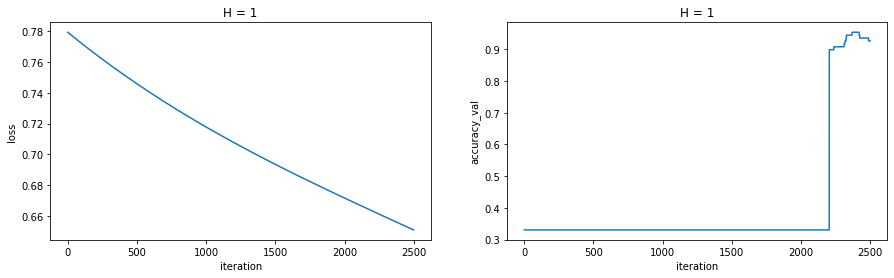

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.819408416748047(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.6697247706422018
On testing dataset: accuracy = 0.6470588235294118, auc = 0.9952651515151516, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


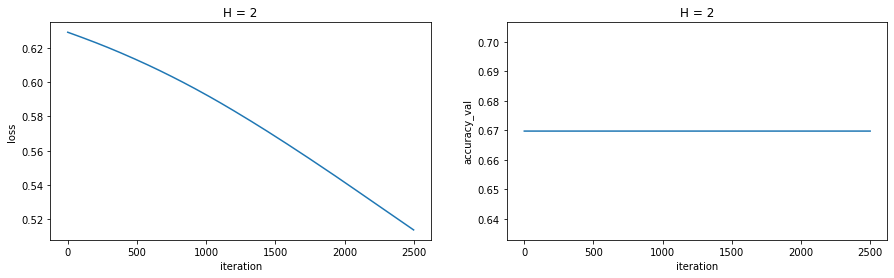

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.883885860443115(s)
The best model: iteration = 867
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.8602941176470589, auc = 0.9969223484848485, precision = 0.9112149532710281, recall = 0.8020833333333333, f1 = 0.8279054279054279


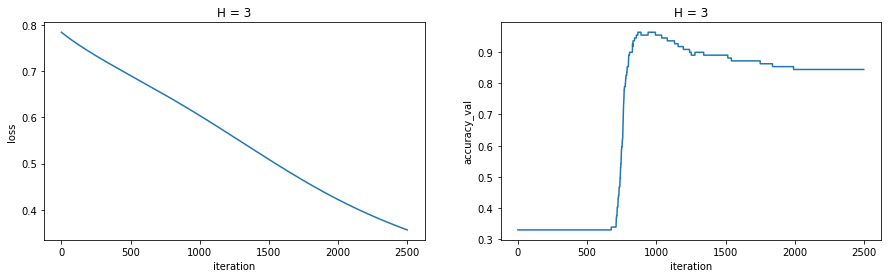

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.299775123596191(s)
The best model: iteration = 2213
On validation dataset: accuracy = 0.8073394495412844
On testing dataset: accuracy = 0.8455882352941176, auc = 0.9973958333333334, precision = 0.9036697247706422, recall = 0.78125, f1 = 0.8067005076142132


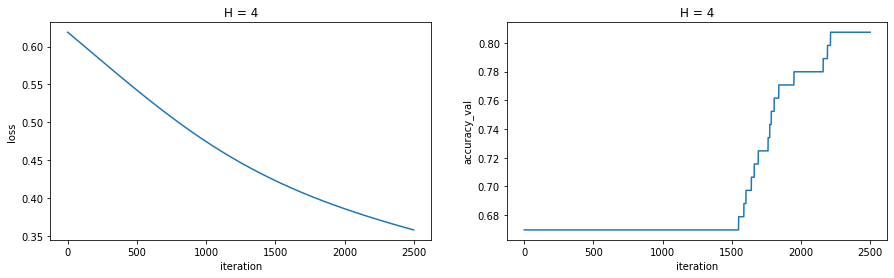

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.722318172454834(s)
The best model: iteration = 2477
On validation dataset: accuracy = 0.8440366972477065
On testing dataset: accuracy = 0.8382352941176471, auc = 0.9971590909090909, precision = 0.9, recall = 0.7708333333333333, f1 = 0.7957957957957958


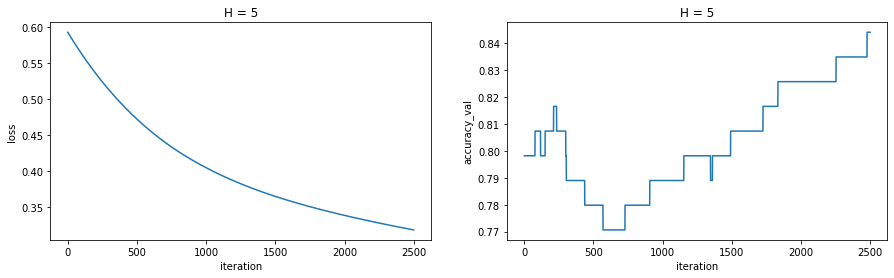

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.321065425872803(s)
The best model: iteration = 1523
On validation dataset: accuracy = 0.944954128440367
On testing dataset: accuracy = 0.9338235294117647, auc = 0.9962121212121212, precision = 0.9536082474226804, recall = 0.90625, f1 = 0.9239515377446412


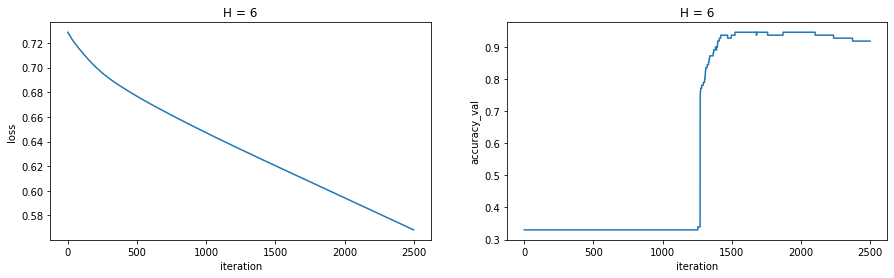

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.063755750656128(s)
The best model: iteration = 2145
On validation dataset: accuracy = 0.8899082568807339
On testing dataset: accuracy = 0.9264705882352942, auc = 0.9981060606060607, precision = 0.9489795918367347, recall = 0.8958333333333333, f1 = 0.9149787446861715


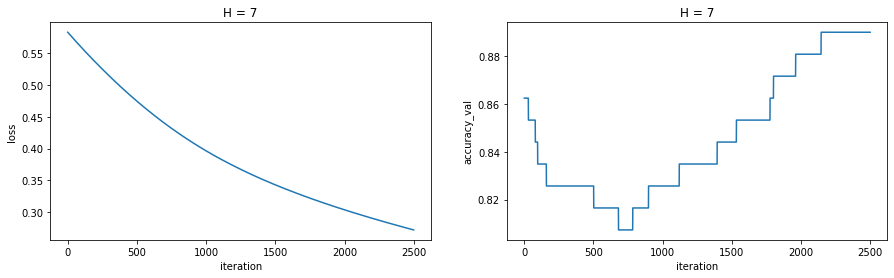

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.966014862060547(s)
The best model: iteration = 694
On validation dataset: accuracy = 0.7339449541284404
On testing dataset: accuracy = 0.7573529411764706, auc = 0.9978693181818181, precision = 0.8636363636363636, recall = 0.65625, f1 = 0.6591478696741855


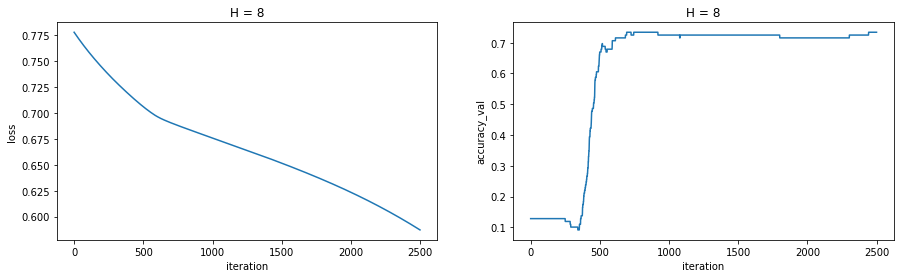

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.334030866622925(s)
The best model: iteration = 2239
On validation dataset: accuracy = 0.8623853211009175
On testing dataset: accuracy = 0.9044117647058824, auc = 0.9978693181818181, precision = 0.9356435643564356, recall = 0.8645833333333333, f1 = 0.8872952125964175


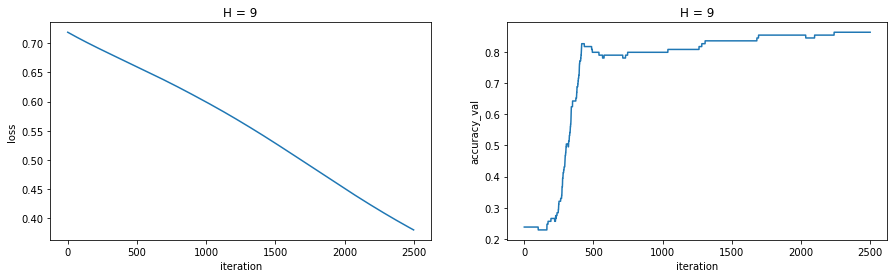

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.863265991210938(s)
The best model: iteration = 2177
On validation dataset: accuracy = 0.7706422018348624
On testing dataset: accuracy = 0.7867647058823529, auc = 0.9976325757575758, precision = 0.8760683760683761, recall = 0.6979166666666666, f1 = 0.7128503822351656


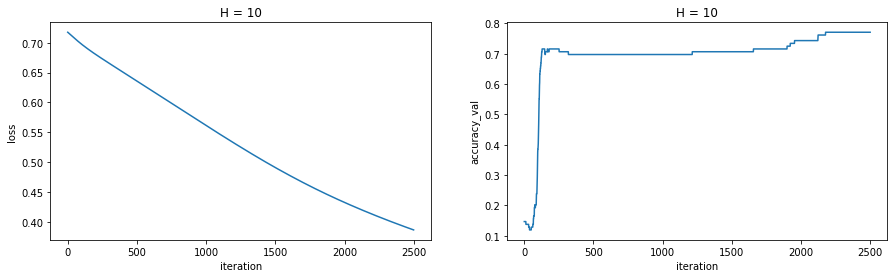

K-Folder index = 1
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.403172254562378(s)
The best model: iteration = 2492
On validation dataset: accuracy = 0.8990825688073395
On testing dataset: accuracy = 0.9044117647058824, auc = 0.9730113636363636, precision = 0.9258804258804259, recall = 0.8693181818181819, f1 = 0.8887700534759359


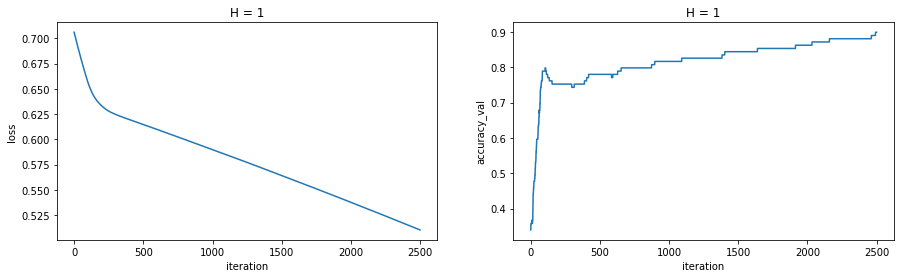

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.708029747009277(s)
The best model: iteration = 490
On validation dataset: accuracy = 0.8532110091743119
On testing dataset: accuracy = 0.8308823529411765, auc = 0.9976325757575758, precision = 0.8963963963963963, recall = 0.7604166666666667, f1 = 0.7846768087010394


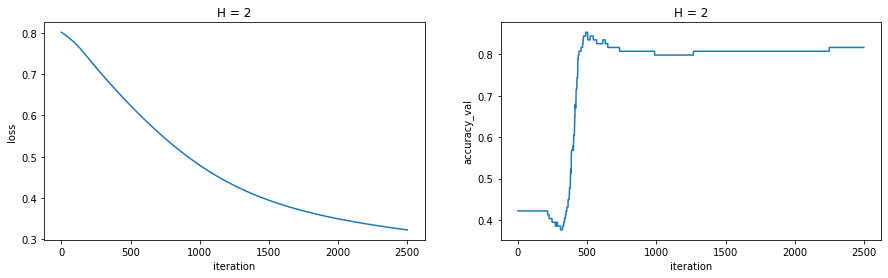

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.161492824554443(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.5779816513761468
On testing dataset: accuracy = 0.6470588235294118, auc = 0.8790246212121212, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


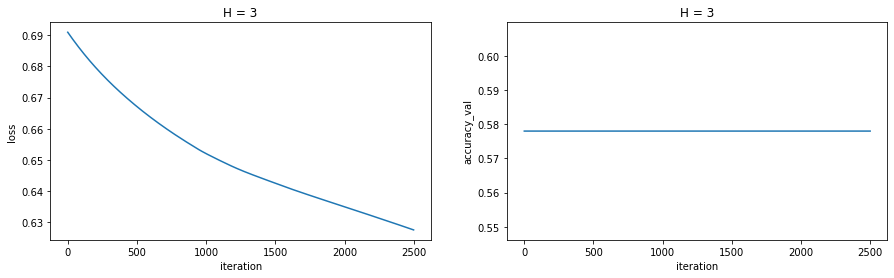

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.99493932723999(s)
The best model: iteration = 70
On validation dataset: accuracy = 0.9541284403669725
On testing dataset: accuracy = 0.8676470588235294, auc = 0.9978693181818182, precision = 0.9150943396226415, recall = 0.8125, f1 = 0.838223632038065


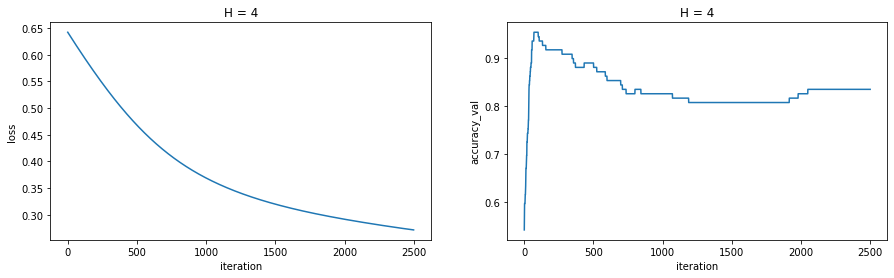

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.865285158157349(s)
The best model: iteration = 514
On validation dataset: accuracy = 0.5871559633027523
On testing dataset: accuracy = 0.6470588235294118, auc = 0.6747159090909092, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


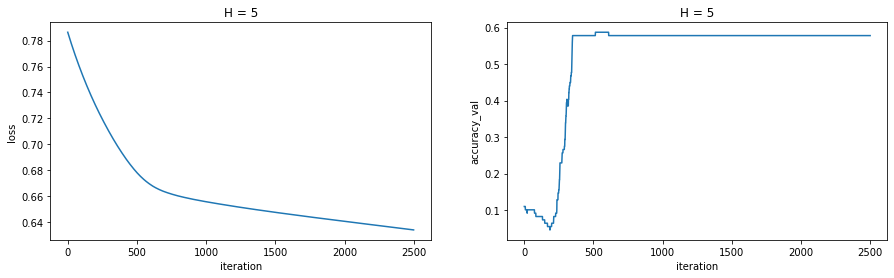

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.967337846755981(s)
The best model: iteration = 9
On validation dataset: accuracy = 0.6055045871559633
On testing dataset: accuracy = 0.6911764705882353, auc = 0.9988162878787878, precision = 0.8384615384615385, recall = 0.5625, f1 = 0.5147808358817534


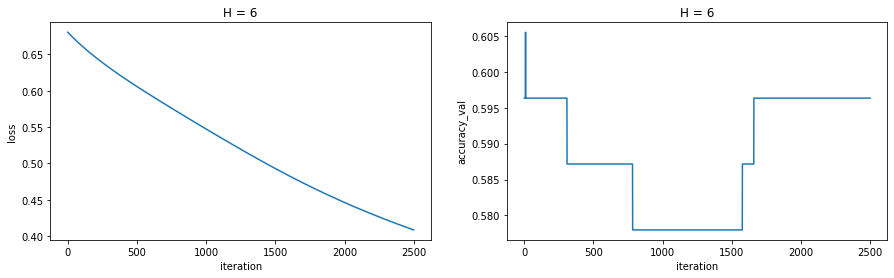

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.782481908798218(s)
The best model: iteration = 2464
On validation dataset: accuracy = 0.8165137614678899
On testing dataset: accuracy = 0.8161764705882353, auc = 0.9962121212121212, precision = 0.8893805309734513, recall = 0.7395833333333334, f1 = 0.7617546072454628


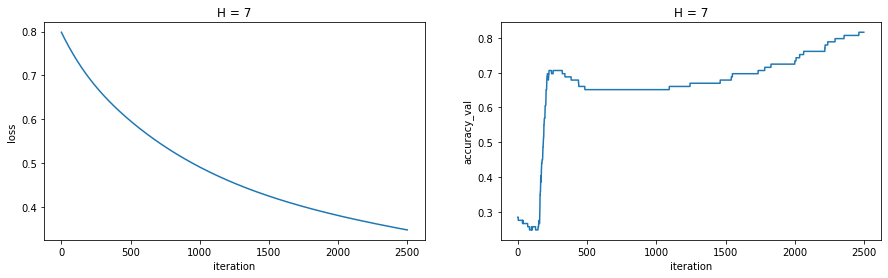

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.206697225570679(s)
The best model: iteration = 406
On validation dataset: accuracy = 0.8073394495412844
On testing dataset: accuracy = 0.7647058823529411, auc = 0.9971590909090908, precision = 0.8666666666666667, recall = 0.6666666666666666, f1 = 0.673076923076923


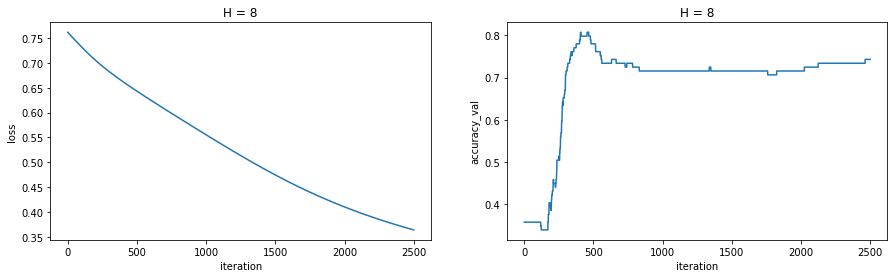

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.556435108184814(s)
The best model: iteration = 92
On validation dataset: accuracy = 0.7889908256880734
On testing dataset: accuracy = 0.7794117647058824, auc = 0.9959753787878788, precision = 0.8728813559322034, recall = 0.6875, f1 = 0.6999117387466902


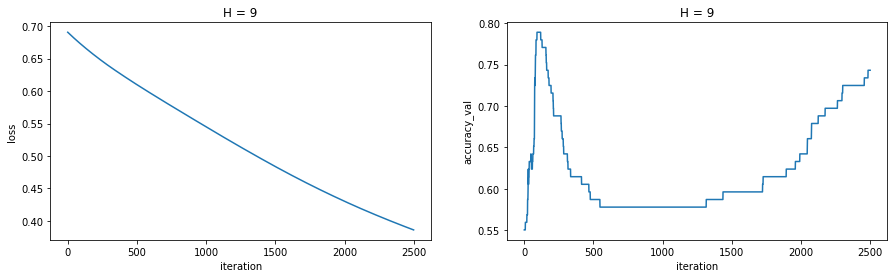

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.138553142547607(s)
The best model: iteration = 1863
On validation dataset: accuracy = 0.8715596330275229
On testing dataset: accuracy = 0.9117647058823529, auc = 0.9966856060606061, precision = 0.94, recall = 0.875, f1 = 0.8966565349544073


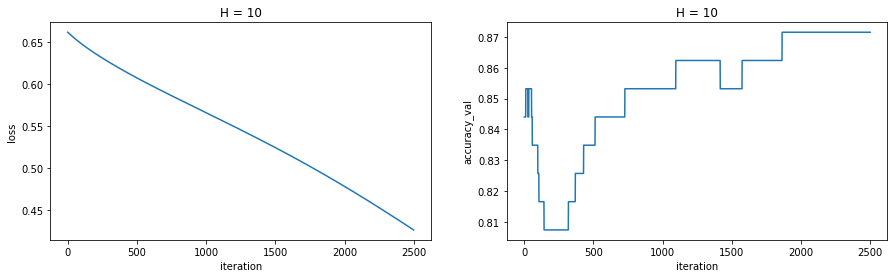

K-Folder index = 2
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.957040786743164(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.5871559633027523
On testing dataset: accuracy = 0.6470588235294118, auc = 0.4270833333333333, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


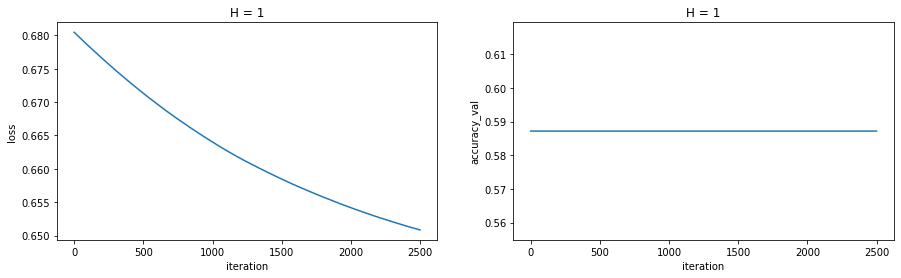

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.868278503417969(s)
The best model: iteration = 1458
On validation dataset: accuracy = 0.963302752293578
On testing dataset: accuracy = 0.9485294117647058, auc = 0.9971590909090909, precision = 0.9503052503052503, recall = 0.9365530303030303, f1 = 0.9428125187721512


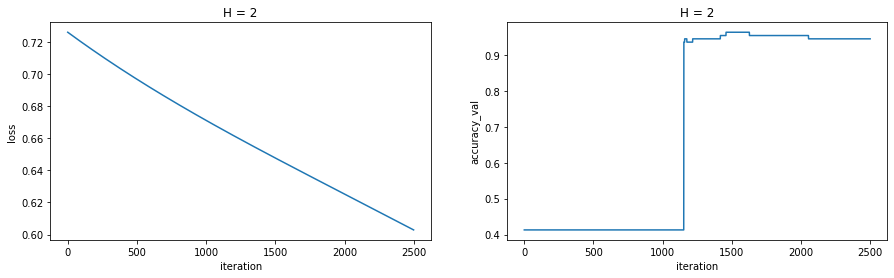

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.914802312850952(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.5871559633027523
On testing dataset: accuracy = 0.6470588235294118, auc = 0.47490530303030304, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


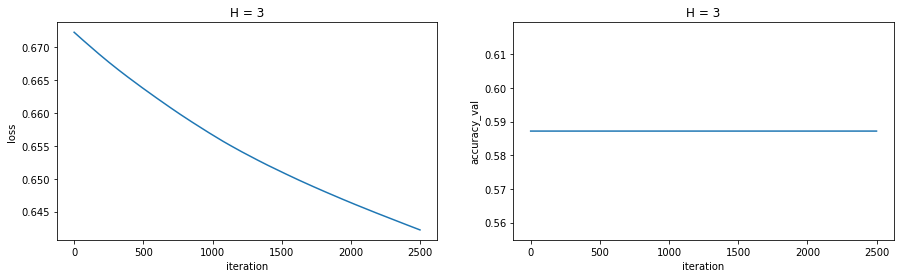

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.86593246459961(s)
The best model: iteration = 2486
On validation dataset: accuracy = 0.8440366972477065
On testing dataset: accuracy = 0.8161764705882353, auc = 0.9983428030303031, precision = 0.8893805309734513, recall = 0.7395833333333334, f1 = 0.7617546072454628


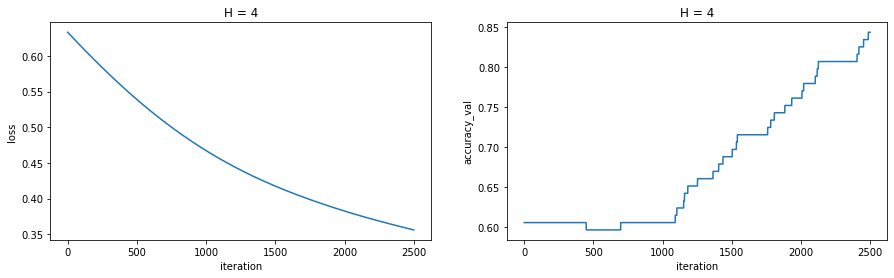

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.046127796173096(s)
The best model: iteration = 2254
On validation dataset: accuracy = 0.6146788990825688
On testing dataset: accuracy = 0.6911764705882353, auc = 0.9981060606060607, precision = 0.8384615384615385, recall = 0.5625, f1 = 0.5147808358817534


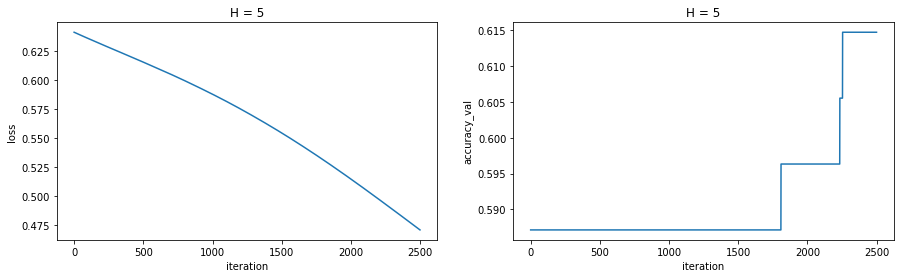

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.38689112663269(s)
The best model: iteration = 2186
On validation dataset: accuracy = 0.8990825688073395
On testing dataset: accuracy = 0.8602941176470589, auc = 0.9976325757575757, precision = 0.9112149532710281, recall = 0.8020833333333333, f1 = 0.8279054279054279


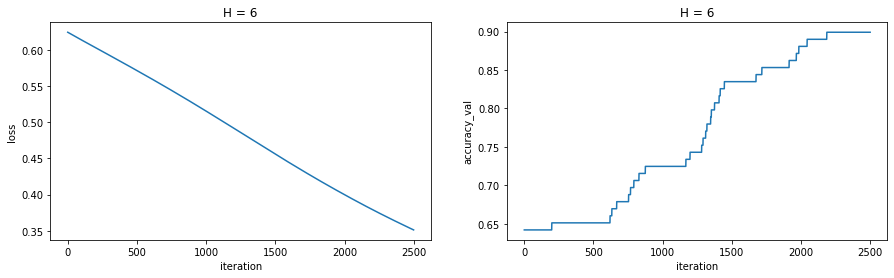

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.968011856079102(s)
The best model: iteration = 2491
On validation dataset: accuracy = 0.8532110091743119
On testing dataset: accuracy = 0.8014705882352942, auc = 0.998342803030303, precision = 0.8826086956521739, recall = 0.71875, f1 = 0.7378453630327694


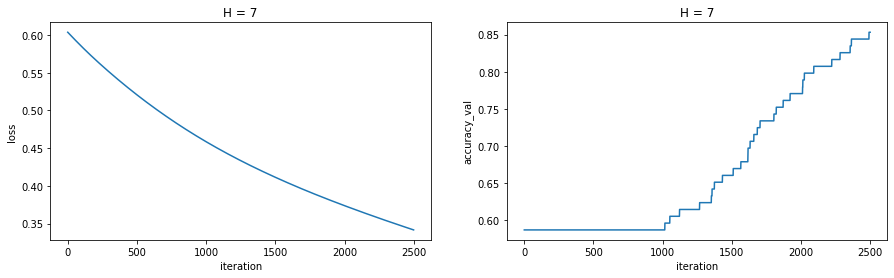

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.959035158157349(s)
The best model: iteration = 39
On validation dataset: accuracy = 0.9174311926605505
On testing dataset: accuracy = 0.875, auc = 0.9976325757575758, precision = 0.9190476190476191, recall = 0.8229166666666667, f1 = 0.8483636125139371


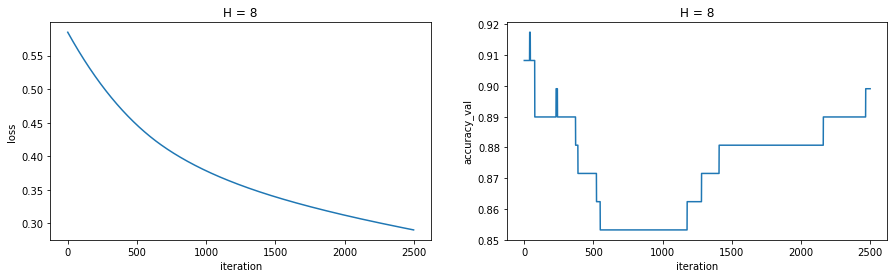

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.283169269561768(s)
The best model: iteration = 2492
On validation dataset: accuracy = 0.7889908256880734
On testing dataset: accuracy = 0.7647058823529411, auc = 0.9976325757575757, precision = 0.8666666666666667, recall = 0.6666666666666666, f1 = 0.673076923076923


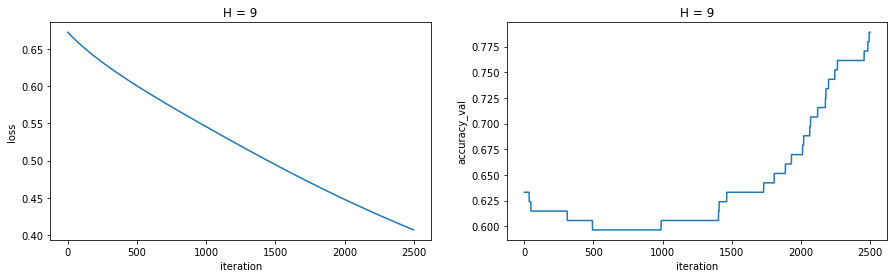

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.899171590805054(s)
The best model: iteration = 2499
On validation dataset: accuracy = 0.7431192660550459
On testing dataset: accuracy = 0.7720588235294118, auc = 0.9969223484848485, precision = 0.8697478991596639, recall = 0.6770833333333334, f1 = 0.6866592344853215


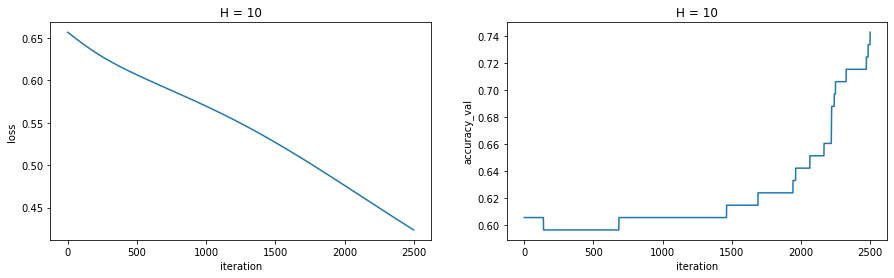

K-Folder index = 3
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.341338396072388(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.3394495412844037
On testing dataset: accuracy = 0.35294117647058826, auc = 0.8813920454545455, precision = 0.17647058823529413, recall = 0.5, f1 = 0.2608695652173913


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


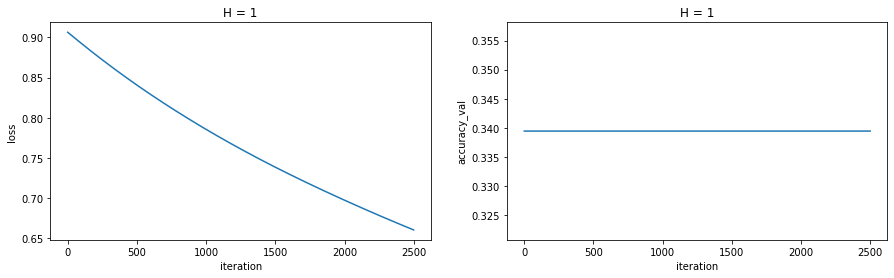

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.54746127128601(s)
The best model: iteration = 92
On validation dataset: accuracy = 0.6605504587155964
On testing dataset: accuracy = 0.6470588235294118, auc = 0.911813446969697, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


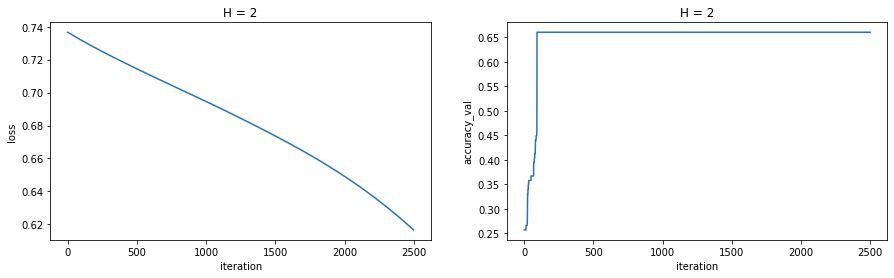

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.138555765151978(s)
The best model: iteration = 2236
On validation dataset: accuracy = 0.7064220183486238
On testing dataset: accuracy = 0.7205882352941176, auc = 0.998816287878788, precision = 0.8492063492063492, recall = 0.6041666666666666, f1 = 0.5836287463744763


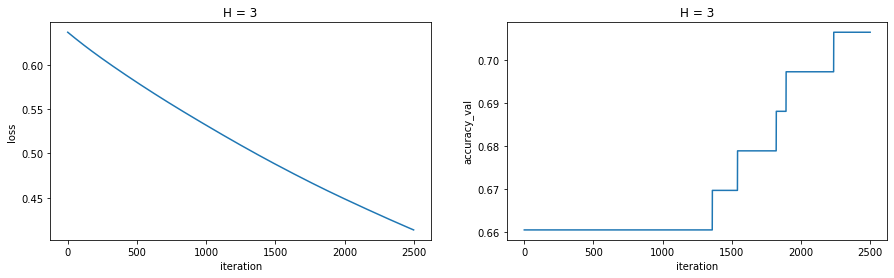

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.95205307006836(s)
The best model: iteration = 2417
On validation dataset: accuracy = 0.7798165137614679
On testing dataset: accuracy = 0.7352941176470589, auc = 0.9973958333333334, precision = 0.8548387096774194, recall = 0.625, f1 = 0.6150943396226416


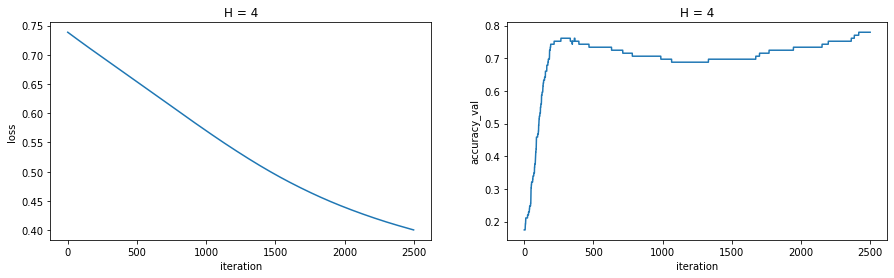

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.85232138633728(s)
The best model: iteration = 0
On validation dataset: accuracy = 0.6605504587155964
On testing dataset: accuracy = 0.6470588235294118, auc = 0.9779829545454545, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


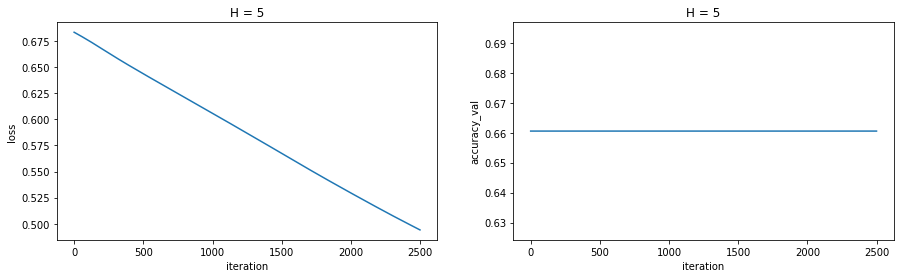

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.969007730484009(s)
The best model: iteration = 2303
On validation dataset: accuracy = 0.908256880733945
On testing dataset: accuracy = 0.8676470588235294, auc = 0.9964488636363636, precision = 0.9150943396226415, recall = 0.8125, f1 = 0.838223632038065


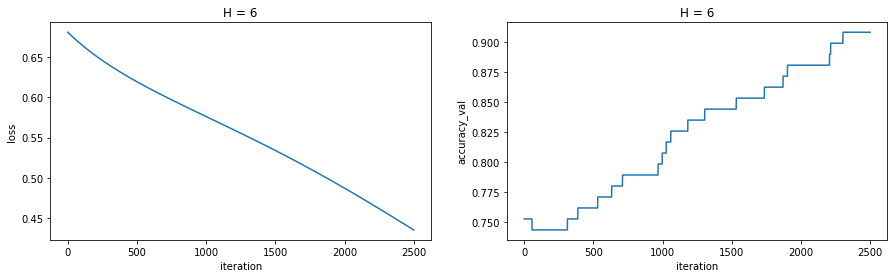

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.609296560287476(s)
The best model: iteration = 2494
On validation dataset: accuracy = 0.6788990825688074
On testing dataset: accuracy = 0.6470588235294118, auc = 0.9741950757575758, precision = 0.3235294117647059, recall = 0.5, f1 = 0.3928571428571429


C:\Users\yelbee\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


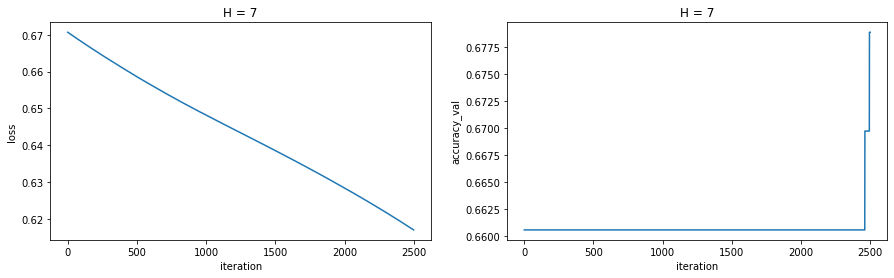

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 11.496248722076416(s)
The best model: iteration = 557
On validation dataset: accuracy = 0.981651376146789
On testing dataset: accuracy = 0.9264705882352942, auc = 0.9969223484848485, precision = 0.9489795918367347, recall = 0.8958333333333333, f1 = 0.9149787446861715


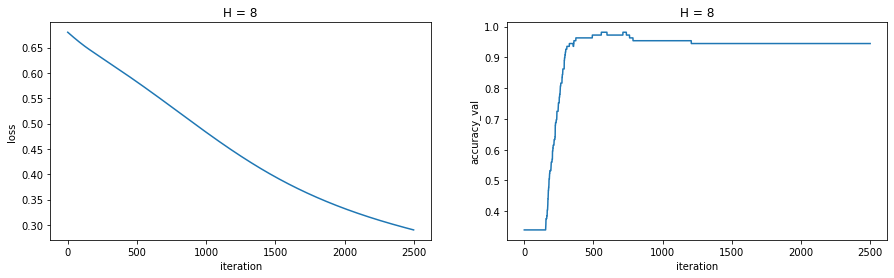

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.147854804992676(s)
The best model: iteration = 2492
On validation dataset: accuracy = 0.7981651376146789
On testing dataset: accuracy = 0.7205882352941176, auc = 0.995501893939394, precision = 0.8492063492063492, recall = 0.6041666666666666, f1 = 0.5836287463744763


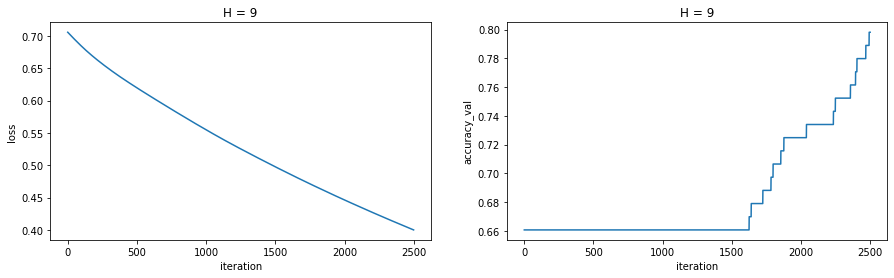

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.46967077255249(s)
The best model: iteration = 2496
On validation dataset: accuracy = 0.7155963302752294
On testing dataset: accuracy = 0.6764705882352942, auc = 0.9964488636363636, precision = 0.8333333333333333, recall = 0.5416666666666666, f1 = 0.47692307692307695


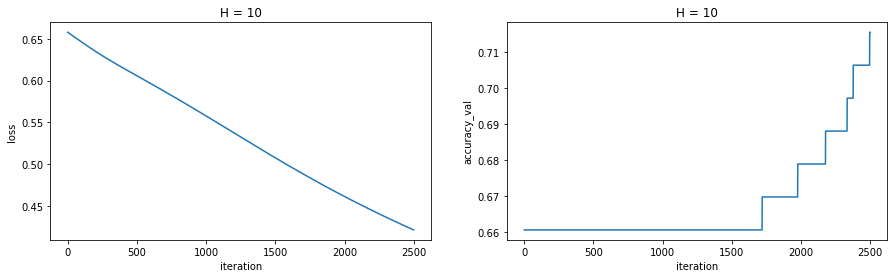

K-Folder index = 4
iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.269205093383789(s)
The best model: iteration = 2418
On validation dataset: accuracy = 0.7927927927927928
On testing dataset: accuracy = 0.6911764705882353, auc = 0.8934659090909091, precision = 0.8384615384615385, recall = 0.5625, f1 = 0.5147808358817534


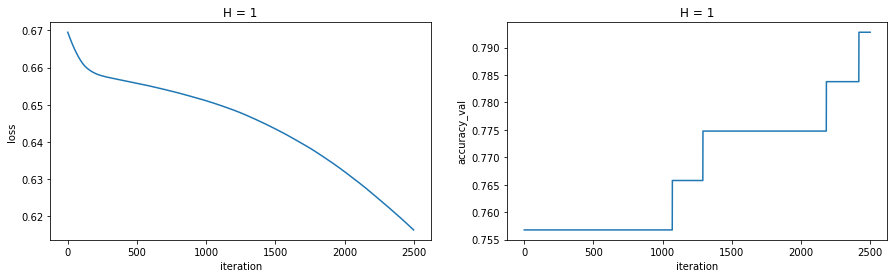

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.908171653747559(s)
The best model: iteration = 445
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.8308823529411765, auc = 0.9947916666666666, precision = 0.8963963963963963, recall = 0.7604166666666667, f1 = 0.7846768087010394


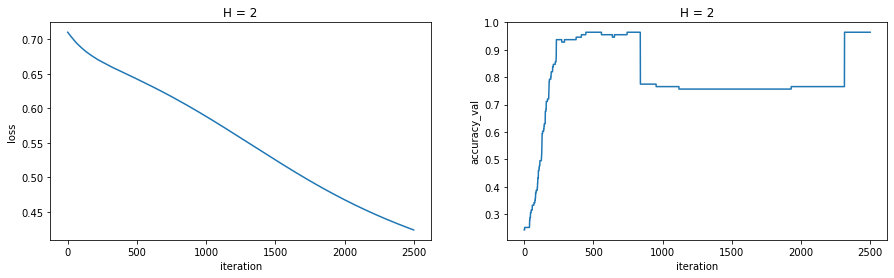

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.97200059890747(s)
The best model: iteration = 1107
On validation dataset: accuracy = 0.954954954954955
On testing dataset: accuracy = 0.8455882352941176, auc = 0.9973958333333334, precision = 0.9036697247706422, recall = 0.78125, f1 = 0.8067005076142132


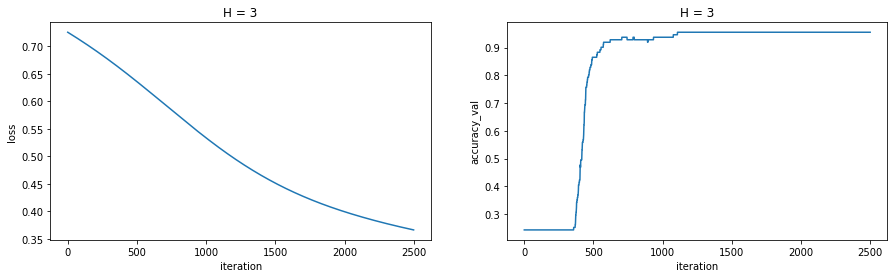

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.894858121871948(s)
The best model: iteration = 2164
On validation dataset: accuracy = 0.9369369369369369
On testing dataset: accuracy = 0.9411764705882353, auc = 0.9053030303030303, precision = 0.9396135265700483, recall = 0.9308712121212122, f1 = 0.9349748983982787


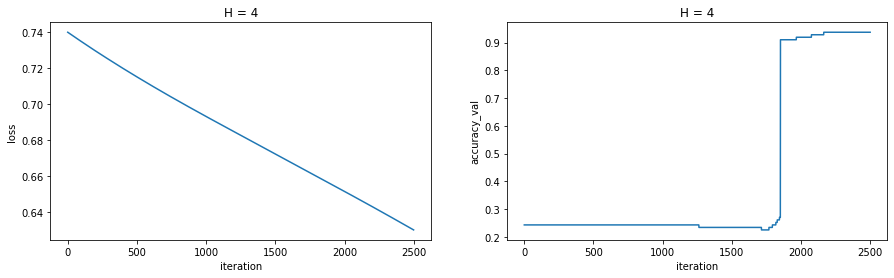

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 10.832024335861206(s)
The best model: iteration = 2109
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.9338235294117647, auc = 0.9985795454545454, precision = 0.9536082474226804, recall = 0.90625, f1 = 0.9239515377446412


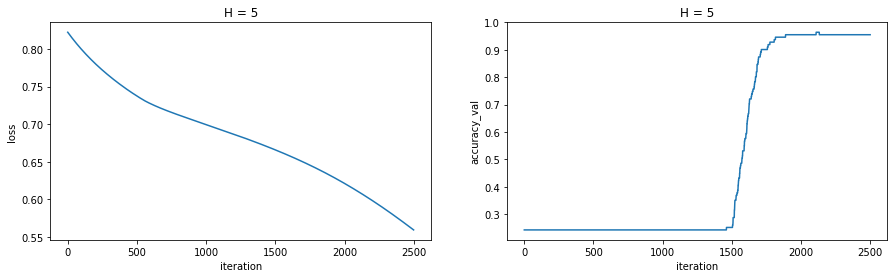

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.972326040267944(s)
The best model: iteration = 2469
On validation dataset: accuracy = 0.9459459459459459
On testing dataset: accuracy = 0.8161764705882353, auc = 0.9973958333333334, precision = 0.8893805309734513, recall = 0.7395833333333334, f1 = 0.7617546072454628


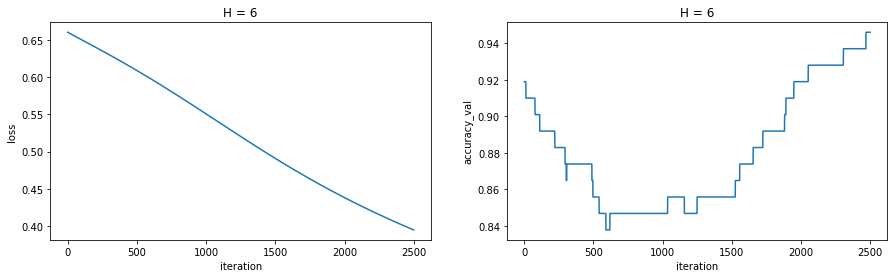

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.551451444625854(s)
The best model: iteration = 2353
On validation dataset: accuracy = 0.8828828828828829
On testing dataset: accuracy = 0.8455882352941176, auc = 0.8544034090909091, precision = 0.8893006767644216, recall = 0.7859848484848485, f1 = 0.8097902097902099


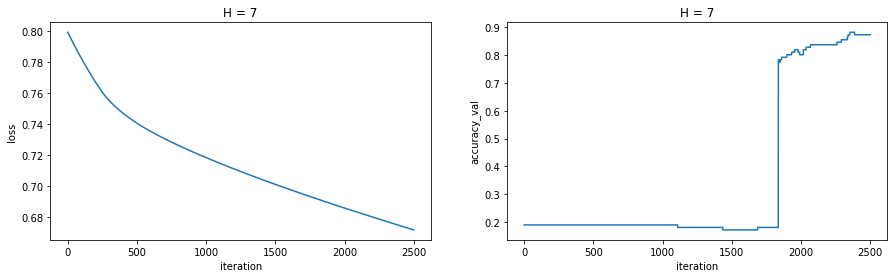

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.037824392318726(s)
The best model: iteration = 2476
On validation dataset: accuracy = 0.9099099099099099
On testing dataset: accuracy = 0.75, auc = 0.991003787878788, precision = 0.860655737704918, recall = 0.6458333333333334, f1 = 0.6448540706605222


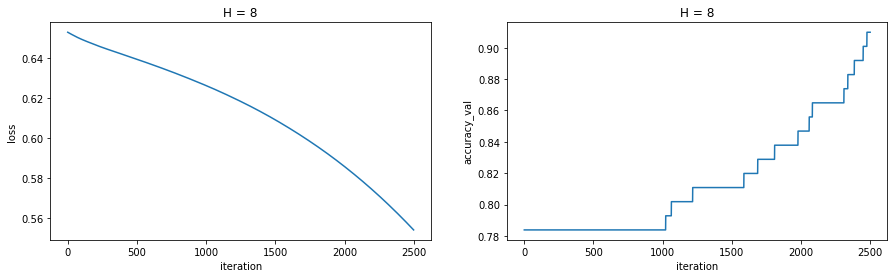

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 8.92612361907959(s)
The best model: iteration = 2436
On validation dataset: accuracy = 0.9099099099099099
On testing dataset: accuracy = 0.8455882352941176, auc = 0.9973958333333334, precision = 0.9036697247706422, recall = 0.78125, f1 = 0.8067005076142132


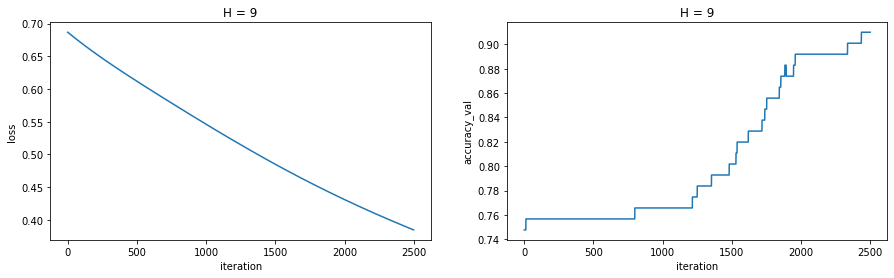

iteration: 0/2500
iteration: 1000/2500
iteration: 2000/2500
training time = 9.057758808135986(s)
The best model: iteration = 2006
On validation dataset: accuracy = 0.963963963963964
On testing dataset: accuracy = 0.8455882352941176, auc = 0.9973958333333334, precision = 0.9036697247706422, recall = 0.78125, f1 = 0.8067005076142132


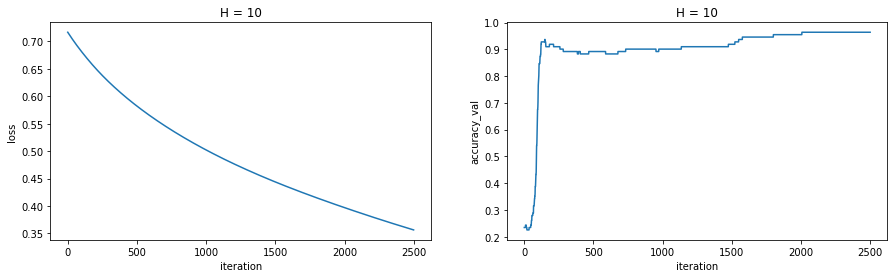

array([[ 1.   ,  0.715,  0.709,  0.827,  0.643,  0.674,  0.6  ,  9.564],
       [ 2.   ,  0.822,  0.781,  0.979,  0.678,  0.691,  0.66 ,  9.17 ],
       [ 3.   ,  0.758,  0.744,  0.869,  0.662,  0.638,  0.601,  9.814],
       [ 4.   ,  0.864,  0.841,  0.979,  0.901,  0.778,  0.791, 10.202],
       [ 5.   ,  0.734,  0.751,  0.929,  0.668,  0.648,  0.604,  9.864],
       [ 6.   ,  0.861,  0.834,  0.997,  0.902,  0.765,  0.773,  9.523],
       [ 7.   ,  0.824,  0.807,  0.964,  0.787,  0.728,  0.723,  9.795],
       [ 8.   ,  0.87 ,  0.815,  0.996,  0.892,  0.737,  0.748,  9.733],
       [ 9.   ,  0.83 ,  0.803,  0.997,  0.886,  0.721,  0.73 ,  9.45 ],
       [10.   ,  0.813,  0.799,  0.997,  0.885,  0.715,  0.716, 10.286]])

In [23]:
# wine_data 13 features => H* = 6, lr = 1e-3 
framework_run(wine_data, device, k=5, H_list=list(range(1,11)), lr=1e-3, iteration=2500)

|H_wineNN|Val_Accuracy|Test_Accuracy|AUC|Precision|Recall| F1 |Training Time|
|---------|---|------------|-------------|---------|------|----|-------------|
| 1   |  0.715|  0.709|  0.827|  0.643|  0.674|  0.6  |  9.564(s)|
| 2   |  0.822|  0.781|  0.979|  0.678|  0.691|  0.66 |  9.17(s) |
| 3   |  0.758|  0.744|  0.869|  0.662|  0.638|  0.601|  9.814(s)|
| 4   |  0.864|  0.841|  0.979|  0.901|  0.778|  0.791| 10.202(s)|
| 5   |  0.734|  0.751|  0.929|  0.668|  0.648|  0.604|  9.864(s)|
| 6   |  0.861|  0.834|  0.997|  0.902|  0.765|  0.773|  9.523(s)|
| 7   |  0.824|  0.807|  0.964|  0.787|  0.728|  0.723|  9.795(s)|
| 8   |  0.87 |  0.815|  0.996|  0.892|  0.737|  0.748|  9.733(s)|
| 9   |  0.83 |  0.803|  0.997|  0.886|  0.721|  0.73 |  9.45(s) |
|10   |  0.813|  0.799|  0.997|  0.885|  0.715|  0.716| 10.286(s)|

## 5 Train Pytorch NN for Multi-class Data Sets

In [24]:
def train_multi_nn_model(dataset, L1_list, L2_list, device, learning_rate=1e-2, iteration=5000):
    
    x_train, y_train, x_val, y_val, x_test, y_test = unzip_dataset(dataset)
    
    # Cross Entropy Loss: combines nn.LogSoftmax() and nn.NLLLoss()
    loss_fn = torch.nn.CrossEntropyLoss() 
    
    # The result table
    # Each row preserves the related result of corresponding combination of L1 and L2
    # 5 means we have 5 items to save => [L1, L2, best_accuracy_val, accuracy_test, training_time]
    res_table = np.zeros((len(L1_list)*len(L2_list),5))
    res_table_ind = 0
    
    for L1 in L1_list:
        for L2 in L2_list:
            t0 = time.time()
            model = torch.nn.Sequential(
                torch.nn.Linear(784, L1), # input dimension = 784, hidden layer1 = L1
                torch.nn.ReLU(),
                torch.nn.Linear(L1, L2), # hidden layer2 = L2
                torch.nn.ReLU(),
                torch.nn.Linear(L2, 10), # output probability on 10 classes
            ).to(device)
        
            loss_history = []
            accuracy_val = []
            correct = 0.0
            best_accuracy_val = 0.0
            best_model = None
            
            # SGD optimizer
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            
            for t in range(iteration):
                y_train_pred = model(x_train).squeeze(dim=-1) # squeeze 2D of shape(x,1) to 1D of shape(x,)
                loss = loss_fn(y_train_pred, y_train)
                loss_history.append(loss.item())
     
                # Choose the max possibility index as the prediction class
                y_val_pred = model(x_val)
                y_val_pred_label = torch.argmax(y_val_pred, dim=1)
                
                # Calculate accuracy on the validation set
                correct = (y_val_pred_label == y_val).sum().item()
                accuracy = correct / y_val.shape[0]
                accuracy_val.append(accuracy)
            
                # Save the best model and best accuracy
                if accuracy > best_accuracy_val:
                    best_accuracy_val = accuracy
                    best_model = model
            
                if t % 200 == 0:   
                    print("iteration: %s/%s" % (t, iteration))

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        
            # Compute training time
            t1 = time.time()
            print("training time = %s(s)" % (t1 - t0))
        
            # Use the best model to predict on testing dataset
            y_test_pred = best_model(x_test)
            y_test_pred_label = torch.argmax(y_test_pred, dim=1)
                
            # Calculate accuracy on the testing dataset
            correct = (y_test_pred_label == y_test).sum().item()
            accuracy_test = correct / y_val.shape[0]
            
            # Save in result table
            res_table[res_table_ind] += np.array([L1, L2, best_accuracy_val, accuracy_test, t1-t0])
            res_table_ind += 1
            
            print("best_accuracy_val = %s, accuracy_test = %s" % (best_accuracy_val, accuracy_test))

            
            # Plot the loss curve and varlidation accuracy curve
            fig = plt.figure(figsize=(15,4))
            ax1 = plt.subplot(1,2,1)
            ax2 = plt.subplot(1,2,2)
            plt.sca(ax1)
            plt.title("L1 = %s, L2 = %s" % (L1, L2))
            plt.xlabel("iteration")
            plt.ylabel("loss")
            plt.plot(range(iteration), loss_history)
            plt.sca(ax2)
            plt.title("L1 = %s, L2 = %s" % (L1, L2))
            plt.xlabel("iteration")
            plt.ylabel("accuracy_val")
            plt.plot(range(iteration), accuracy_val)
            fig.tight_layout(pad=0.4, w_pad=3.0, h_pad=3.0)            
            plt.show()
            
    # Return the result tables
    return res_table

K-Folder index = 0
iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.454360961914062(s)
best_accuracy_val = 0.51, accuracy_test = 0.243


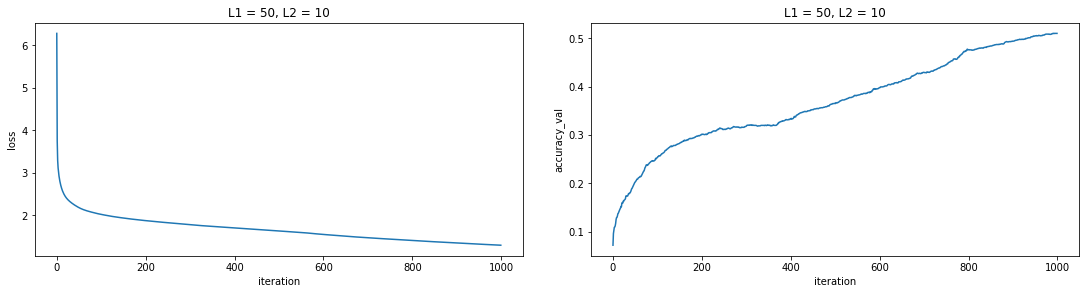

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.533149242401123(s)
best_accuracy_val = 0.625, accuracy_test = 0.311


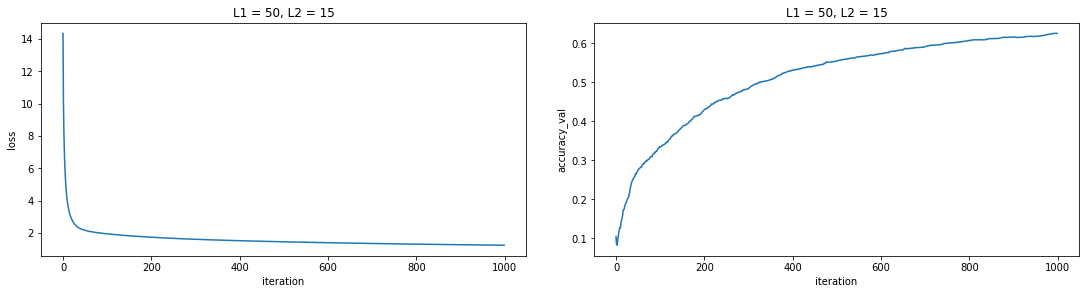

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.575037479400635(s)
best_accuracy_val = 0.7075, accuracy_test = 0.348


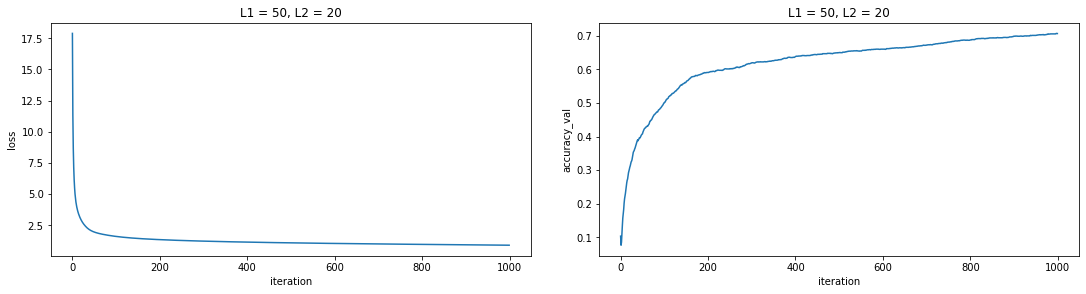

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.164421081542969(s)
best_accuracy_val = 0.3445, accuracy_test = 0.1905


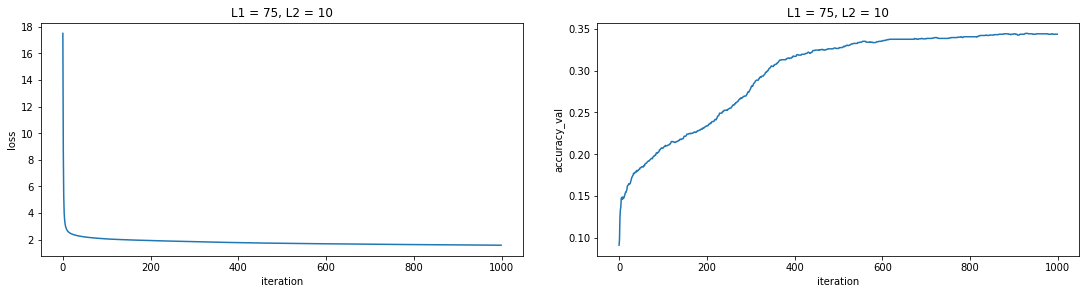

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.250231504440308(s)
best_accuracy_val = 0.4655, accuracy_test = 0.2175


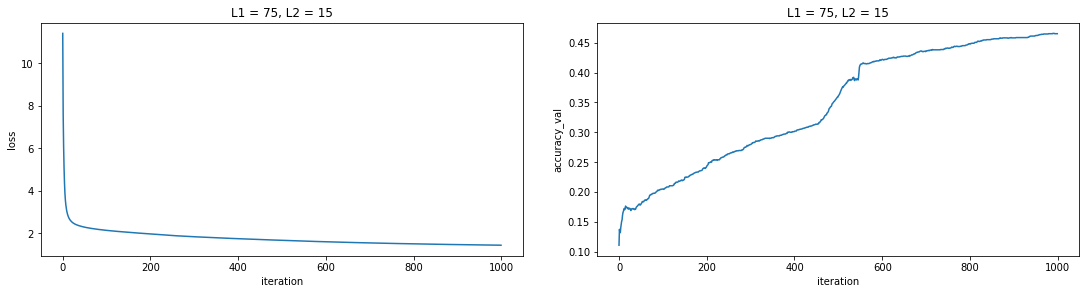

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.479618310928345(s)
best_accuracy_val = 0.69, accuracy_test = 0.343


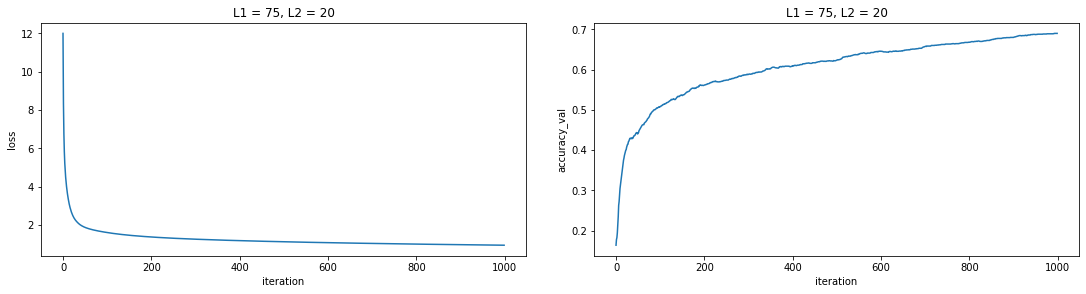

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.53080677986145(s)
best_accuracy_val = 0.4815, accuracy_test = 0.2245


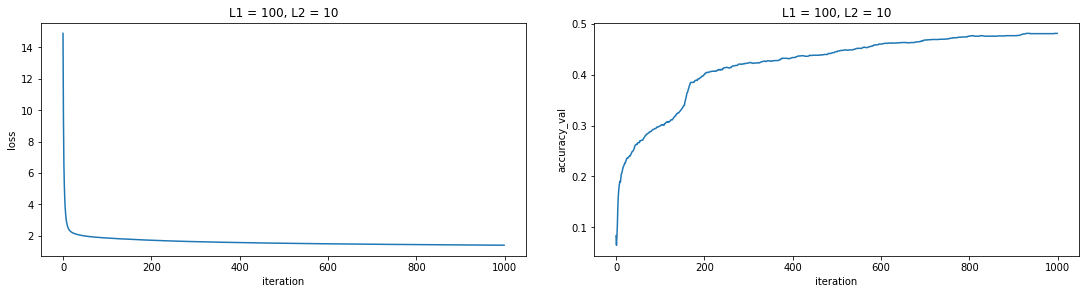

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.631537675857544(s)
best_accuracy_val = 0.5825, accuracy_test = 0.2715


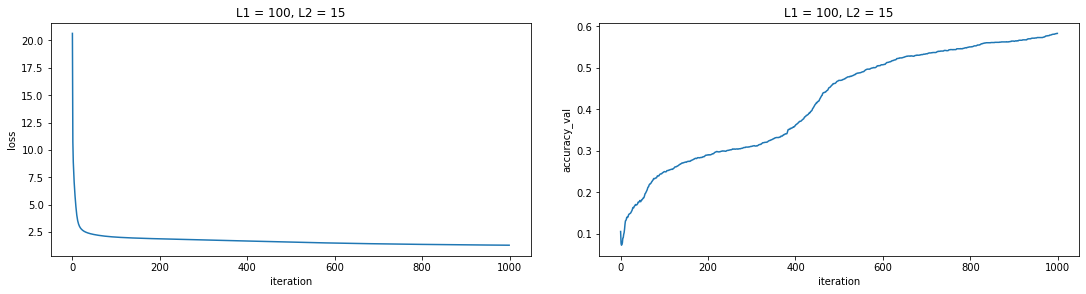

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.721296310424805(s)
best_accuracy_val = 0.638, accuracy_test = 0.309


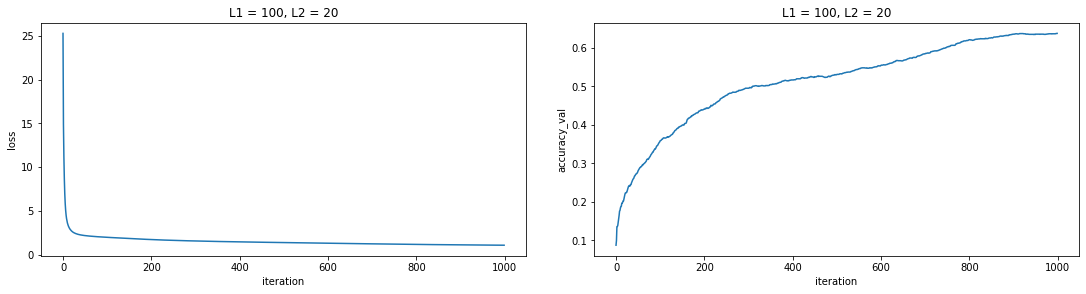

K-Folder index = 1
iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.367557764053345(s)
best_accuracy_val = 0.4765, accuracy_test = 0.238


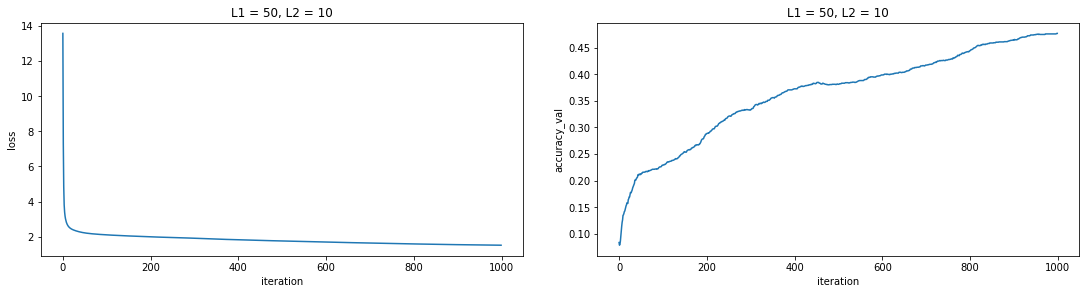

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.54312252998352(s)
best_accuracy_val = 0.6675, accuracy_test = 0.333


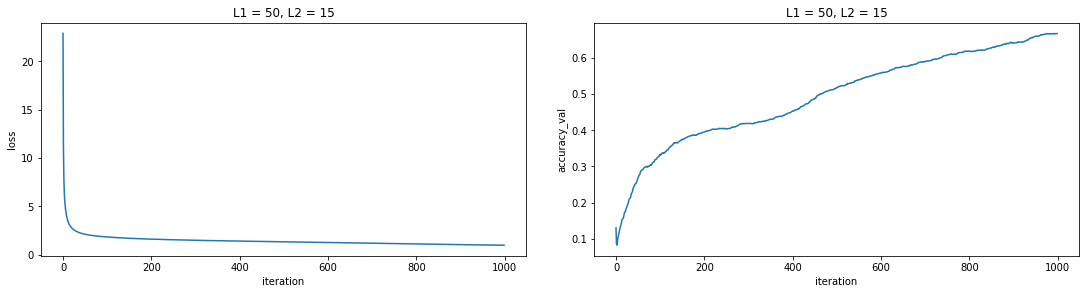

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.869251251220703(s)
best_accuracy_val = 0.674, accuracy_test = 0.343


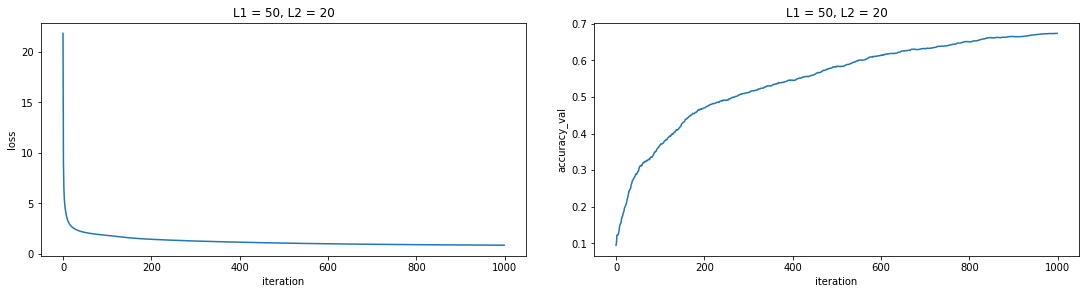

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.193383693695068(s)
best_accuracy_val = 0.356, accuracy_test = 0.1695


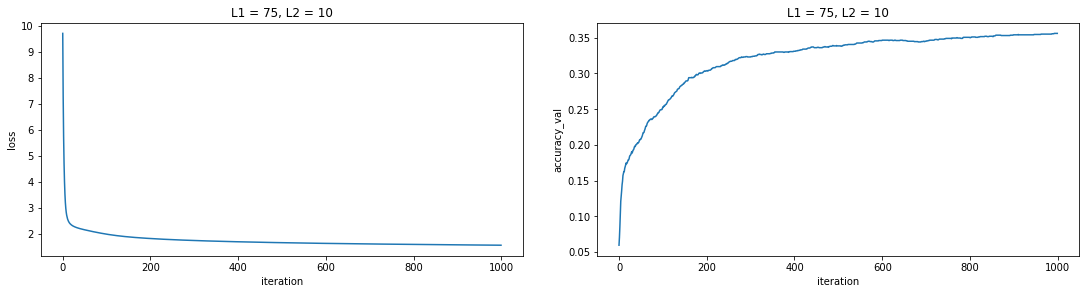

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.346972942352295(s)
best_accuracy_val = 0.65, accuracy_test = 0.33


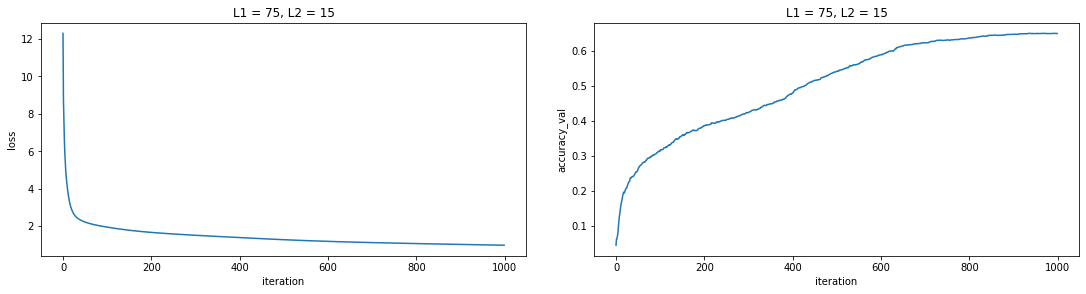

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.478623151779175(s)
best_accuracy_val = 0.697, accuracy_test = 0.358


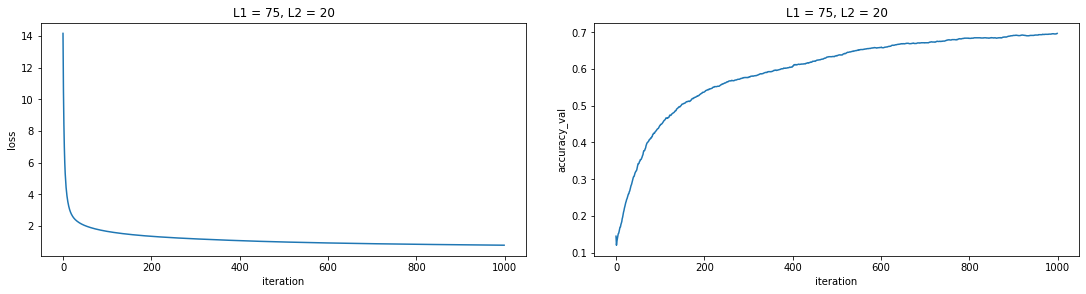

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.449026107788086(s)
best_accuracy_val = 0.6605, accuracy_test = 0.325


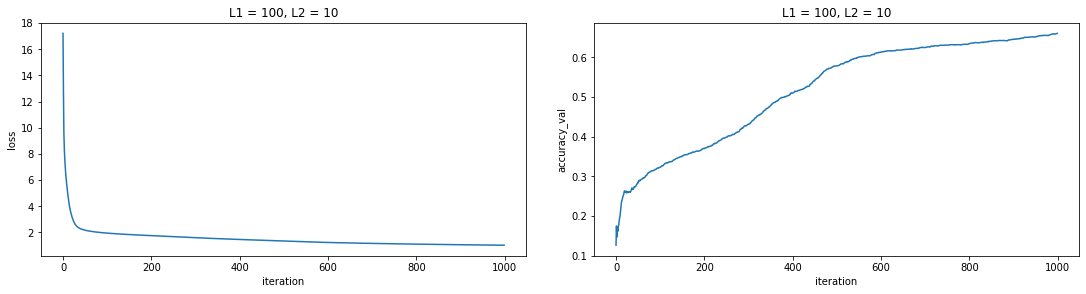

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.62056589126587(s)
best_accuracy_val = 0.54, accuracy_test = 0.2655


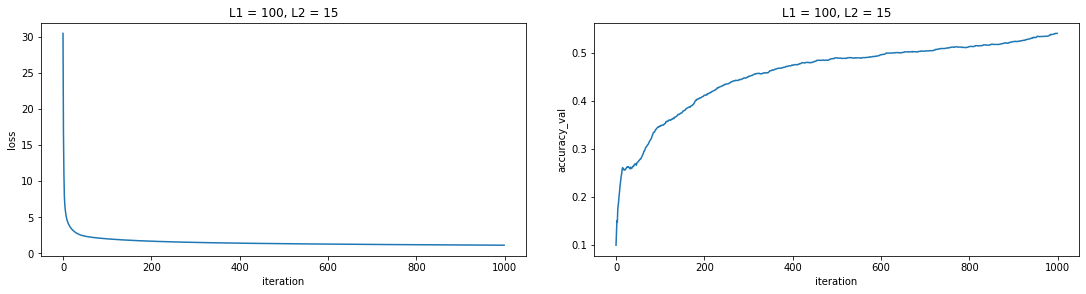

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.795099020004272(s)
best_accuracy_val = 0.487, accuracy_test = 0.229


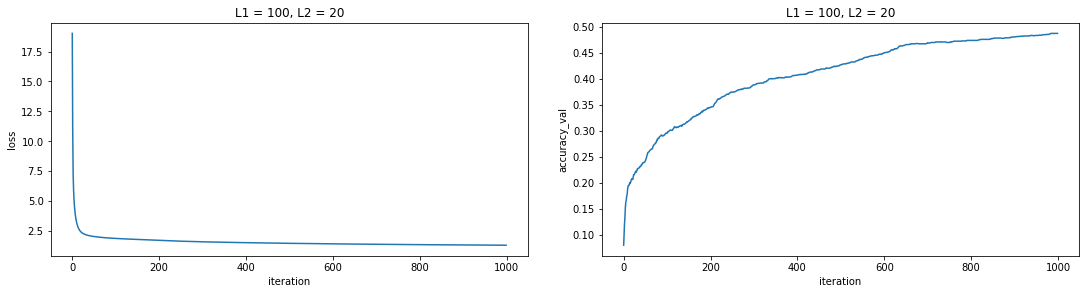

K-Folder index = 2
iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.4044930934906(s)
best_accuracy_val = 0.4965, accuracy_test = 0.2385


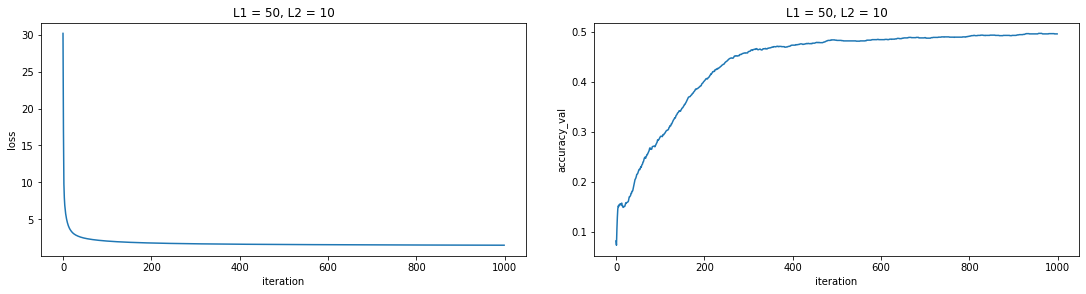

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.191386699676514(s)
best_accuracy_val = 0.605, accuracy_test = 0.3045


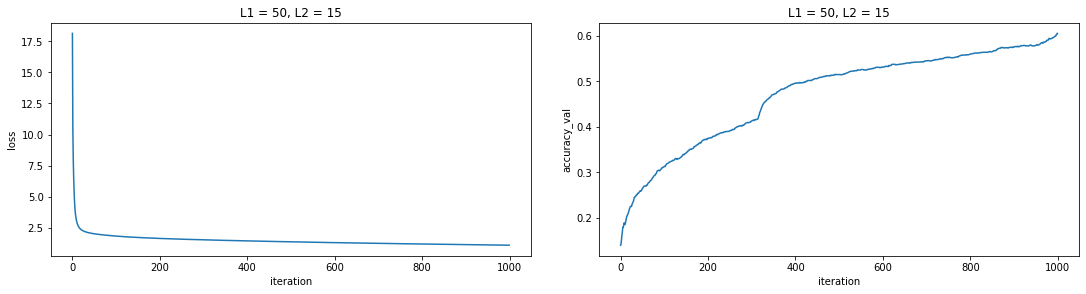

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.06929063796997(s)
best_accuracy_val = 0.715, accuracy_test = 0.354


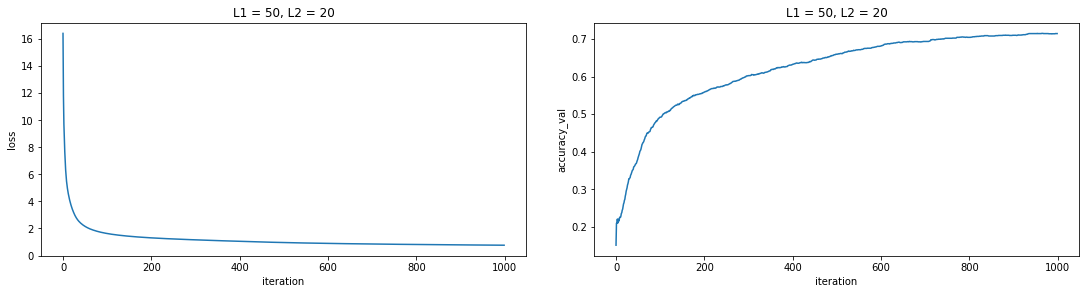

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.741307258605957(s)
best_accuracy_val = 0.3845, accuracy_test = 0.186


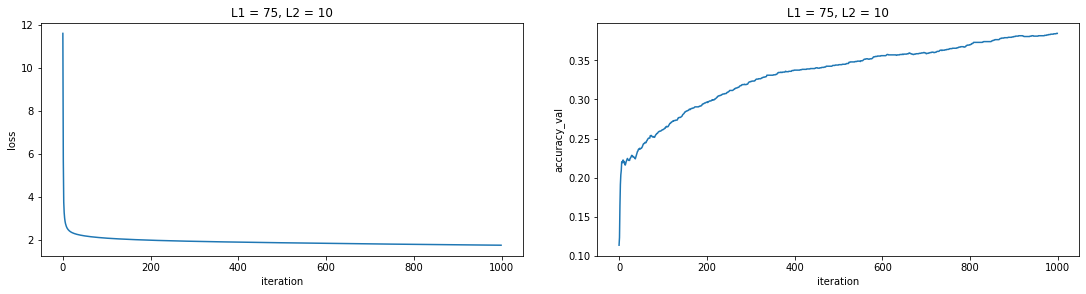

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.601345539093018(s)
best_accuracy_val = 0.644, accuracy_test = 0.3155


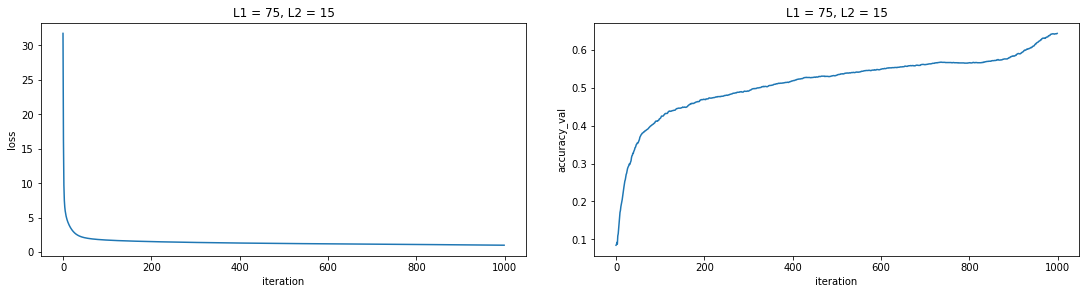

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.98118281364441(s)
best_accuracy_val = 0.6765, accuracy_test = 0.329


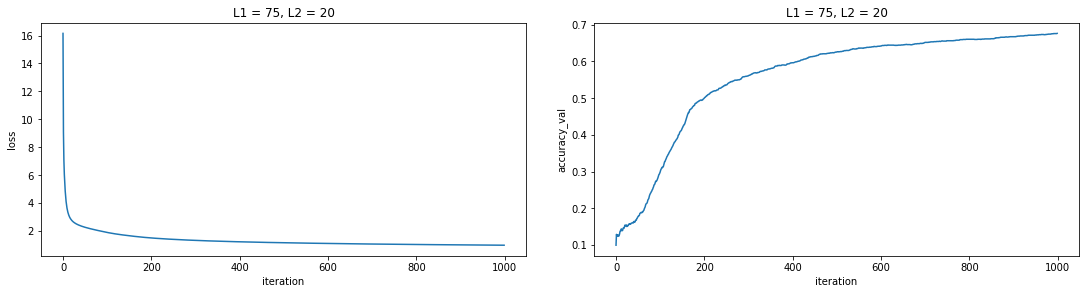

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.912393808364868(s)
best_accuracy_val = 0.42, accuracy_test = 0.2025


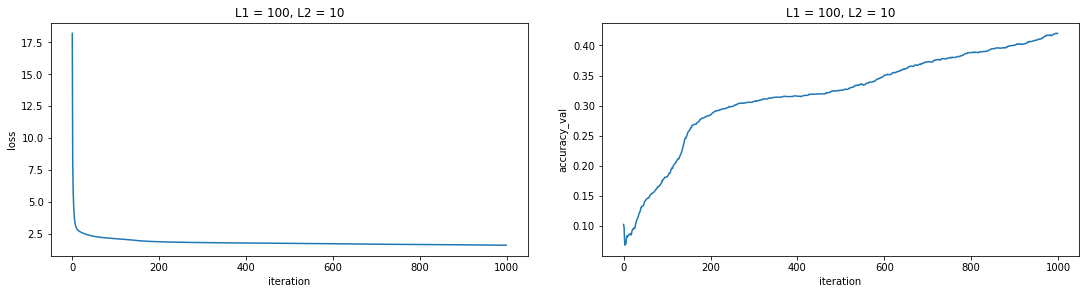

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 14.663374423980713(s)
best_accuracy_val = 0.591, accuracy_test = 0.278


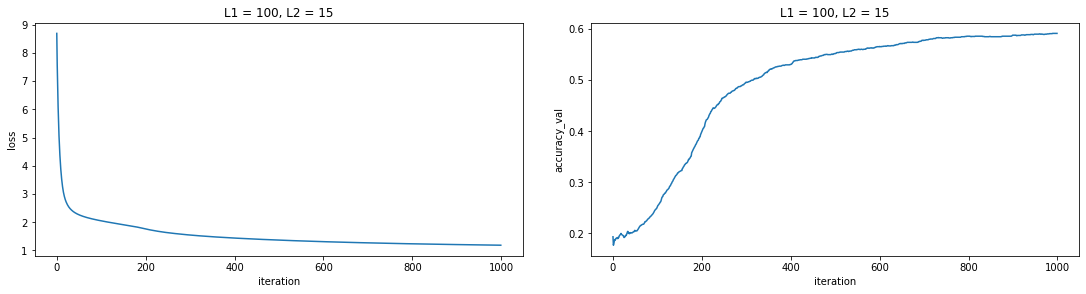

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 14.223266124725342(s)
best_accuracy_val = 0.688, accuracy_test = 0.34


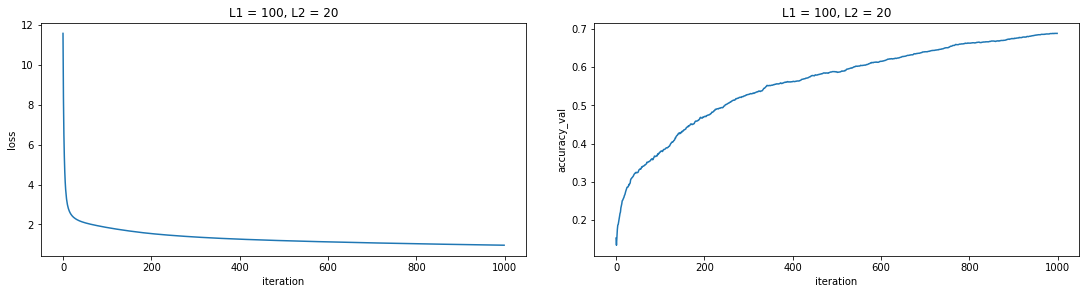

K-Folder index = 3
iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.803448677062988(s)
best_accuracy_val = 0.496, accuracy_test = 0.247


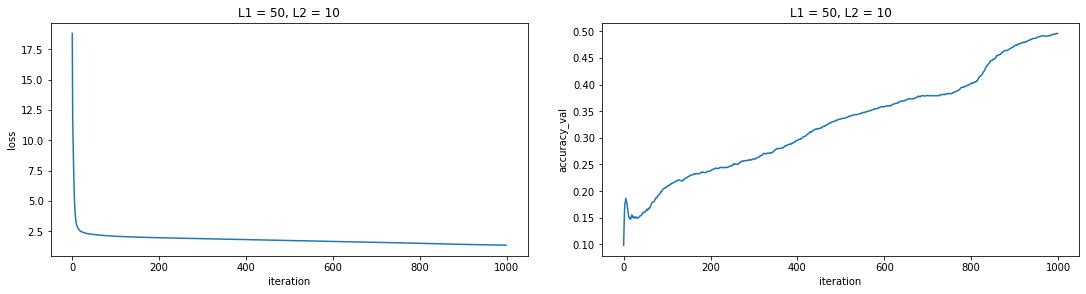

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 11.79101300239563(s)
best_accuracy_val = 0.4235, accuracy_test = 0.192


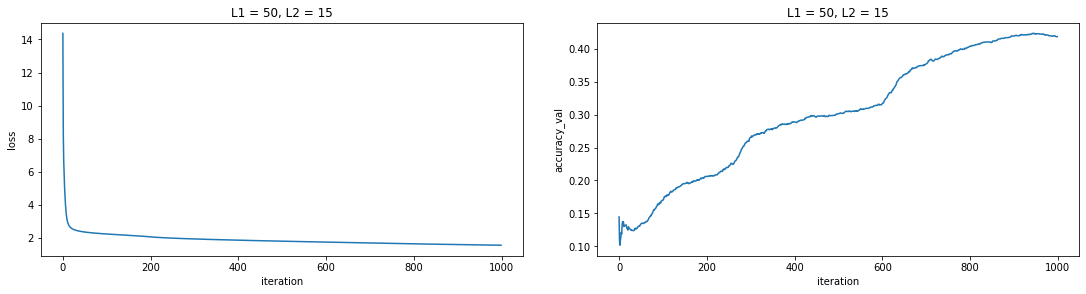

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.088001489639282(s)
best_accuracy_val = 0.7315, accuracy_test = 0.368


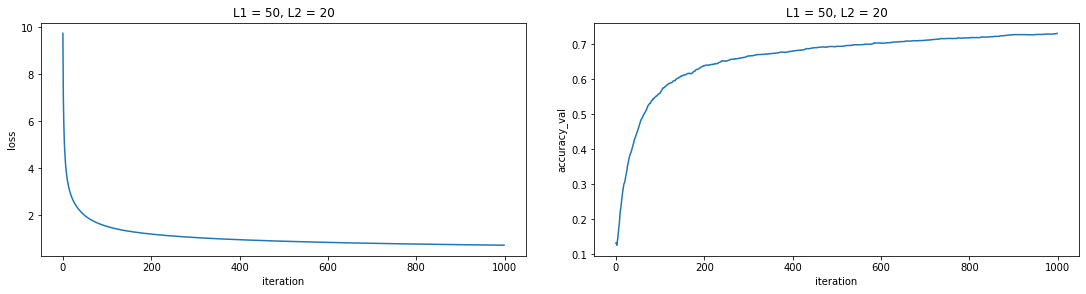

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.449147939682007(s)
best_accuracy_val = 0.459, accuracy_test = 0.2325


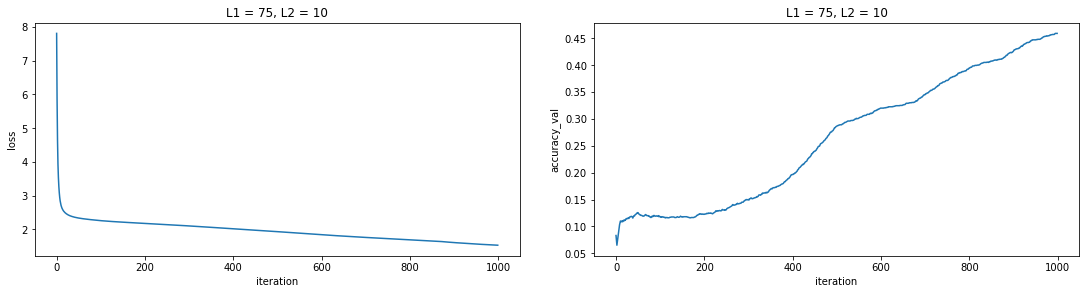

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.653974533081055(s)
best_accuracy_val = 0.69, accuracy_test = 0.3385


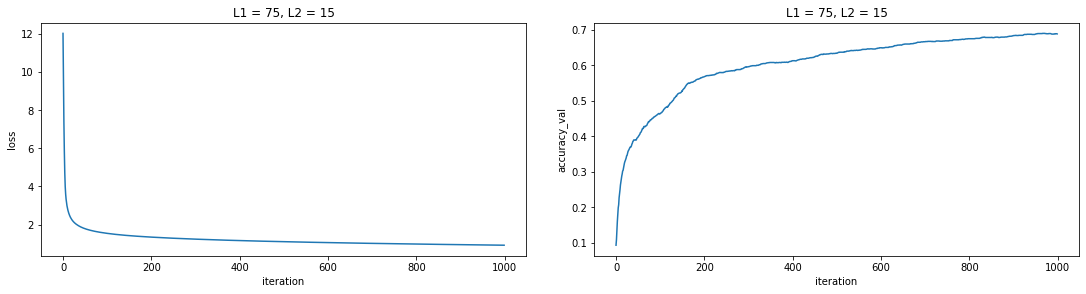

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.761151552200317(s)
best_accuracy_val = 0.7115, accuracy_test = 0.349


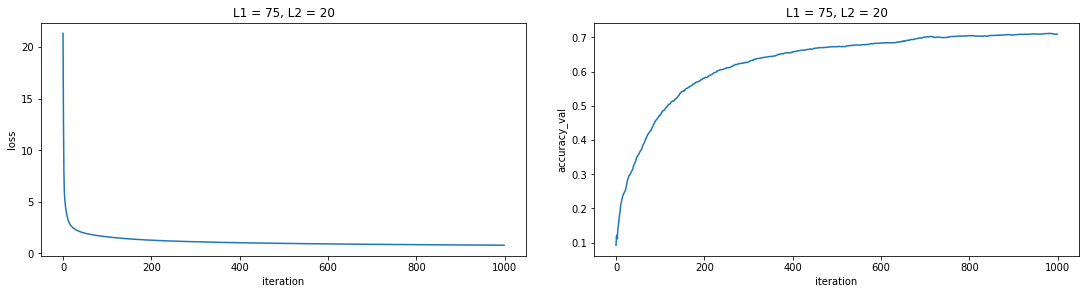

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 14.328336000442505(s)
best_accuracy_val = 0.596, accuracy_test = 0.2855


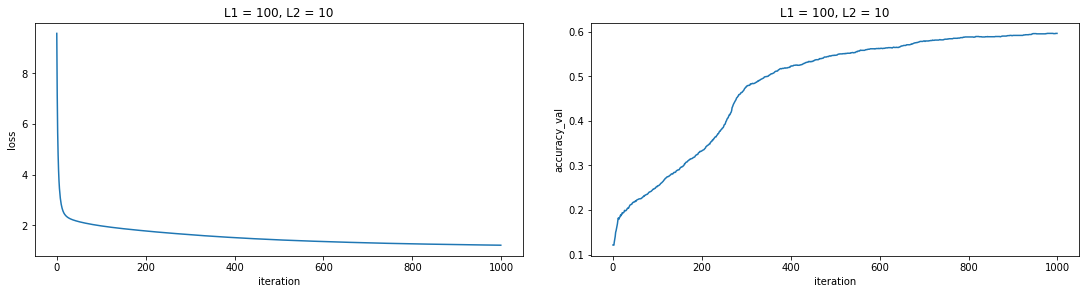

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.95905065536499(s)
best_accuracy_val = 0.5505, accuracy_test = 0.2715


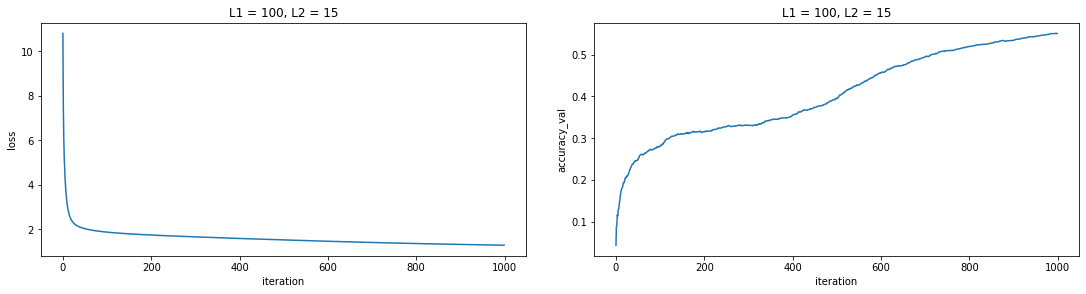

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.999138593673706(s)
best_accuracy_val = 0.732, accuracy_test = 0.3665


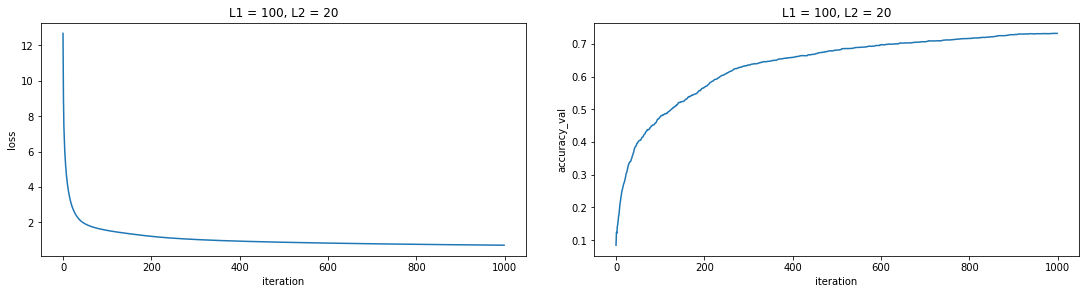

K-Folder index = 4
iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.600915908813477(s)
best_accuracy_val = 0.2925, accuracy_test = 0.1385


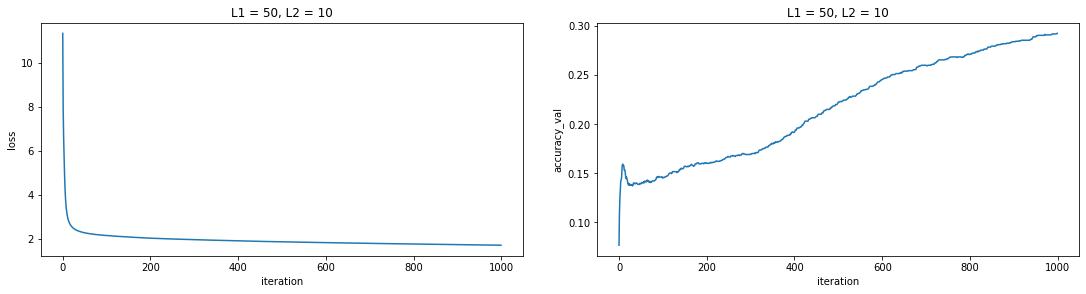

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.822222709655762(s)
best_accuracy_val = 0.6865, accuracy_test = 0.3515


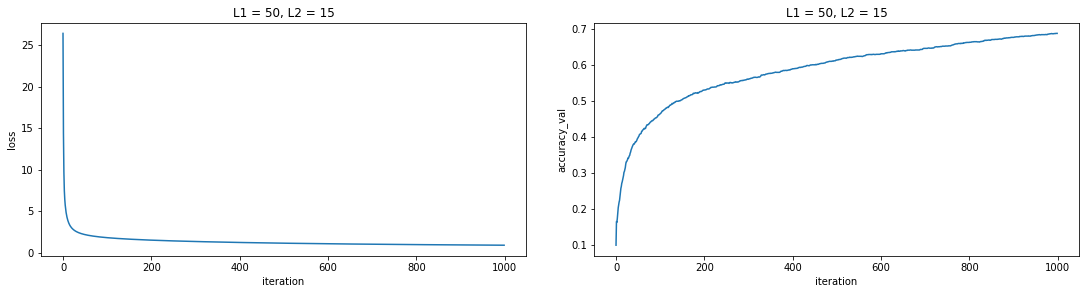

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.021742105484009(s)
best_accuracy_val = 0.69, accuracy_test = 0.345


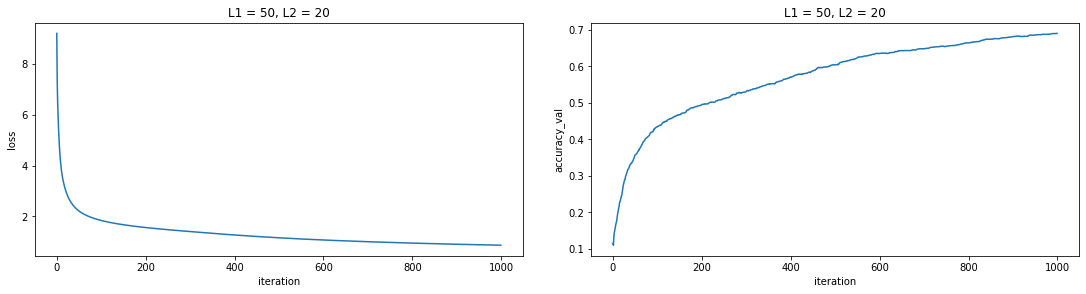

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.77930474281311(s)
best_accuracy_val = 0.52, accuracy_test = 0.259


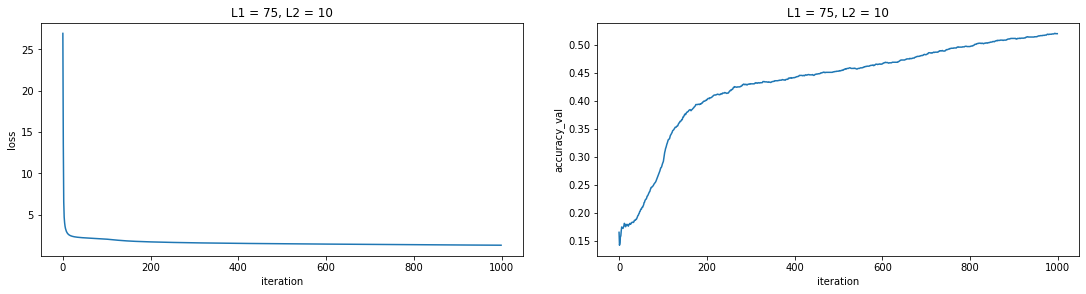

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 12.613807439804077(s)
best_accuracy_val = 0.625, accuracy_test = 0.3165


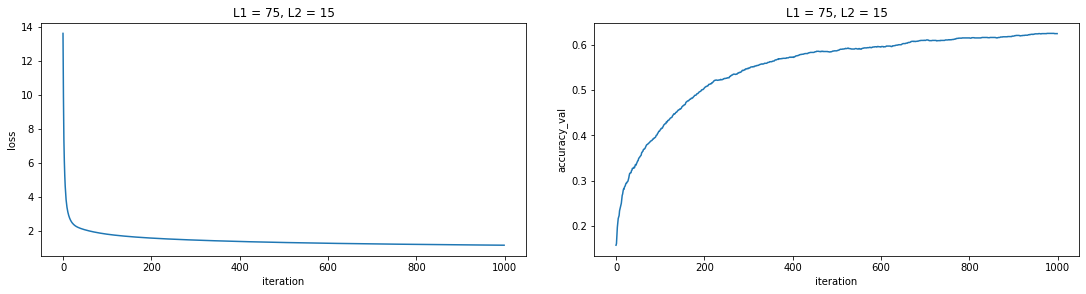

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.635957956314087(s)
best_accuracy_val = 0.678, accuracy_test = 0.3485


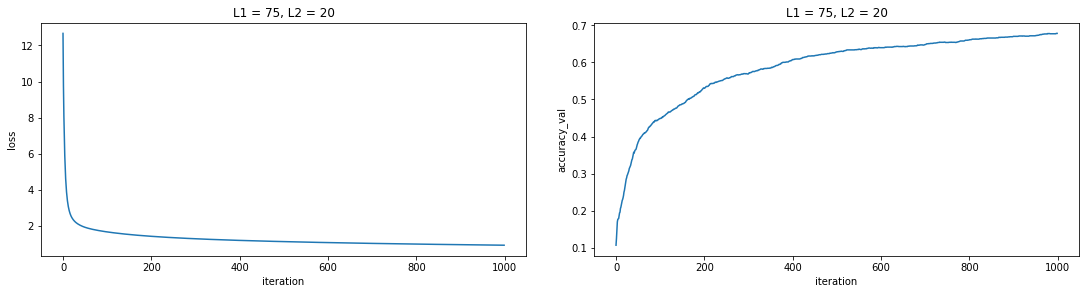

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.92529559135437(s)
best_accuracy_val = 0.486, accuracy_test = 0.242


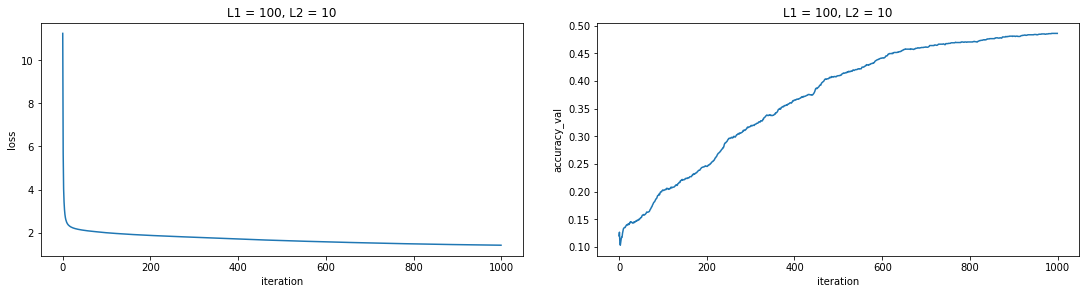

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.903945207595825(s)
best_accuracy_val = 0.6615, accuracy_test = 0.3235


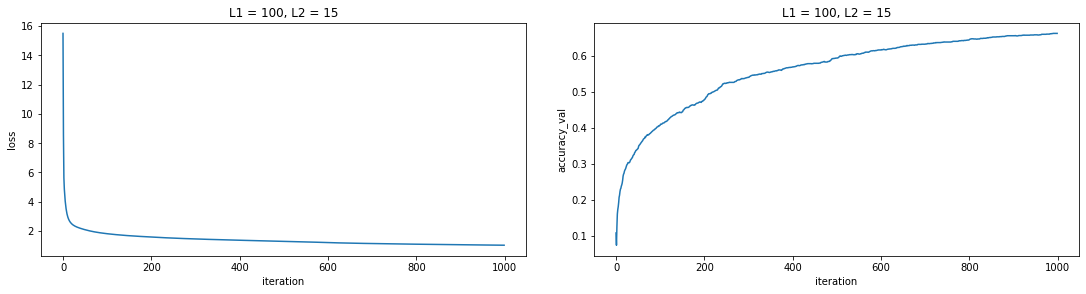

iteration: 0/1000
iteration: 200/1000
iteration: 400/1000
iteration: 600/1000
iteration: 800/1000
training time = 13.99259066581726(s)
best_accuracy_val = 0.709, accuracy_test = 0.3555


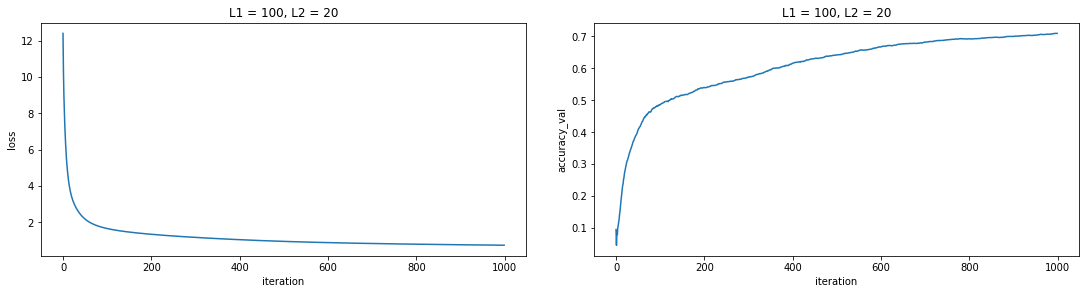

array([[ 50.   ,  10.   ,   0.454,   0.221,  11.726],
       [ 50.   ,  15.   ,   0.601,   0.298,  11.976],
       [ 50.   ,  20.   ,   0.704,   0.352,  12.125],
       [ 75.   ,  10.   ,   0.413,   0.208,  12.466],
       [ 75.   ,  15.   ,   0.615,   0.304,  12.493],
       [ 75.   ,  20.   ,   0.691,   0.346,  12.867],
       [100.   ,  10.   ,   0.529,   0.256,  13.829],
       [100.   ,  15.   ,   0.585,   0.282,  13.956],
       [100.   ,  20.   ,   0.651,   0.32 ,  13.946]])

In [25]:
# Generate 5-folders
k_folders = generate_k_folders(read_multi_data(), 5)

# The trying parameters of L1 and L2
L1_list = [50, 75, 100]
L2_list = [10, 15, 20]

# The result table
# Each row preserves the related result of corresponding combination of L1 and L2
# 5 means we have 5 items to save => [L1, L2, best_accuracy_val, accuracy_test, training_time]
res_table = np.zeros((len(L1_list)*len(L2_list),5))

for index in range(5):
    print("K-Folder index = %s" % index)
    # Sum up the result table
    res_table += train_multi_nn_model(k_folders[index], L1_list, L2_list, device, learning_rate=1e-4, iteration=1000)

# Compute the average table
np.round(res_table / 5, decimals=3)

|L1|L2|Val Accuracy|Test Accuracy|Training Time|
|--|--|------------|-------------|-------------|
| 50   |  10   |   0.454|   0.221|  11.726(s)|
| 50   |  15   |   0.601|   0.298|  11.976(s)|
| 50   |  20   |   0.704|   0.352|  12.125(s)|
| 75   |  10   |   0.413|   0.208|  12.466(s)|
| 75   |  15   |   0.615|   0.304|  12.493(s)|
| 75   |  20   |   0.691|   0.346|  12.867(s)|
|100   |  10   |   0.529|   0.256|  13.829(s)|
|100   |  15   |   0.585|   0.282|  13.956(s)|
|100   |  20   |   0.651|   0.32 |  13.946(s)|